<div style="background-color: #64CCC5; padding: 10px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">HR Analytics Project- Understanding the Attrition in HR</b>
</div>

**Project Description**

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

**HR Analytics**

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

**Attrition in HR**

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

**Attrition affecting Companies**

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


**Dataset Link-**

•	https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics

* https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics/blob/master/ibm-hr-analytics-employee-attrition-performance.zip

<img src="https://hexaware.com/wp-content/uploads/2015/08/hr-analytics-picture.jpg" alt="Lamp" width="532" height="732">

<div style="background-color: #F6FDC3; padding: 10px; text-align: center; font-size: 28px;">
    <b style="text-align: center;">Importing Important Libraries</b>
</div>

In [320]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno


# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder

# Models
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


#Evaluation & Metrics
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#For Saving model
import joblib

# To prevent warnings
import warnings
warnings.filterwarnings("ignore")

<div style="background-color: #F6FDC3; padding: 10px; text-align: center; font-size: 28px;">
    <b style="text-align: center;">Loading Dataset</b>
</div>

In [321]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

<div style="background-color: #F6FDC3; padding: 10px; text-align: center; font-size: 28px;">
    <b style="text-align: center;">Comprehensive Overview for Dataset</b>
</div>

1. Age: Age of the employee.
2. Attrition: Refers to the gradual loss of employees over time.(Yes or No)
3. BusinessTravel: (Travel_Rarely or Travel_Frequently)
4. DailyRate: Daily rate of employee.
5. Department: Working in department (Sales, )
6. DistanceFromHome: Distance from home to office.
7. Education: Education level of employee.
8. EducationField: Field of education of employee.
9. EmployeeCount: Total count of employee.
10. EmployeeNumber: Id of employee.
11. EnvironmentSatisfaction: How much satisfied with the working environment (1 to 4)
12. Gender: Employee gender (Female or Male)
13. HourlyRate: Hourly rate of employee for work.
14. JobInvolvement: How much involved in job (1 to 4).
15. JobLevel: Level of job (1 to 5).
16. JobRole: ('Sales Executive', 'Research Scientist', 'Laboratory Technician','Manufacturing Director', 'Healthcare Representative', 'Manager','Sales Representative', 'Research Director', 'Human Resources').
17. JobSatisfaction: How much satisfied with the job (1 to 4).
18. MaritalStatus: ('Single', 'Married', 'Divorced').
19. MonthlyIncome: Monthly income of employee.
20. MonthlyRate: Monthly rate of employee.
21. NumCompaniesWorked: Worked in number of companies (0 to 9).
22. Over18: Over 18 years or not.(Y or N)
23. OverTime: (Yes or No)
24. PercentSalaryHike: Percentage of salary hike (11 to 25).
25. PerformanceRating: Employee work performance rating (3 to 4).
26. RelationshipSatisfaction: on scale of 1 to 4.
27. StandardHours: 
28. StockOptionLevel: on scale of 0 to 3.
29. TotalWorkingYears: Number of total working years.
30. TrainingTimesLastYear: 
31. WorkLifeBalance: on scale of 1 to 4.
32. YearsAtCompany: Number of years worked with company.
33. YearsInCurrentRole: Number of years in current role or position.
34. YearsSinceLastPromotion: Number of years since last promotion.
35. YearsWithCurrManager: Number of years working with current manager.

****Comprehension Understanding from Dataset****

* The dataset consists of 35 input or independent variables and 1 dependent or target variable.

* Based on the values of the target variable ("Attrition"), we can conclude that it is catagorical data.

Hence, based on the preceding introduction, our objective is to determine the attrition rates among employees. To achieve this, we will focus on the "Attrition" column as our target variable, recognizing that this presents a classification problem.
To confirm that my understanding of the dataset is accurate, I will conduct explanatory data analysis, visualization, and various other analyses.

**Below Validating Dataset Assumptions:** Employing Explanatory Data Analysis and Visualizations to Confirm Understanding and Assumptions.

In [322]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [323]:
df.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[5 rows x 35 columns]

In [324]:
df.sample()

Age Attrition BusinessTravel  DailyRate Department  DistanceFromHome  \
1048   34        No  Travel_Rarely       1326      Sales                 3   

      Education EducationField  EmployeeCount  EmployeeNumber  ...  \
1048          3          Other              1            1478  ...   

      RelationshipSatisfaction StandardHours  StockOptionLevel  \
1048                         4            80                 0   

      TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
1048                 15                      2               3   

      YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
1048              13                  9                        3   

      YearsWithCurrManager  
1048                    12  

[1 rows x 35 columns]

<div style="background-color: #F6FDC3; padding: 10px; text-align: center; font-size: 28px;">
    <b style="text-align: center;">Explanatory Data Analysis</b>
</div>

In [325]:
# Verifying the dimensions of the dataset

print("The dataset has {} rows and {} columns.".format(*df.shape))

The dataset has 1470 rows and 35 columns.


In [326]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [327]:
# checking the data types of all columns in the DataFrame
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [328]:
# Categorizes columns based on data types

df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

**The columns labeled as 'int64' predominantly include data in numerical form, such as integers, while the columns marked as 'object' typically contain non-numeric data, often in the form of categories or text descriptions.**

<div style="background-color: #F6FDC3; padding: 10px; text-align: center; font-size: 28px;">
    <b style="text-align: center;">Checking Null Values</b>
</div>

In [329]:
# Checking for specified values in DataFrame

print('\033[1m' + str(df.isin(['NaN', 'Nan', 'nan', 'NA', ' ', '_', '0']).any()) + '\033[0m')

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [330]:
# Checking the number or count of missing values (NaN or null values) in each column of a pandas DataFrame (df)
print(f"\033[1mThe total number of missing values in the DataFrame: {df.isna().sum().sum()}\033[0m\n")

print('\033[1mChecking for the existence of missing values while examining each columns individually:\033[0m\n')

df.isna().sum()

The total number of missing values in the DataFrame: 0

Checking for the existence of missing values while examining each columns individually:



Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

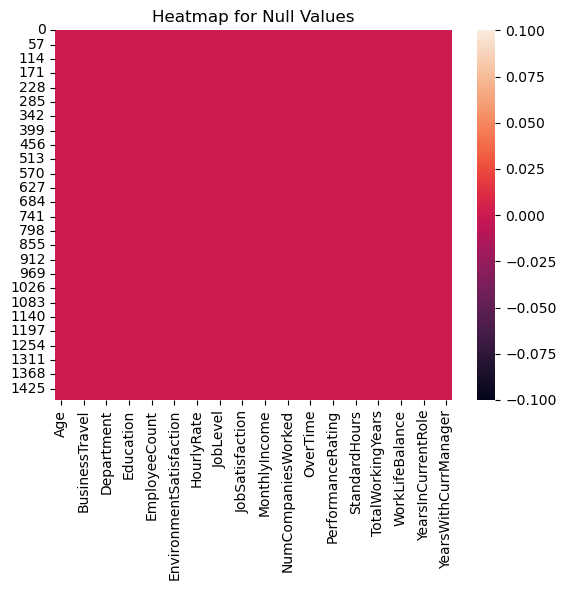

In [331]:
sns.heatmap(df.isnull())
plt.title("Heatmap for Null Values")
plt.show()

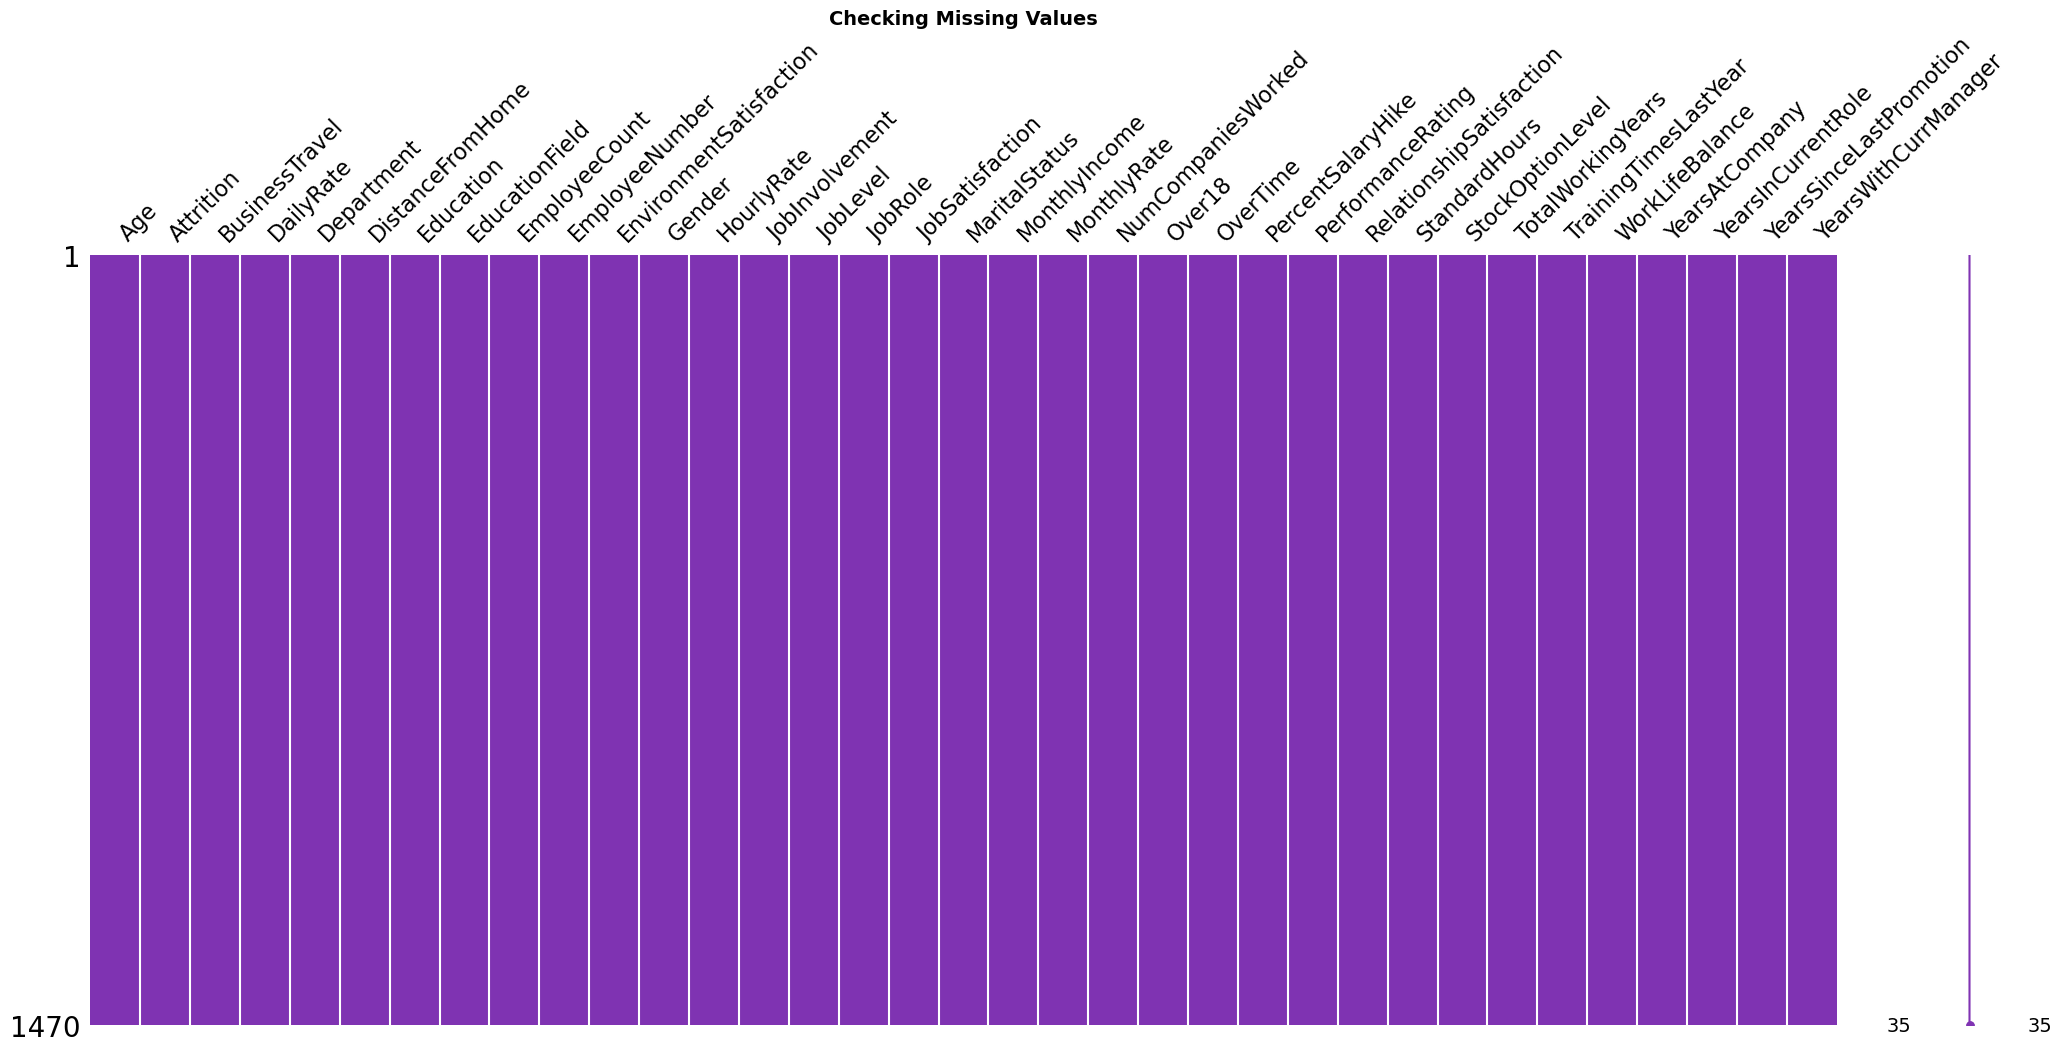

In [332]:
# Visiualizing missing data in DataFrame 
msno.matrix(df, color=( 0.5, 0.2, 0.7))
plt.title('Checking Missing Values', fontsize=14, fontweight='bold')
# Rotate x-axis labels to 0 degrees
#plt.xticks(rotation=90)
plt.show()

<div style="background-color: #F6FDC3; padding: 10px; text-align: center; font-size: 28px;">
    <b style="text-align: center;">Checking Duplicate Values</b>
</div>

In [333]:
# Checking the duplicate rows
print("\033[1mNumber of duplicated rows in the DataFrame:{}\033[0m".format(df.duplicated().sum()),'\n')

print('\033[1mVerifying the presence of duplicated data while inspecting each row individually:\033[0m\n')

print(df.duplicated())

Number of duplicated rows in the DataFrame:0 

Verifying the presence of duplicated data while inspecting each row individually:

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool


In [334]:
print("\033[1mType of DataFrame: {}\033[1m".format(type(df)))
df.info()

Type of DataFrame: <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement       

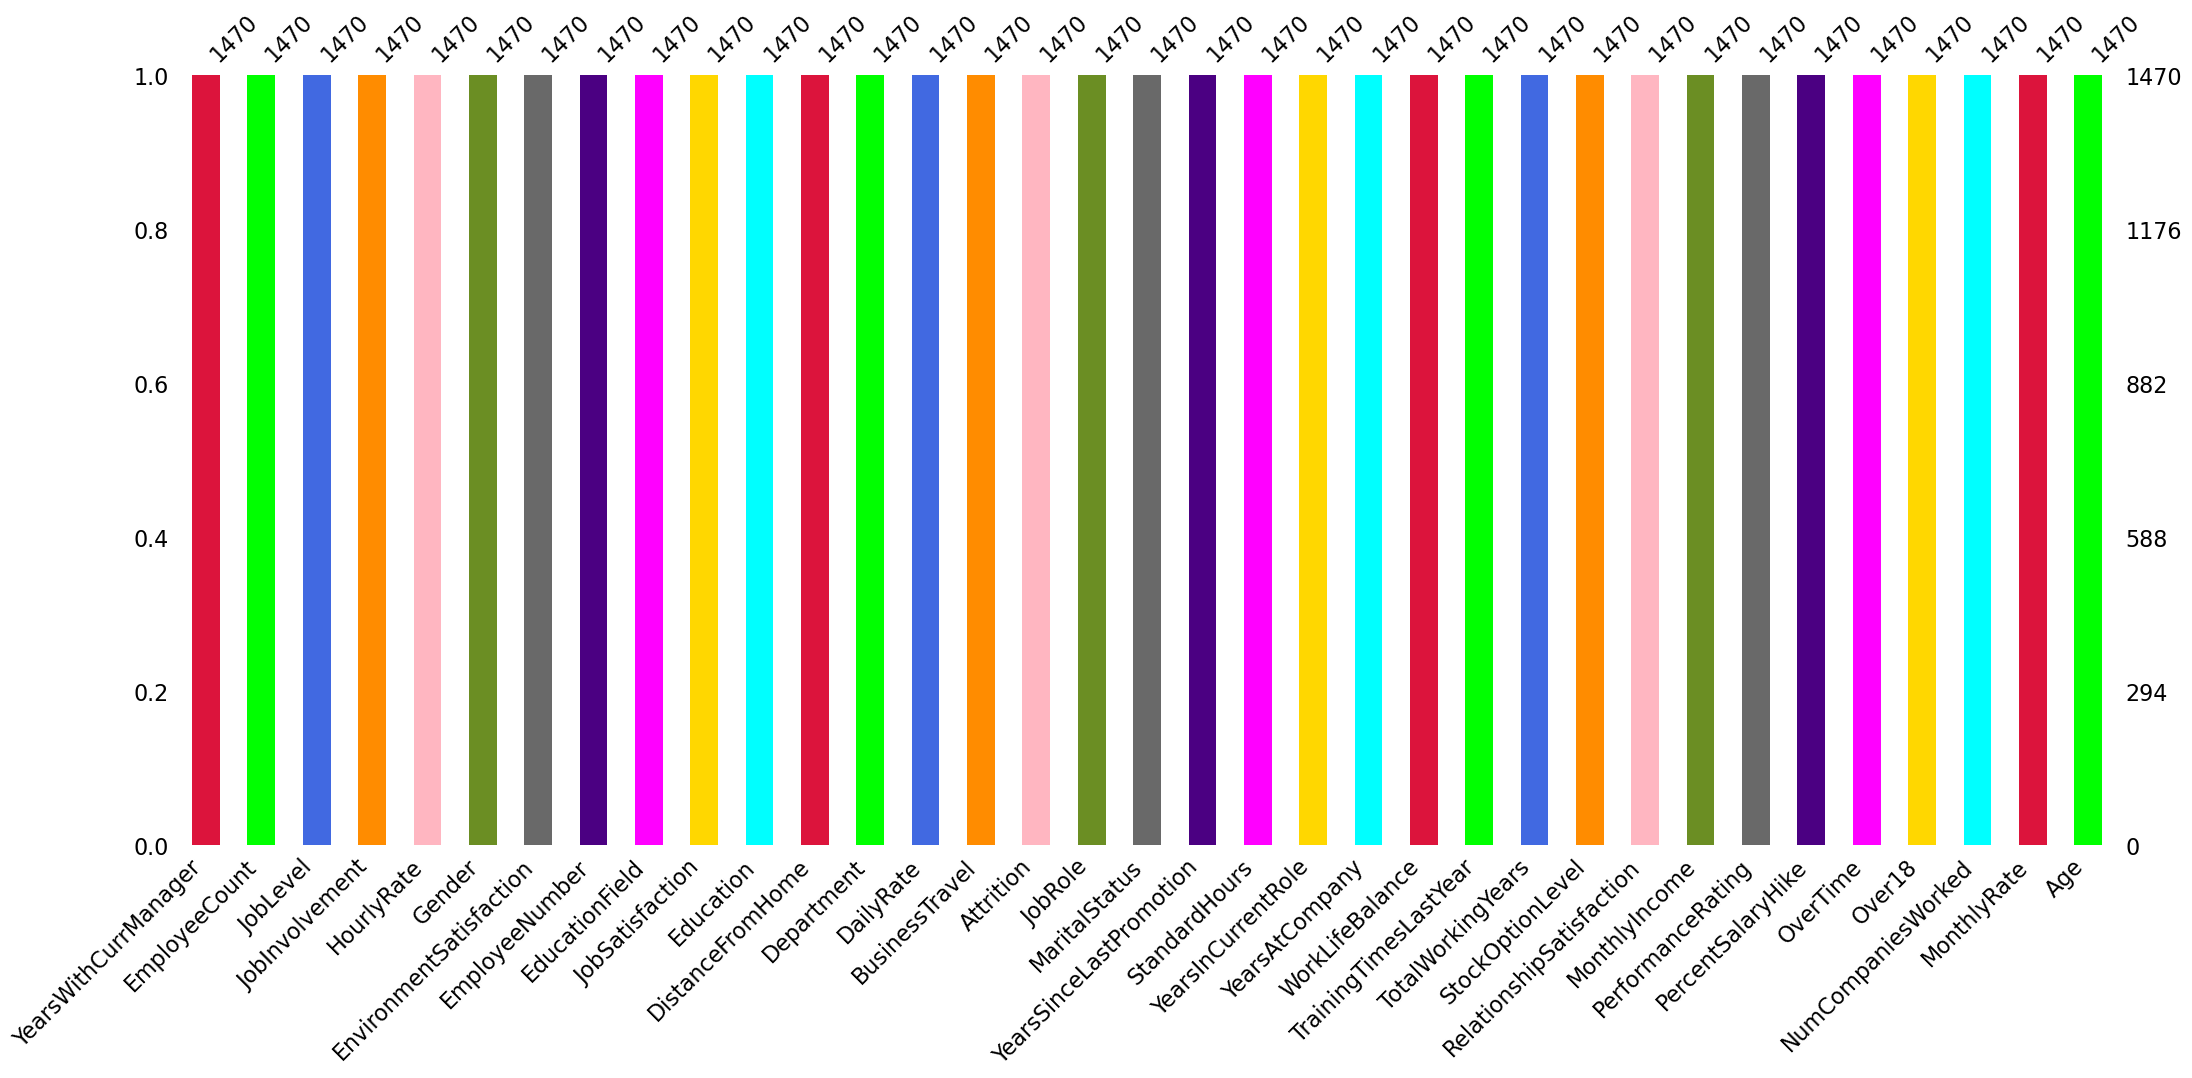

In [335]:
figsize=(10,8)
msno.bar(df, color=['crimson', 'lime', 'royalblue', 'darkorange', 'lightpink', 'olivedrab', 'dimgray', 'indigo', 'magenta', 'gold', 'aqua'], sort='descending')
plt.show()

**Based on the gathered information and visualizations, the following observation become apparent:**

* Data Type and Structure: The dataset is structured as a Pandas DataFrame, containing a total of 35 columns.

* RangeIndex: The DataFrame has a RangeIndex with 1470 entries, ranging from index 0 to 1469.

* Data Types: The DataFrame primarily consists of two data types, namely 'int64' and 'object'. The 'int64' data type is used for 26 columns, which contain numeric values, while the 'object' data type is used for the remaining 9 columns, which typically contain text or categorical data.

* Range Index: The dataset has a RangeIndex with 1470 entries, indicating that it spans from index 0 to 1469.

* Non-Null Values: All columns in the DataFrame have 1470 non-null values, indicating that there are no missing values in the dataset.

* Column Information: The dataset includes various columns, each representing different attributes or features. These columns encompass employee-related data, such as age, job satisfaction, department, and more.

* Memory Usage: The memory usage for storing this DataFrame is approximately 402.1+ KB.
    
**These preliminary observations offer us a basic insight into the composition and characteristics of the HR Analytics Project-Understanding the Attrition in HR.**   

<div style="background-color: #E25E3E; padding: 10px; text-align: center;font-size:20px;">
    <b style="text-align: center;">
Based on the gathered information and visualizations, the following observation become apparent:</b>
</div>

**Attrition Patterns:** It's evident that attrition is a significant concern in the dataset. The "Attrition" column, which indicates whether employees have left the company or not, may exhibit trends or patterns that could be further explored.

**Age Distribution:** The age distribution appears to be diverse, with employees of various age groups represented. This diversity could be explored to understand how age relates to attrition, job satisfaction, or other factors.

**Departmental Insights:** The "Department" column indicates that employees are distributed across different departments. Analyzing attrition rates and other factors within these departments can provide valuable insights.

**Satisfaction Levels:** Columns like "EnvironmentSatisfaction," "JobSatisfaction," and "RelationshipSatisfaction" provide information about employee satisfaction. Examining the distribution and relationships of these variables could reveal their impact on attrition.

**Work-Life Balance:** The "WorkLifeBalance" column may offer insights into how employees perceive their work-life balance and whether it influences attrition rates.

**Promotion and Tenure:** The columns related to years at the company, years in the current role, and years since the last promotion could shed light on the impact of career progression on attrition.

**Training and Development:** "TrainingTimesLastYear" may be explored to understand how employee training and development programs affect attrition.

**Gender and Marital Status:** Analyzing attrition rates based on gender and marital status can provide insights into potential disparities.

**Salary and Compensation:** Columns like "MonthlyIncome" and "PercentSalaryHike" could be examined to see if salary-related factors play a role in attrition.

**Management Relationships:** Years working with the current manager ("YearsWithCurrManager") and performance ratings ("PerformanceRating") may be linked to attrition and merit further exploration.

* These observations provide a foundation for deeper analysis and may guide strategies to address attrition and improve overall employee satisfaction and retention.

<div style="background-color: #F6FDC3; padding: 10px; text-align: center; font-size: 28px;">
    <b style="text-align: center;">Examining the distinct characters or values present in each column</b>
</div>

In [336]:
i = 0

while i < len(df.columns):
    print(df[df.columns[i]].value_counts(), '\n')
    i += 1

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64 

No     1233
Yes     237
Name: Attrition, dtype: int64 

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 

691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64 

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     2

In [337]:
# Checking the number of unique value in each column

(df.nunique().to_frame("No. of unique values", )).style.background_gradient(cmap="plasma")

<div style="background-color: #F6FDC3; padding: 10px; text-align: center; font-size: 28px;">
    <b style="text-align: center;">Analyzing the dataset's categorical and numerical columns</b>
</div>

In [338]:
# Checking for categorical columns
categorical_cols = [i for i in df.dtypes.index if df.dtypes[i] == "object"]
print("\033[1mLength of Categorical Columns:\033[0m",len(categorical_cols),"\033[1mCategorical Columns:\033[0m", categorical_cols)
print("\n")

# Checking for numerical columns
numerical_cols = [i for i in df.dtypes.index if df.dtypes[i] != "object"]
print("\033[1mLength of Numercal Columns:\033[0m",len(numerical_cols), "\033[1mNumerical Columns:\033[0m ", numerical_cols)

Length of Categorical Columns: 9 Categorical Columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


Length of Numercal Columns: 26 Numerical Columns:  ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


**Among the 35 features, 26 are Numerical variables, and the remaining 9 are categorical variables.**

<div style="background-color: #F6FDC3; padding: 10px; text-align: center; font-size: 28px;">
    <b style="text-align: center;">Statistical Summary For Numerical Columns</b>
</div>

In [339]:
#Checking statistical summary of dataset
df.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

**Based on the Descriptive Statistics, it is evident that**

* Uniform Data Completeness: The consistent counts across all features suggest the absence of null or missing values in the dataset.

* Symmetrical Data Distribution: The close proximity of mean to median (in each feature) indicates minimal skewness in the data distribution, reflecting a relatively symmetrical pattern.

* Variability in Data Spread: The relatively high standard deviation across most features suggests that the data points are dispersed or spread out, showing variability within the dataset.

* Potential Outliers: Notable discrepancies between the 75th percentile and the maximum value are observed in the following features: "DistanceFromHome," "TotalWorkingYears," "YearsAtCompany," "YearsInCurrentRole," "YearsSinceLastPromotion," and "YearsWithCurrentManager." These differences imply the possible presence of outliers in these specific features.

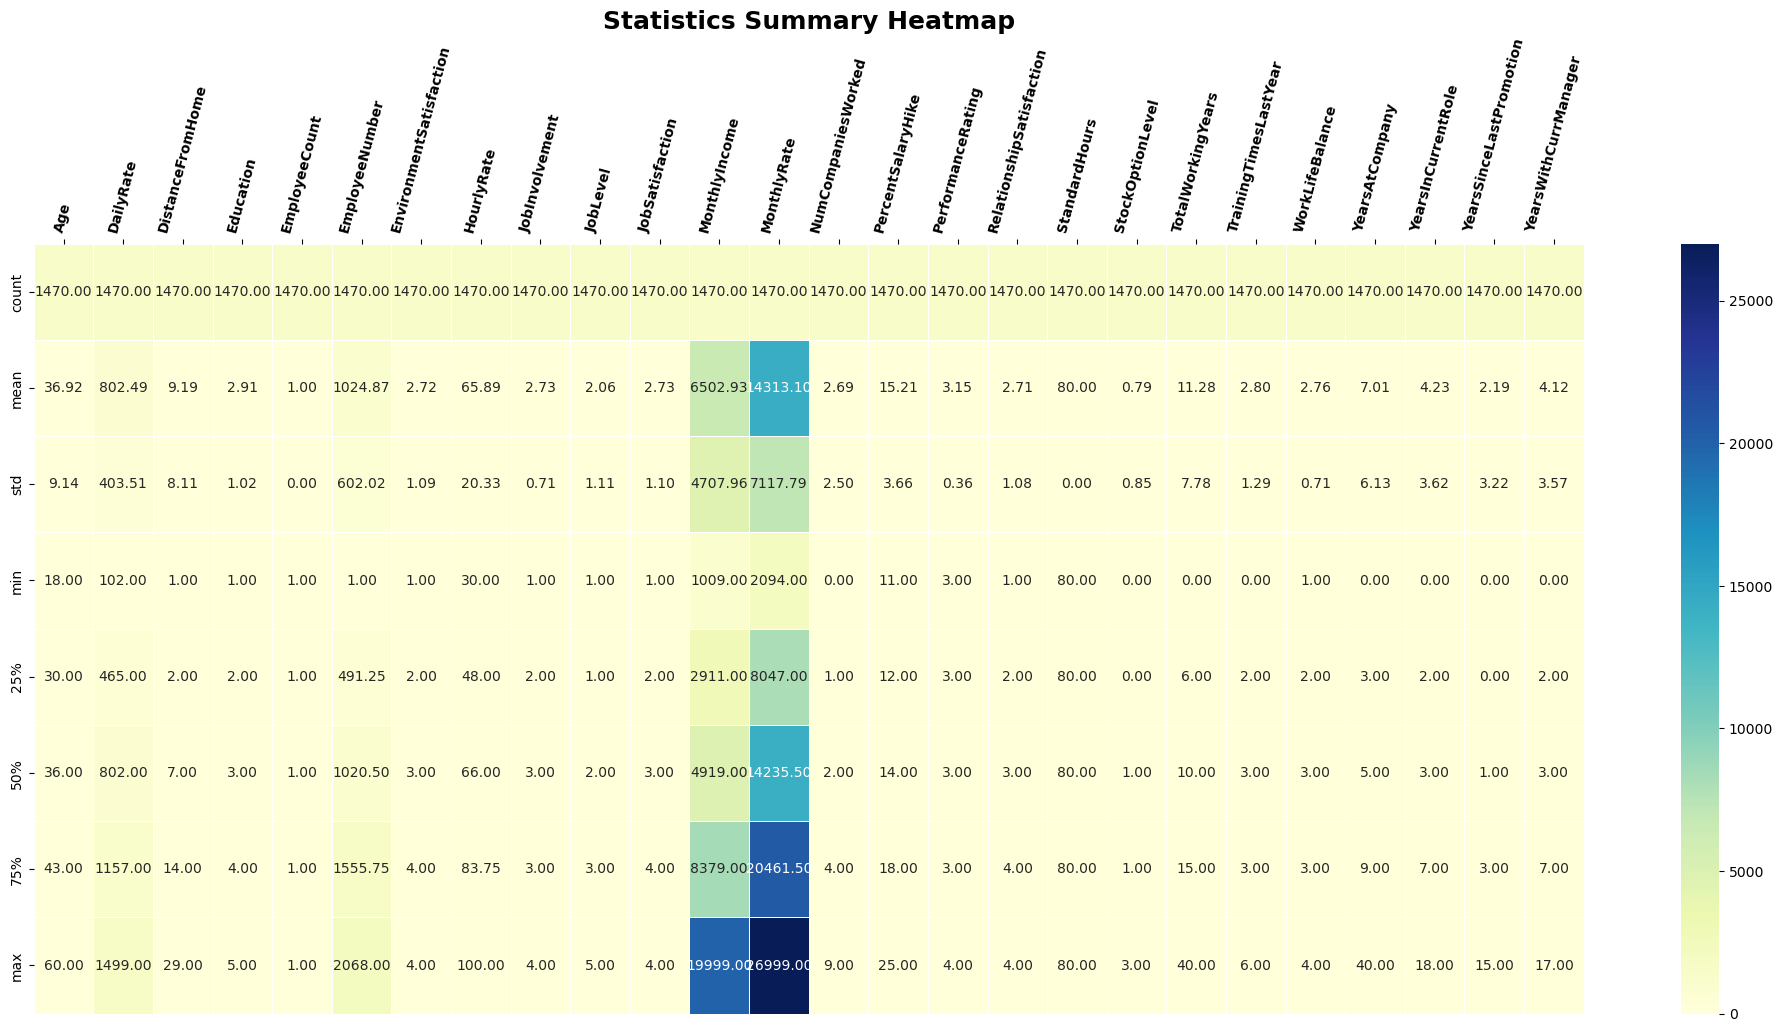

In [340]:
plt.figure(figsize=(25, 10))  # Adjusted the figure size

heatmap = sns.heatmap(df.describe(), annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
heatmap.xaxis.tick_top()
plt.xticks(fontweight='bold', rotation=75)  
heatmap.yaxis.tick_left() 

plt.title('Statistics Summary Heatmap', fontsize=18, fontweight='bold')
plt.show()

**Crucial aspects for gaining insight into the Descriptive statistics**

**Age:** Normally distributed with moderate variability.

**DailyRate:**  Right-skewed, moderately variable, and well-shaped.

**DistanceFromHome:**  Right-skewed, moderately variable, and well-shaped.

**Education:**  Nearly normal distribution and well-balanced.

**EmployeeCount:**  Uniformly distributed with no variability.

**EmployeeNumber:**  Normally distributed with moderate variability.

**EnvironmentSatisfaction:**  Nearly normal distribution and well-balanced.

**HourlyRate:**  Normally distributed with moderate variability.

**JobInvolvement:**  Normally distributed with moderate variability.

**JobLevel:**  Right-skewed, moderately variable, and well-shaped.

**JobSatisfaction:**  Nearly normal distribution and well-balanced.

**MonthlyIncome:**  Right-skewed, moderately variable, and well-shaped.

**MonthlyRate:**  Normally distributed with moderate variability.

**NumCompaniesWorked:**  Right-skewed, moderately variable, and well-shaped.

**PercentSalaryHike:**  Normally distributed with moderate variability.

**PerformanceRating:**  Normally distributed with moderate variability.

**RelationshipSatisfaction:**  Nearly normal distribution and well-balanced.

**StandardHours:**  Uniformly distributed with no variability.

**StockOptionLevel:**  Right-skewed, moderately variable, and well-shaped.

**TotalWorkingYears:**  Normally distributed with moderate variability.

**TrainingTimesLastYear:**  Right-skewed, moderately variable, and well-shaped.

**WorkLifeBalance:**  Normally distributed with moderate variability.

**YearsAtCompany:**  Right-skewed, moderately variable, and well-shaped.

**YearsInCurrentRole:**  Right-skewed, moderately variable, and well-shaped.

**YearsSinceLastPromotion:**  Right-skewed, moderately variable, and well-shaped.

**YearsWithCurrManager:**  Right-skewed, moderately variable, and well-shaped.

### Data Analysis:
Our approach will involve Univariate Analysis, which aims to examine the distribution of continuous features and the frequency of categorical features. Subsequently, we will conduct Bivariate Analysis to explore the relationships between features and the target variable, as well as between different features. Finally, we will engage in Multivariate Analysis to assess multicollinearity and correlation within the data.

<div style="background-color: #F6FDC3; padding: 10px; text-align: center; font-size: 20px;">
    <b style="text-align: center;">Univariant Analysis</b>
</div>

### Graphical Analysis

No     1233
Yes     237
Name: Attrition, dtype: int64


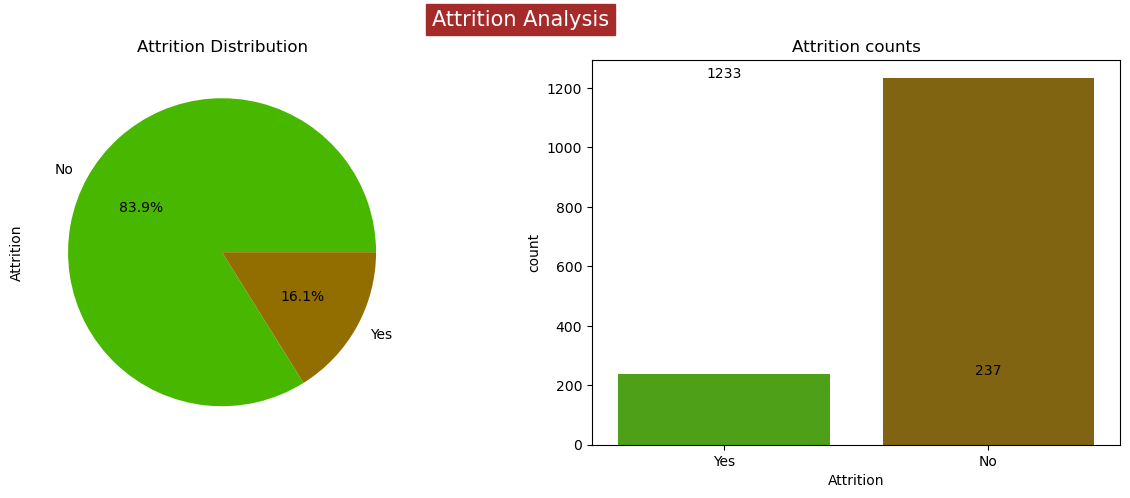

In [341]:
# Checking the first target variable
sns.set_palette("brg_r")
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
df['Attrition'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Attrition Distribution')
plt.grid(False)
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Attrition')
value_counts = df['Attrition'].value_counts()
print(value_counts)
plt.title('Attrition counts')
plt.grid(False)
for i, count in enumerate(df['Attrition'].value_counts()):
    plt.text(i, count, str(count), ha='center')
plt.suptitle('Attrition Analysis', fontsize=15, backgroundcolor='brown', color='white')  
plt.show()    

* We observe that attrition is occurring in 16.1% (237 individuals), while 83.9% (1233 individuals) do not experience attrition in the dataset. Due to this class imbalance in the target variable, it is necessary to balance the data prior to creating the model.

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


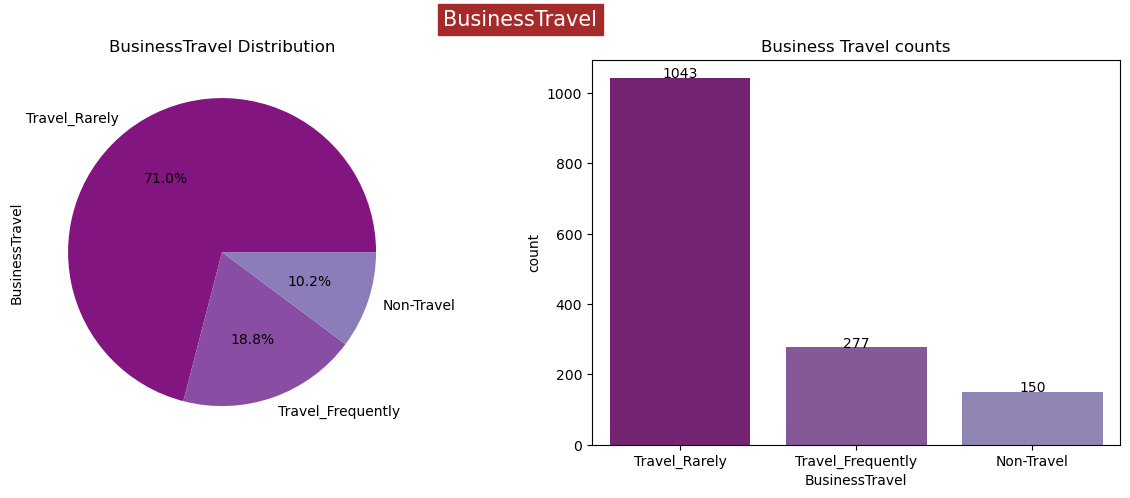

In [342]:
sns.set_palette("BuPu_r")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['BusinessTravel'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('BusinessTravel Distribution')
plt.grid(False)
plt.subplot(1,2,2)
sns.countplot(data=df, x='BusinessTravel')
plt.title('Business Travel counts')
print(df['BusinessTravel'].value_counts())
plt.grid(False)
for i, count in enumerate(df['BusinessTravel'].value_counts()):
    plt.text(i, count, str(count), ha='center')
plt.suptitle('BusinessTravel', fontsize=15, backgroundcolor='brown', color='white') 
plt.show()

* The "BusinessTravel" column comprises three distinct categories, each with varying counts of employees. Specifically, there are 1043 employees classified under "Travel_Rarely," making up approximately 71% of the workforce. Additionally, 277 employees, or roughly 18.8% of the total, fall into the "Travel_Frequently" category. The remaining 150 employees, representing approximately 10.2% of the workforce, belong to the "Non-Travel" category. This distribution reveals the proportion of employees within each business travel category.

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


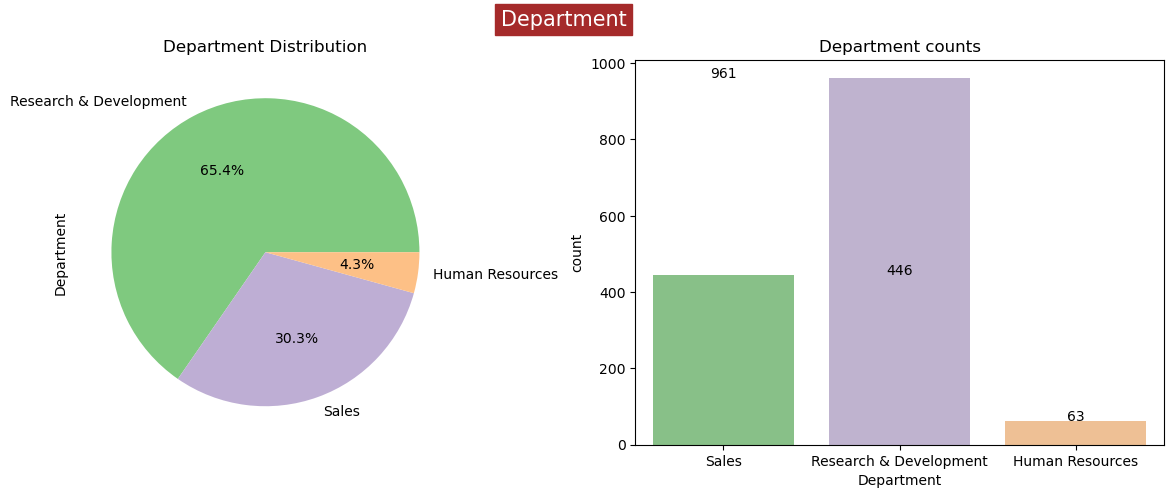

In [343]:
sns.set_palette("Accent")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Department'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Department Distribution')
plt.grid(False)
plt.subplot(1,2,2)
sns.countplot(data=df, x=df['Department'])
plt.title('Department counts')
plt.grid(False)
print(df['Department'].value_counts())
for i, count in enumerate(df['Department'].value_counts()):
    plt.text(i, count, str(count), ha='center')
plt.suptitle('Department', fontsize=15, backgroundcolor='brown', color='white') 
plt.show()

* We can observe that there are three distinct departments within the organization. Among these, the Research & Development department comprises 961 employees, accounting for approximately 65.4% of the workforce. The Sales department consists of 446 employees, representing around 30.3% of the total, while the Human Resources department has 63 employees, making up approximately 4.3% of the workforce.

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64


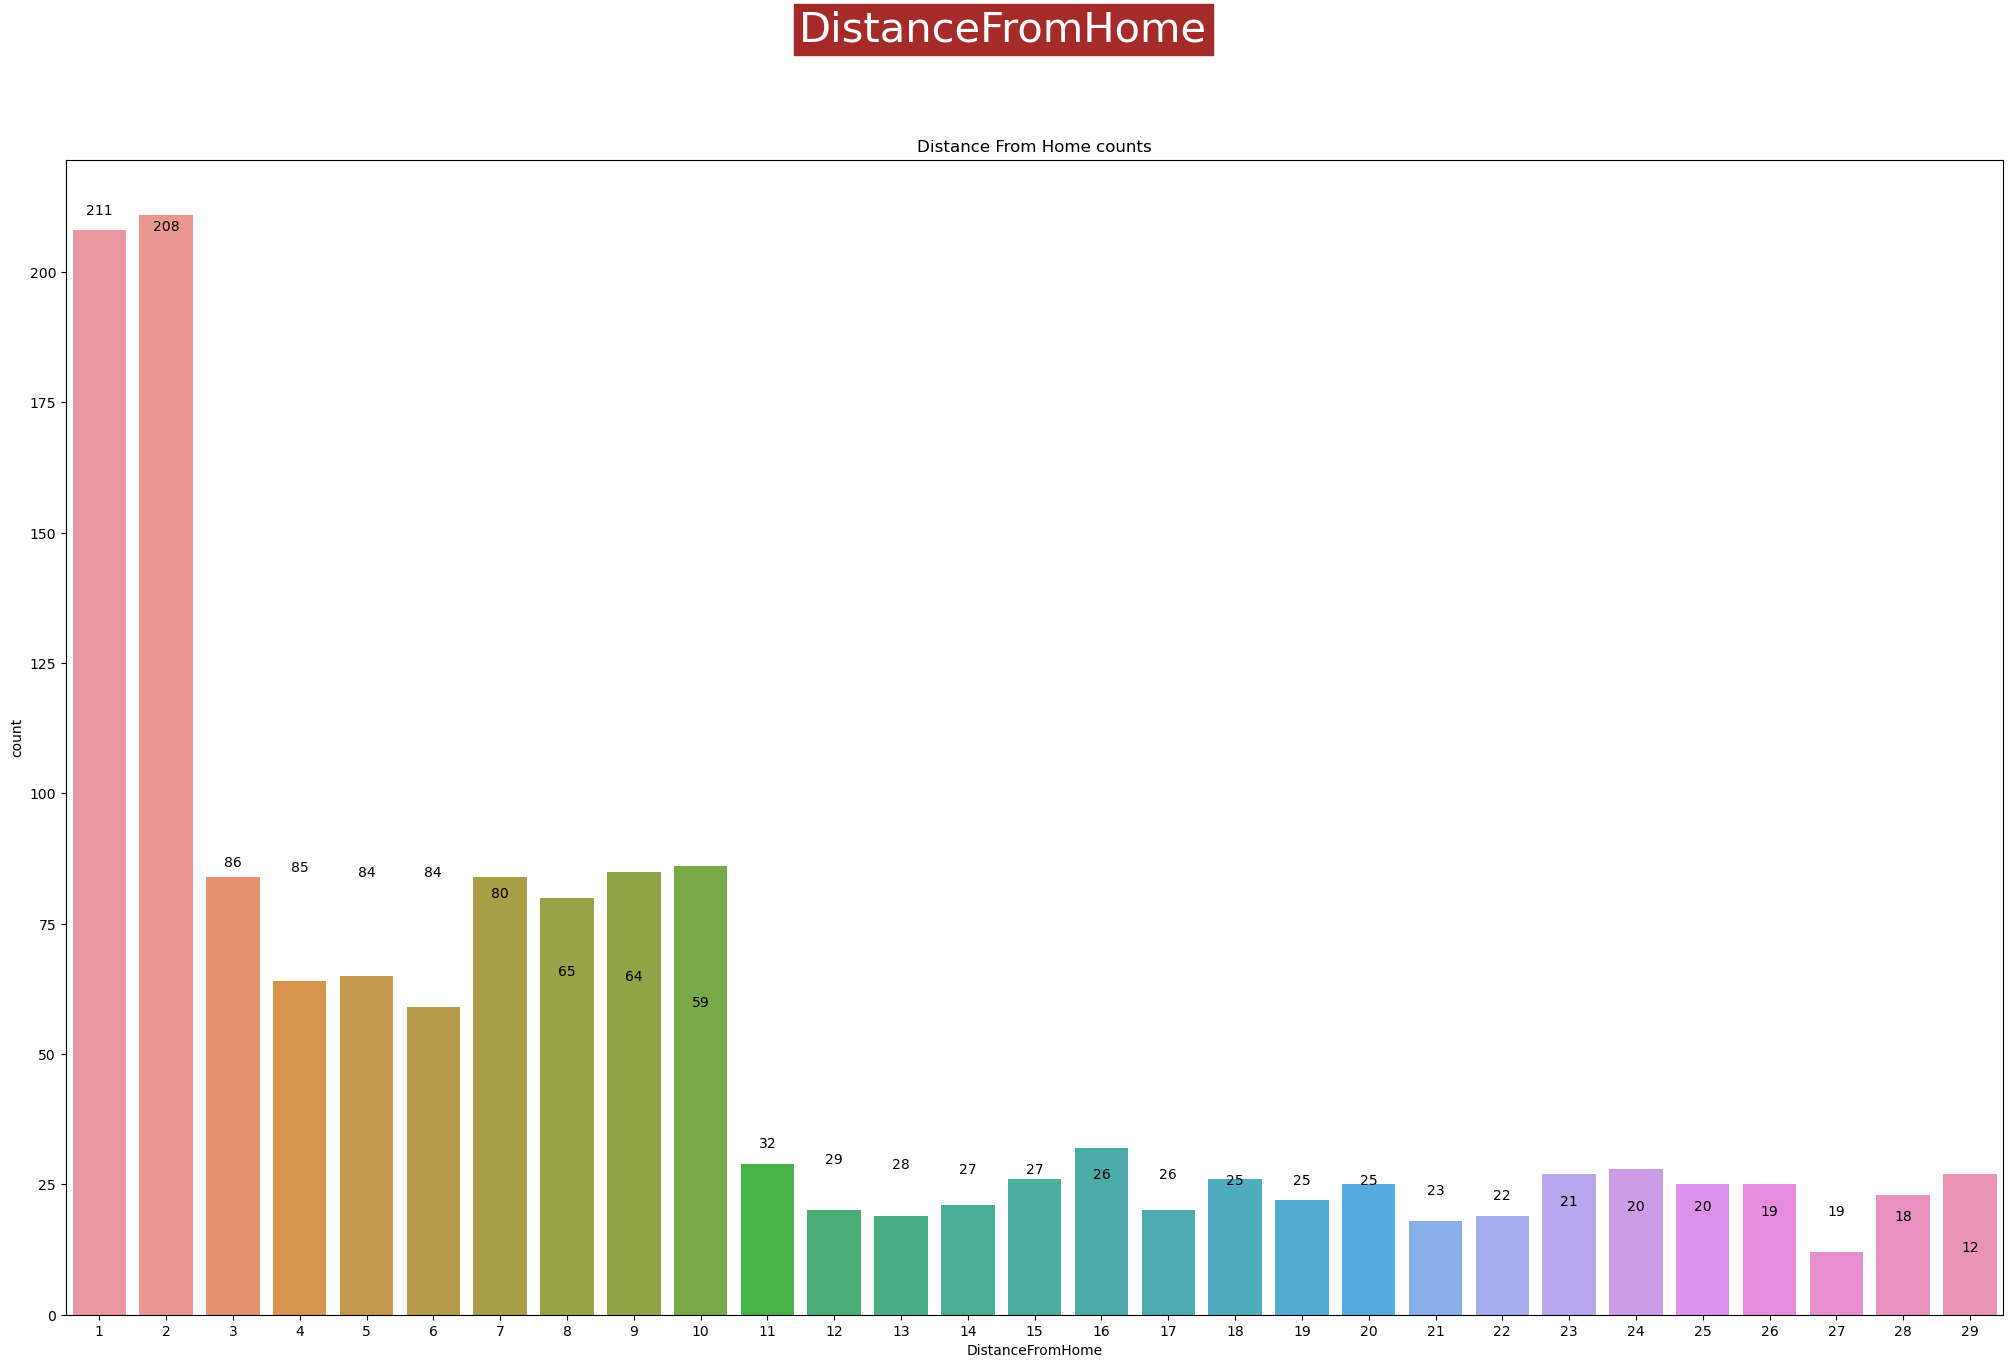

In [344]:
sns.set_palette("cubehelix_r")
plt.figure(figsize=(25, 15))
sns.countplot(data=df, x='DistanceFromHome')
plt.title('Distance From Home counts')
plt.grid(False)
value_counts = df['DistanceFromHome'].value_counts()
print(value_counts)
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center')
plt.suptitle('DistanceFromHome', fontsize=30, backgroundcolor='brown', color='white') 
plt.show()

* It is evident that in the "DistanceFromHome" column, categories 1 and 2 have the highest frequencies, each exceeding 200 occurrences.

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


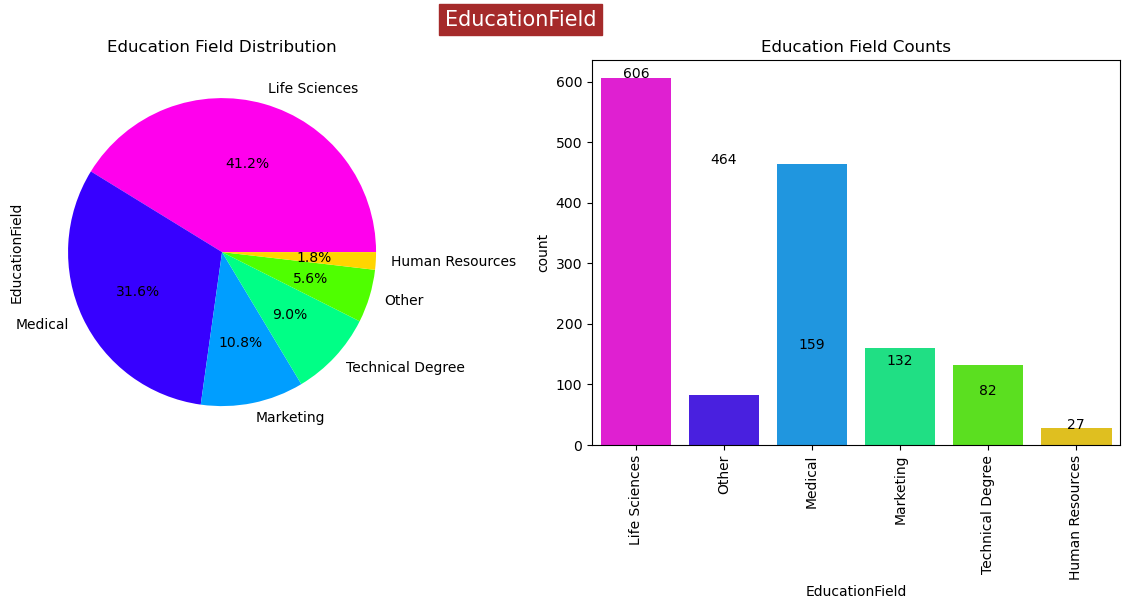

In [345]:
sns.set_palette("hsv_r")
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
education_field_counts = df['EducationField'].value_counts()
print(education_field_counts)
plt.grid(False)
education_field_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Education Field Distribution')
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='EducationField')
plt.xticks(rotation=90)
plt.title('Education Field Counts')
plt.grid(False)
# Display the count values on the count plot
for i, count in enumerate(education_field_counts):
    plt.text(i, count, str(count), ha='center')
plt.suptitle('EducationField', fontsize=15, backgroundcolor='brown', color='white')     
plt.show()

* Among the employees, we observe diversity in their educational backgrounds, with a total of six distinct fields. The highest number of employees, comprising 41.2%, come from the field of Life Sciences, totaling 606 individuals. The second-highest category is Medical, with 464 employees, making up 31.6% of the workforce. In the Marketing field, there are 159 employees, accounting for 10.8%, while Technical degree holders constitute 9% with 132 employees. Other categories encompass 5.6% of employees, totaling 82 individuals, and Human Resources employees make up 1.8% with a count of 27. 

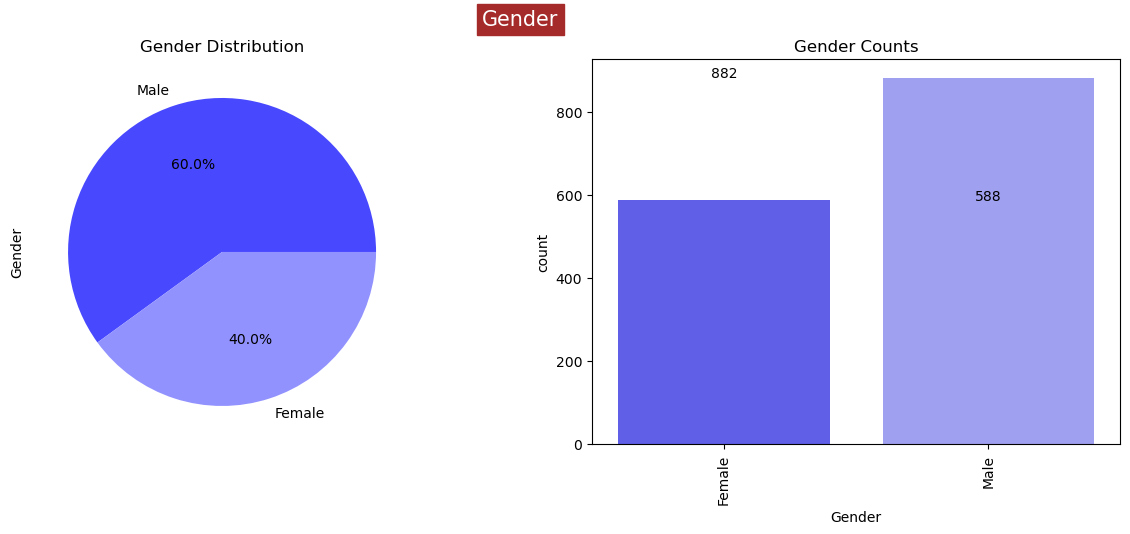

In [346]:
sns.set_palette("bwr")
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
gender_counts = df['Gender'].value_counts()
gender_counts.plot.pie(autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.grid(False)
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Gender')
plt.xticks(rotation=90)
plt.title('Gender Counts')
plt.grid(False)
# Display the count values on the count plot
for i, count in enumerate(gender_counts):
    plt.text(i, count, str(count), ha='center')
plt.suptitle('Gender', fontsize=15, backgroundcolor='brown', color='white') 
plt.show()

* There is a total of 1470 employees, with 882 of them being male, constituting 60% of the workforce, while the remaining 588 employees are female, making up 40% of the total.

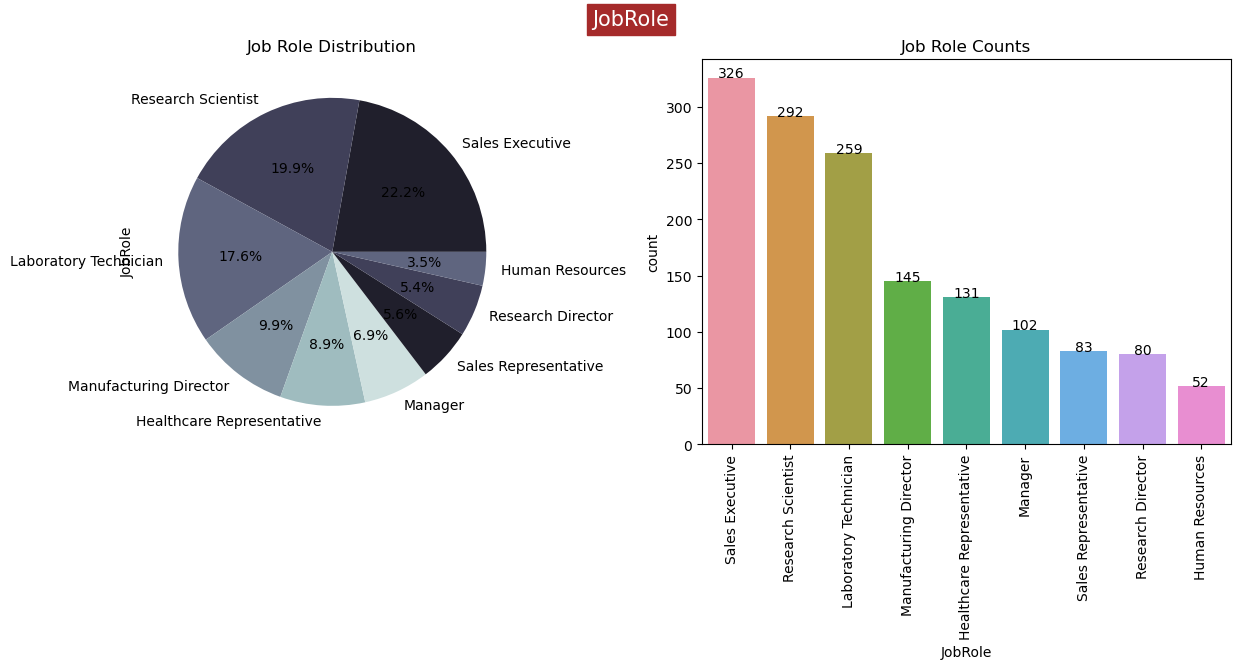

In [347]:
sns.set_palette("bone")
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
jobrole_counts = df['JobRole'].value_counts()
jobrole_counts.plot.pie(autopct='%1.1f%%')
plt.title('Job Role Distribution')
plt.grid(False)
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='JobRole')
plt.xticks(rotation=90)
plt.title('Job Role Counts')
plt.grid(False)
# Display the count values on the count plot
for i, count in enumerate(jobrole_counts):
    plt.text(i, count, str(count), ha='center')
plt.suptitle('JobRole', fontsize=15, backgroundcolor='brown', color='white')
plt.show()

* Within the "jobrole" column, there are nine distinct categories. The job role with the highest count is "Sales Executive," with 326 employees, representing 22.2% of the workforce. The second-highest count is for "Research Scientist" job roles, totaling 292 employees, which accounts for 19.9% of the workforce. On the other hand, "Human Resources" has the lowest count among job roles, with 52 employees, making up 3.5% of the total.

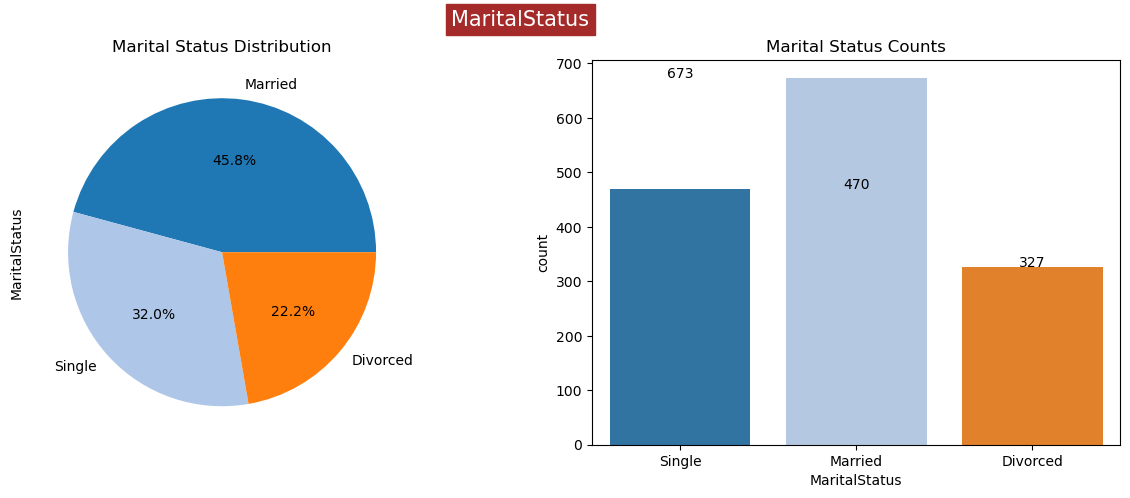

In [348]:
sns.set_palette("tab20")
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
maritalstatus_counts = df['MaritalStatus'].value_counts()
maritalstatus_counts.plot.pie(autopct='%1.1f%%')
plt.title('Marital Status Distribution')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='MaritalStatus')
plt.title('Marital Status Counts')

# Display the count values on the count plot
for i, count in enumerate(maritalstatus_counts):
    plt.text(i, count, str(count), ha='center')
plt.suptitle('MaritalStatus', fontsize=15, backgroundcolor='brown', color='white')
plt.show()

* The majority of employees in the organization, approximately 45.8%, are married. Single employees make up 32% of the workforce, while 22.2% of employees are divorced.

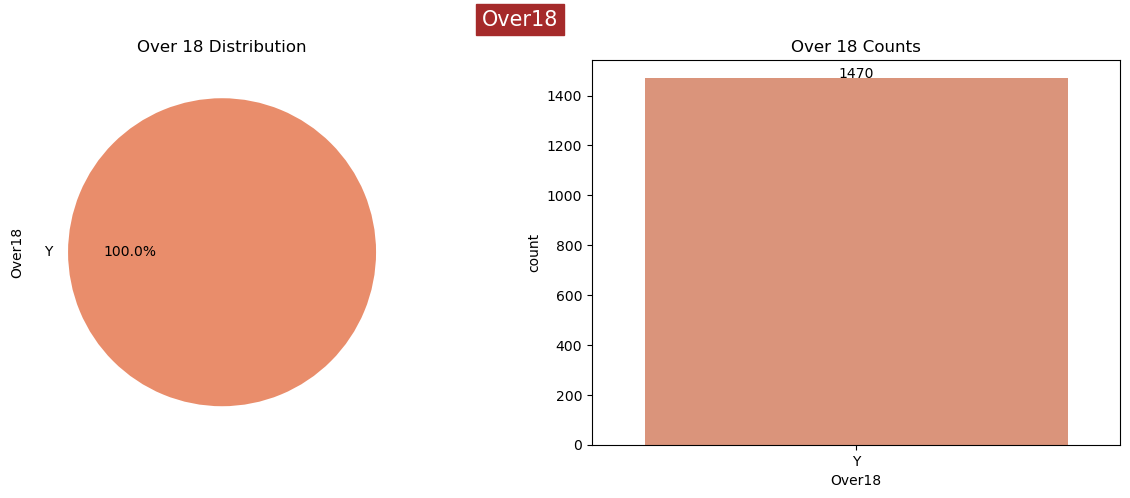

In [349]:
sns.set_palette("flare")
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
over18_counts = df['Over18'].value_counts()
over18_counts.plot.pie(autopct='%1.1f%%')
plt.title('Over 18 Distribution')
plt.grid(False)
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Over18')
plt.title('Over 18 Counts')
plt.grid(False)
# Display the count values on the count plot
for i, count in enumerate(over18_counts):
    plt.text(i, count, str(count), ha='center')
plt.suptitle('Over18', fontsize=15, backgroundcolor='brown', color='white')
plt.show()

* Since all employees are above 18 years old, and this column does not contain any significant information, it can be safely removed during the data cleaning process.

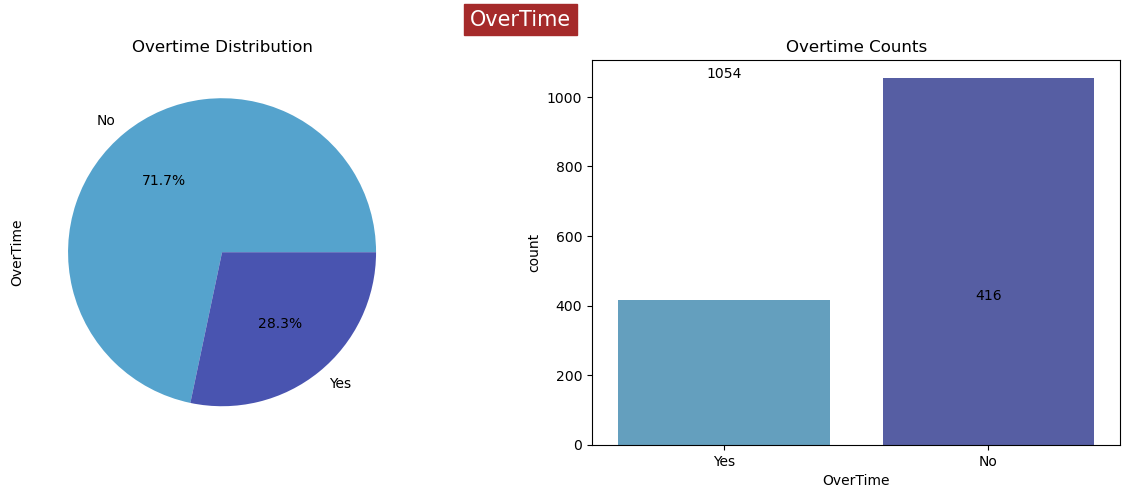

In [350]:
sns.set_palette("icefire")
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
overtime_counts = df['OverTime'].value_counts()
overtime_counts.plot.pie(autopct='%1.1f%%')
plt.title('Overtime Distribution')
plt.grid(False)
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='OverTime')
plt.title('Overtime Counts')
plt.grid(False)
# Display the count values on the count plot
for i, count in enumerate(overtime_counts):
    plt.text(i, count, str(count), ha='center')
plt.suptitle('OverTime', fontsize=15, backgroundcolor='brown', color='white')
plt.show()

* Out of a total of 1470 employees, 1054, or approximately 71.7%, are not inclined to pursue overtime. On the other hand, 416 employees, making up about 28.3% of the workforce, express interest in working overtime. 

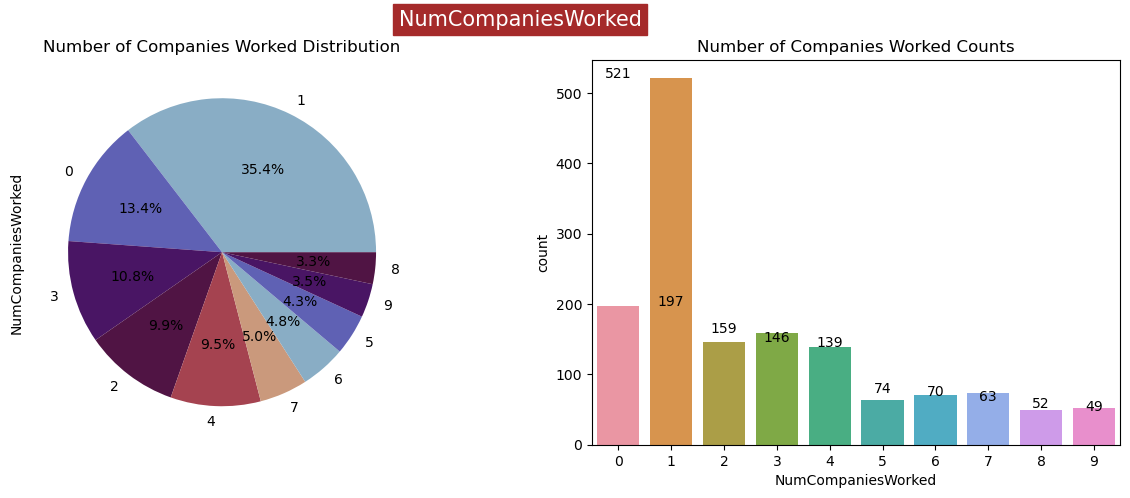

In [351]:
sns.set_palette("twilight")
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
num_companies_worked_counts = df['NumCompaniesWorked'].value_counts()
num_companies_worked_counts.plot.pie(autopct='%1.1f%%')
plt.title('Number of Companies Worked Distribution')
plt.grid(False)
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='NumCompaniesWorked')
plt.title('Number of Companies Worked Counts')
plt.grid(False)
# Display the count values on the count plot
for i, count in enumerate(num_companies_worked_counts):
    plt.text(i, count, str(count), ha='center')
plt.suptitle('NumCompaniesWorked', fontsize=15, backgroundcolor='brown', color='white')
plt.show()

* The majority of employees, accounting for 35.4%, have worked at just one company, with a total count of 521 employees. In contrast, a smaller group of only 49 employees, or 3.3% of the workforce, have experience working at eight different companies.

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


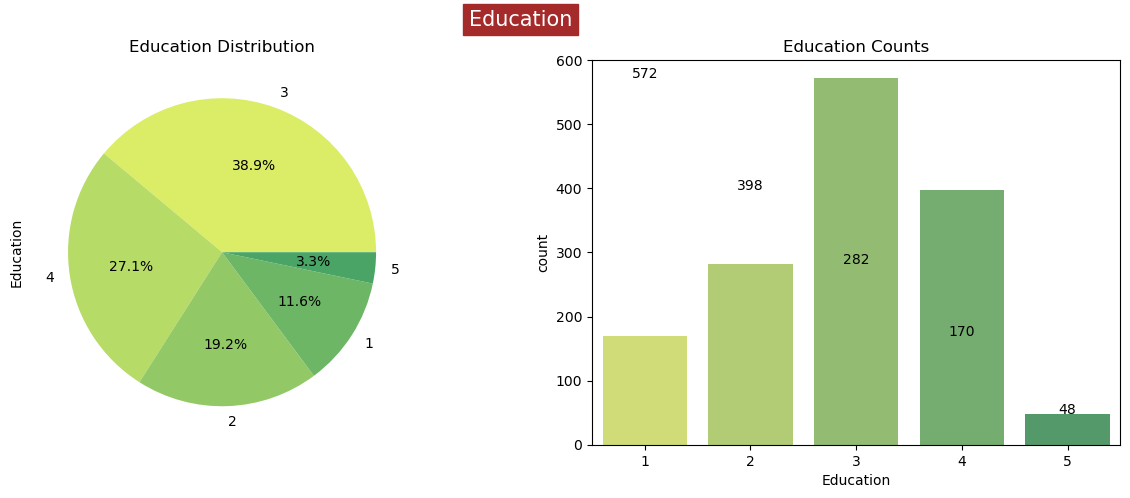

In [352]:
sns.set_palette("summer_r")
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
education_counts = df['Education'].value_counts()
print(education_counts )
education_counts.plot.pie(autopct='%1.1f%%')
plt.title('Education Distribution')
plt.grid(False)
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Education')
plt.title('Education Counts')
plt.grid(False)
# Display the count values on the count plot
for i, count in enumerate(education_counts):
    plt.text(i, count, str(count), ha='center')
plt.suptitle('Education', fontsize=15, backgroundcolor='brown', color='white')
plt.show()

* Within the "Education" column, which comprises five categories, the highest proportion, at 38.9%, corresponds to category 3, consisting of 572 employees. In contrast, the lowest percentage, at 3.3%, pertains to category 5, with 48 employees.

1    1470
Name: EmployeeCount, dtype: int64


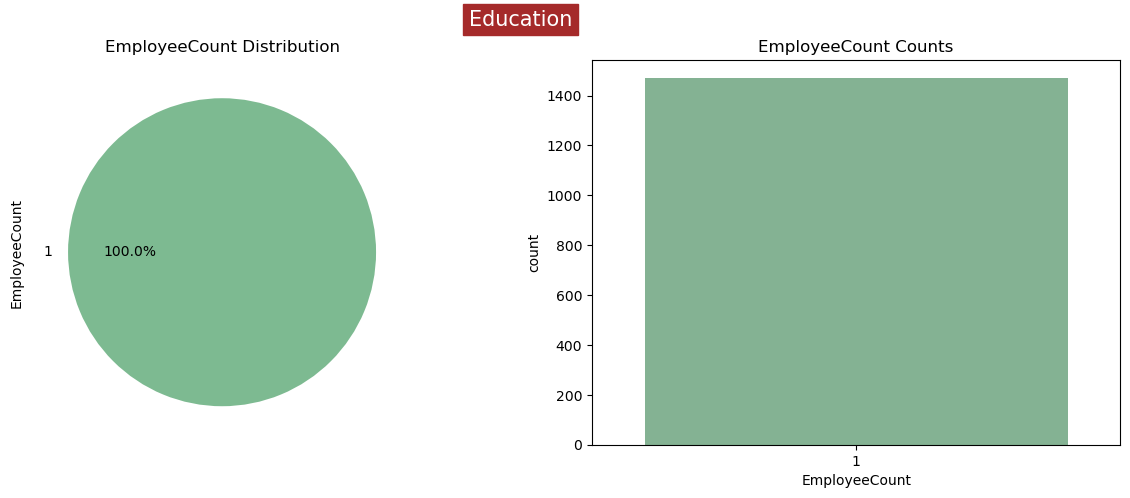

In [353]:
sns.set_palette("crest")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['EmployeeCount'].value_counts().plot(kind ='pie',autopct='%1.1f%%')
plt.title('EmployeeCount Distribution')
plt.grid(False)
plt.subplot(1,2,2)
sns.countplot(data=df, x=df['EmployeeCount'])
plt.title('EmployeeCount Counts')
print(df['EmployeeCount'].value_counts())
plt.grid(False)
plt.suptitle('Education', fontsize=15, backgroundcolor='brown', color='white')
plt.show()

* The "Employee count" column contains only a single category, so it will be removed from the dataset before creating the model.

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


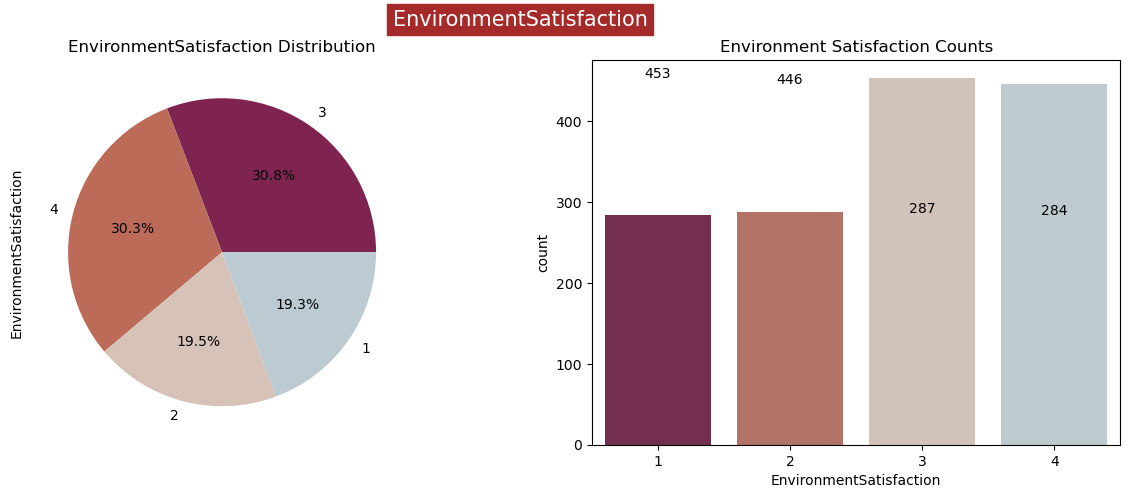

In [354]:
sns.set_palette("twilight_shifted_r")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['EnvironmentSatisfaction'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('EnvironmentSatisfaction Distribution')
plt.grid(False)
plt.subplot(1,2,2)
sns.countplot(data=df, x=df['EnvironmentSatisfaction'])
environment_satisfaction_counts= df['EnvironmentSatisfaction'].value_counts()
print(environment_satisfaction_counts)
plt.grid(False)
plt.title('Environment Satisfaction Counts')
for i, count in enumerate(environment_satisfaction_counts):
    plt.text(i, count, str(count), ha='center')
plt.suptitle('EnvironmentSatisfaction', fontsize=15, backgroundcolor='brown', color='white')
plt.show()

* The "Environment Satisfaction" column consists of four categories. Among these, category 3 has the highest count, with 453 employees, representing 30.8% of the total. The second-highest count, 446 employees or 30.3%, belongs to category 4. Conversely, category 1 has the lowest count at 284 employees, making up 19.3%. This suggests that a significant majority of employees express satisfaction with their working environment.

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64


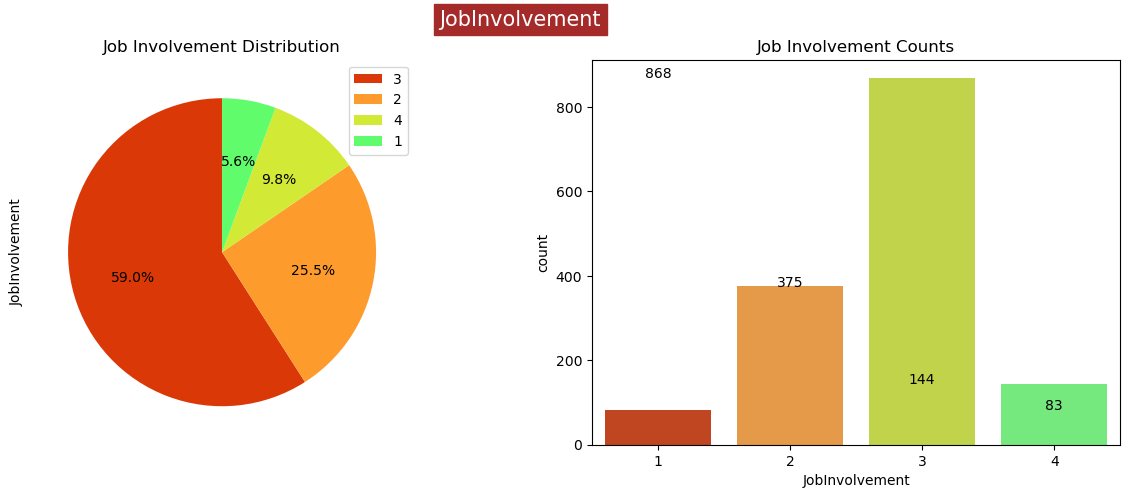

In [355]:
sns.set_palette("turbo_r")
plt.figure(figsize=(15, 5))
# Create a pie chart for distribution
plt.subplot(1, 2, 1)
job_involvement_counts = df['JobInvolvement'].value_counts()
print(job_involvement_counts)
plt.grid(False)
job_involvement_counts.plot.pie(autopct='%1.1f%%', labels=None, startangle=90)
plt.title('Job Involvement Distribution')
plt.legend(job_involvement_counts.index, loc='upper right')
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='JobInvolvement')
plt.title('Job Involvement Counts')
plt.grid(False)

# Display the count values on the count plot
for i, count in enumerate(job_involvement_counts):
    plt.text(i, count, str(count), ha='center')
plt.suptitle('JobInvolvement', fontsize=15, backgroundcolor='brown', color='white')
plt.show()

* The "Job Involvement" column is divided into four categories. Among these, category 3 has the highest count, with 868 employees, making up 59% of the total. In contrast, category 1 has the lowest count, with only 83 employees, representing 5.6% of the workforce.

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64


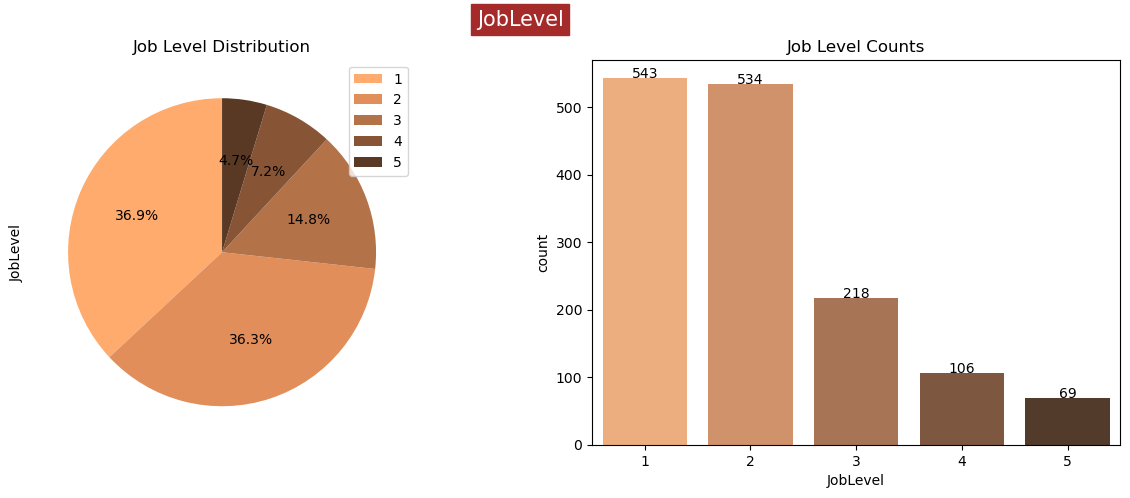

In [356]:
sns.set_palette("copper_r")
plt.figure(figsize=(15, 5))
# Create a pie chart for distribution
plt.subplot(1, 2, 1)
job_level_counts = df['JobLevel'].value_counts()
print(job_level_counts)
plt.grid(False)
job_level_counts.plot.pie(autopct='%1.1f%%', labels=None, startangle=90)
plt.title('Job Level Distribution')
plt.legend(job_level_counts.index, loc='upper right')

# Create a count plot for counts
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='JobLevel')
plt.title('Job Level Counts')
plt.grid(False)

# Display the count values on the count plot
for i, count in enumerate(job_level_counts):
    plt.text(i, count, str(count), ha='center')
plt.suptitle('JobLevel', fontsize=15, backgroundcolor='brown', color='white')
plt.show()

* The "Job Level" column is categorized into five distinct groups. Within these categories, category 1 boasts the highest count, with 543 employees, constituting 36.9% of the total. On the other hand, category 5 has the lowest count, with 59 employees, making up 4.7%.

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


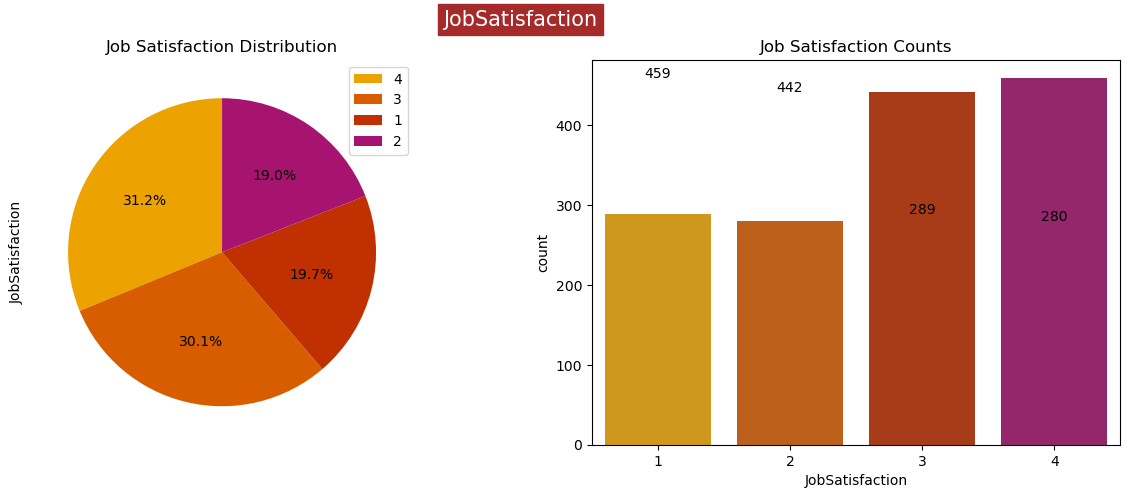

In [357]:
sns.set_palette("gnuplot_r")
plt.figure(figsize=(15, 5))
# Create a pie chart for distribution
plt.subplot(1, 2, 1)
job_satisfaction_counts = df['JobSatisfaction'].value_counts()
print(job_satisfaction_counts)
plt.grid(False)
job_satisfaction_counts.plot.pie(autopct='%1.1f%%', labels=None, startangle=90)
plt.title('Job Satisfaction Distribution')
plt.legend(job_satisfaction_counts.index, loc='upper right')
# Create a count plot for counts
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='JobSatisfaction')
plt.title('Job Satisfaction Counts')
plt.grid(False)

# Display the count values on the count plot
for i, count in enumerate(job_satisfaction_counts):
    plt.text(i, count, str(count), ha='center')
plt.suptitle('JobSatisfaction', fontsize=15, backgroundcolor='brown', color='white')
plt.show()

* The "Job Satisfaction" column encompasses four distinct categories. Among these, category 4 holds the highest count, with 459 employees, accounting for 31.2% of the total. In contrast, category 2 has the lowest count, with 280 employees, making up 19% of the workforce.

3    1244
4     226
Name: PerformanceRating, dtype: int64


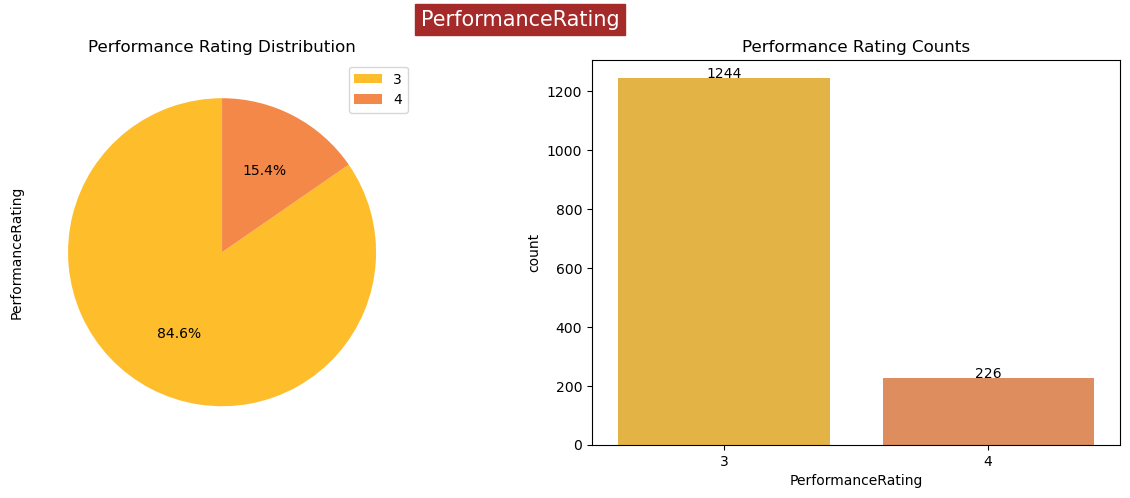

In [358]:
sns.set_palette("plasma_r")
plt.figure(figsize=(15, 5))
# Create a pie chart for distribution
plt.subplot(1, 2, 1)
performance_rating_counts = df['PerformanceRating'].value_counts()
print(performance_rating_counts)
performance_rating_counts.plot.pie(autopct='%1.1f%%', labels=None, startangle=90)
plt.title('Performance Rating Distribution')
plt.grid(False)
plt.legend(performance_rating_counts.index, loc='upper right')
# Create a count plot for counts
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='PerformanceRating')
plt.title('Performance Rating Counts')
plt.grid(False)
# Display the count values on the count plot
for i, count in enumerate(performance_rating_counts):
    plt.text(i, count, str(count), ha='center')
plt.suptitle('PerformanceRating', fontsize=15, backgroundcolor='brown', color='white')
plt.show()

* Within the "Performance Rating" column, there exist two categories. Category 3 has the highest count, with 1244 employees, representing 84.6% of the total, while category 4 contains 226 employees, making up 15.4%.

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64


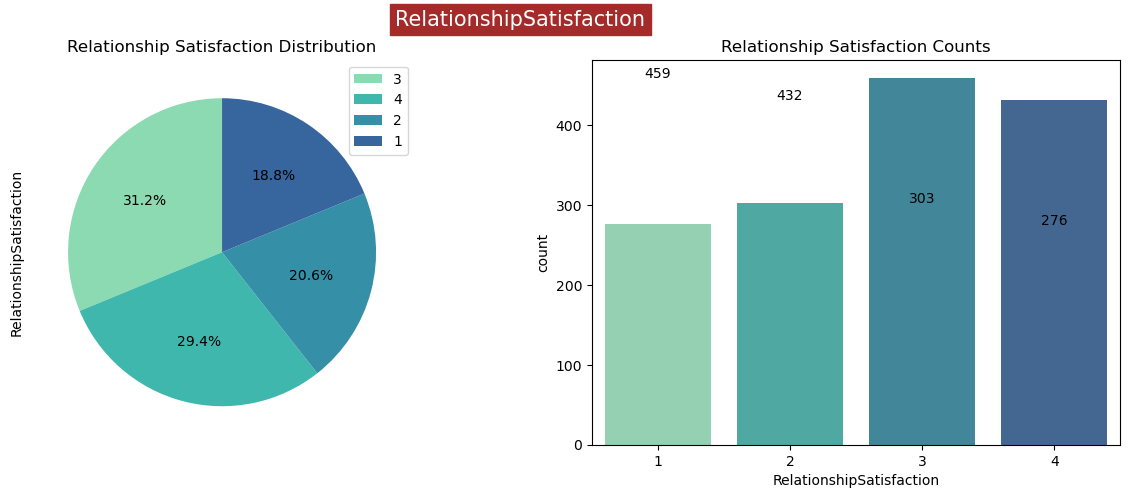

In [359]:
sns.set_palette("mako_r")
plt.figure(figsize=(15, 5))
# Create a pie chart for distribution
plt.subplot(1, 2, 1)
relationship_satisfaction_counts = df['RelationshipSatisfaction'].value_counts()
print(relationship_satisfaction_counts)
relationship_satisfaction_counts.plot.pie(autopct='%1.1f%%', labels=None, startangle=90)
plt.title('Relationship Satisfaction Distribution')
plt.legend(relationship_satisfaction_counts.index, loc='upper right')
plt.grid(False)
# Create a count plot for counts
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='RelationshipSatisfaction')
plt.title('Relationship Satisfaction Counts')
plt.grid(False)
# Display the count values on the count plot
for i, count in enumerate(relationship_satisfaction_counts):
    plt.text(i, count, str(count), ha='center')
plt.suptitle('RelationshipSatisfaction', fontsize=15, backgroundcolor='brown', color='white')
plt.show()

* The "Relationship Satisfaction" column is divided into four categories. Among these, category 3 holds the highest count, with 459 employees, constituting 31.2% of the total. In contrast, category 1 has the lowest count, with 276 employees, making up 18.8% of the workforce.

80    1470
Name: StandardHours, dtype: int64


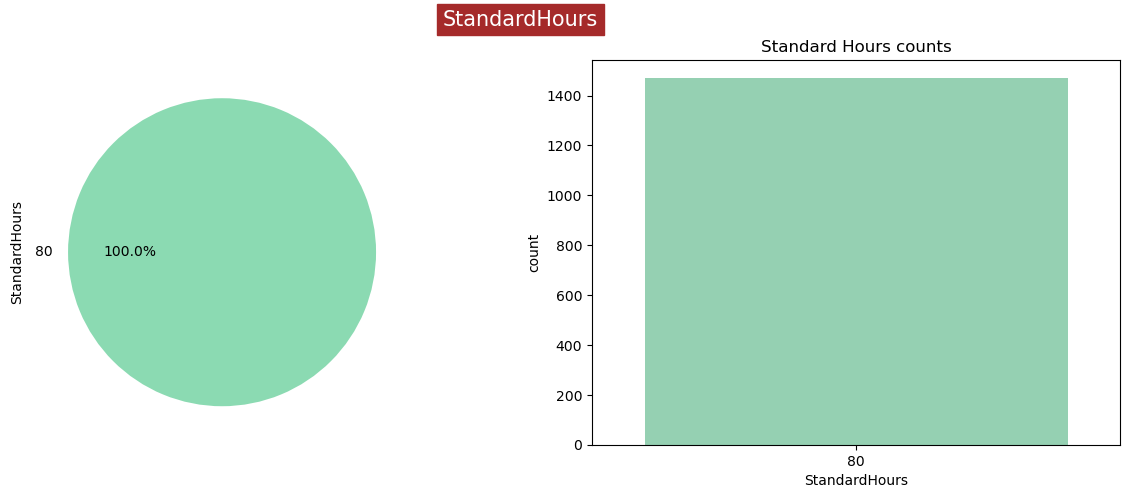

In [360]:
sns.set_palette("mako_r")
plt.figure(figsize=(15,5))
# Create a pie chart for distribution
plt.subplot(1,2,1)
df['StandardHours'].value_counts().plot(kind='pie' , autopct='%1.1f%%')
plt.grid(False)
# Create a count plot for counts
plt.subplot(1,2,2)
sns.countplot(data=df, x=df['StandardHours'])
print(df['StandardHours'].value_counts())
plt.title('Standard Hours counts')
plt.grid(False)
plt.suptitle('StandardHours', fontsize=15, backgroundcolor='brown', color='white')
plt.show()

* Since the "StandardHours" column contains only one category, it will be removed from the dataset before creating the model.

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64


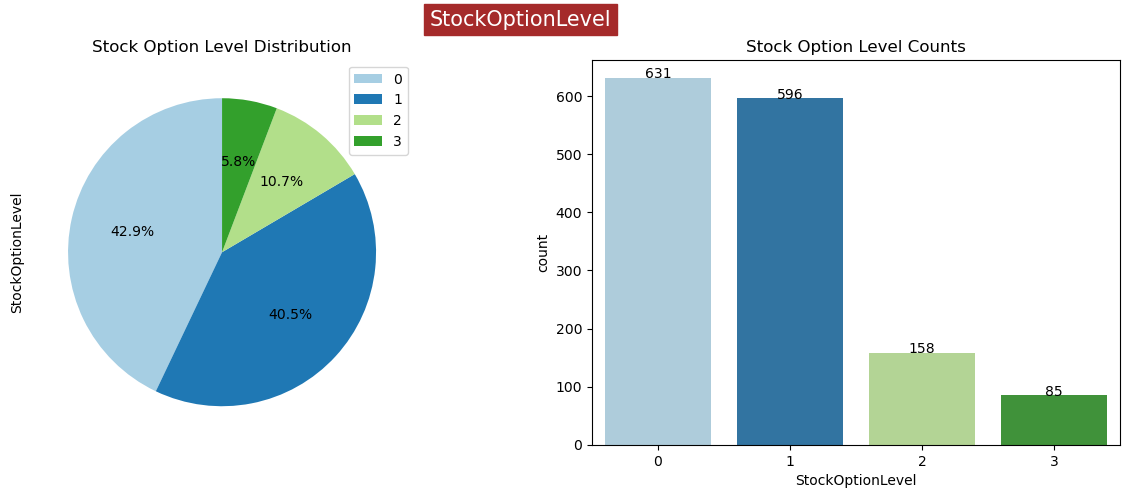

In [361]:
sns.set_palette("Paired")
plt.figure(figsize=(15, 5))

# Create a pie chart for distribution
plt.subplot(1, 2, 1)
stock_option_level_counts = df['StockOptionLevel'].value_counts()
print(stock_option_level_counts)
stock_option_level_counts.plot.pie(autopct='%1.1f%%', labels=None, startangle=90)
plt.title('Stock Option Level Distribution')
plt.legend(stock_option_level_counts.index, loc='upper right')
plt.grid(False)
# Create a count plot for counts
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='StockOptionLevel')
plt.title('Stock Option Level Counts')
plt.grid(False)
# Display the count values on the count plot
for i, count in enumerate(stock_option_level_counts):
    plt.text(i, count, str(count), ha='center')
plt.suptitle('StockOptionLevel', fontsize=15, backgroundcolor='brown', color='white')
plt.show()

* The "StockOptionLevel" column is categorized into four distinct groups. Among these, category 0 boasts the highest count, with 631 employees, representing 42.9% of the total. Conversely, category 3 has the lowest count, with only 85 employees, making up 5.8% of the workforce.

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64


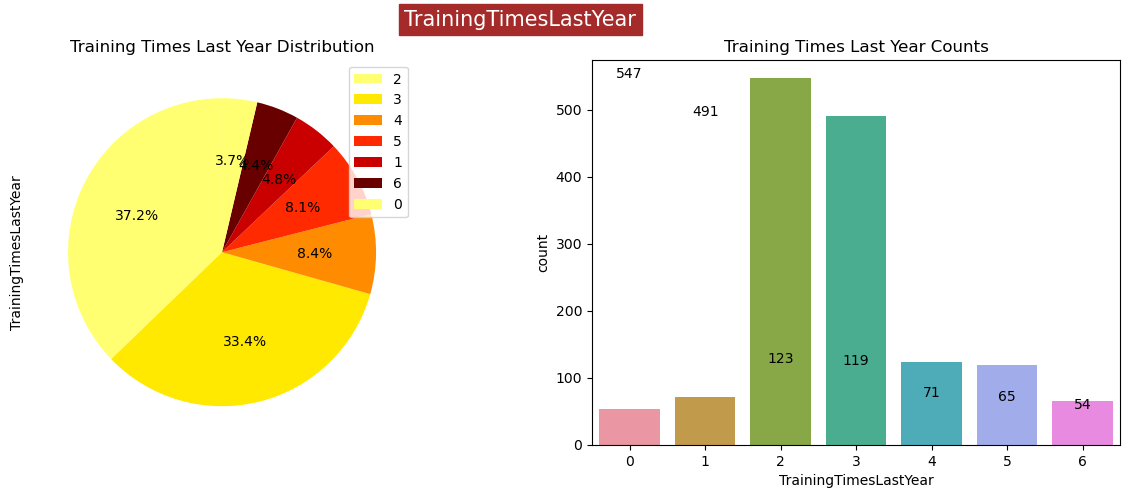

In [362]:
sns.set_palette("hot_r")
plt.figure(figsize=(15, 5))
# Create a pie chart for distribution
plt.subplot(1, 2, 1)
training_times_counts = df['TrainingTimesLastYear'].value_counts()
print(training_times_counts)
training_times_counts.plot.pie(autopct='%1.1f%%', labels=None, startangle=90)
plt.title('Training Times Last Year Distribution')
plt.legend(training_times_counts.index, loc='upper right')
plt.grid(False)
# Create a count plot for counts
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='TrainingTimesLastYear')
plt.title('Training Times Last Year Counts')
plt.grid(False)
# Display the count values on the count plot
for i, count in enumerate(training_times_counts):
    plt.text(i, count, str(count), ha='center')
plt.suptitle('TrainingTimesLastYear', fontsize=15, backgroundcolor='brown', color='white')
plt.show()

* The "TrainingTimesLastYear" column includes six distinct categories. Among these, category 2 has the highest count, with 547 employees, making up 37.2% of the total. In contrast, category 0 has the lowest count, with only 54 employees, representing 3.7% of the workforce.

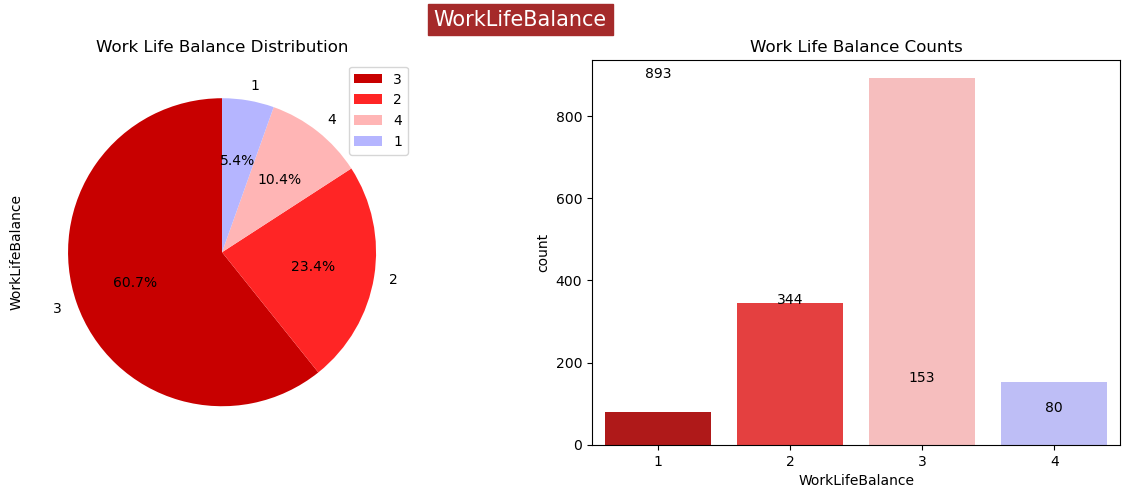

In [363]:
sns.set_palette("seismic_r")
# Create a figure with two subplots
plt.figure(figsize=(15, 5))
# Subplot 1: Pie chart for distribution
plt.subplot(1, 2, 1)
work_life_balance_counts = df['WorkLifeBalance'].value_counts()
work_life_balance_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Work Life Balance Distribution')
plt.legend(labels=work_life_balance_counts.index, loc='upper right')
plt.grid(False)
# Subplot 2: Count plot for counts
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='WorkLifeBalance')
plt.title('Work Life Balance Counts')
plt.grid(False)
# Display the count values on the count plot
for i, count in enumerate(work_life_balance_counts):
    plt.text(i, count, str(count), ha='center')
plt.suptitle('WorkLifeBalance', fontsize=15, backgroundcolor='brown', color='white')
plt.show()

* The "WorkLifeBalance" column is divided into four categories. Among these, category 3 has the highest count, with 893 employees, accounting for 60.7% of the total. In contrast, category 1 has the lowest count, with just 80 employees, making up 5.4% of the workforce.

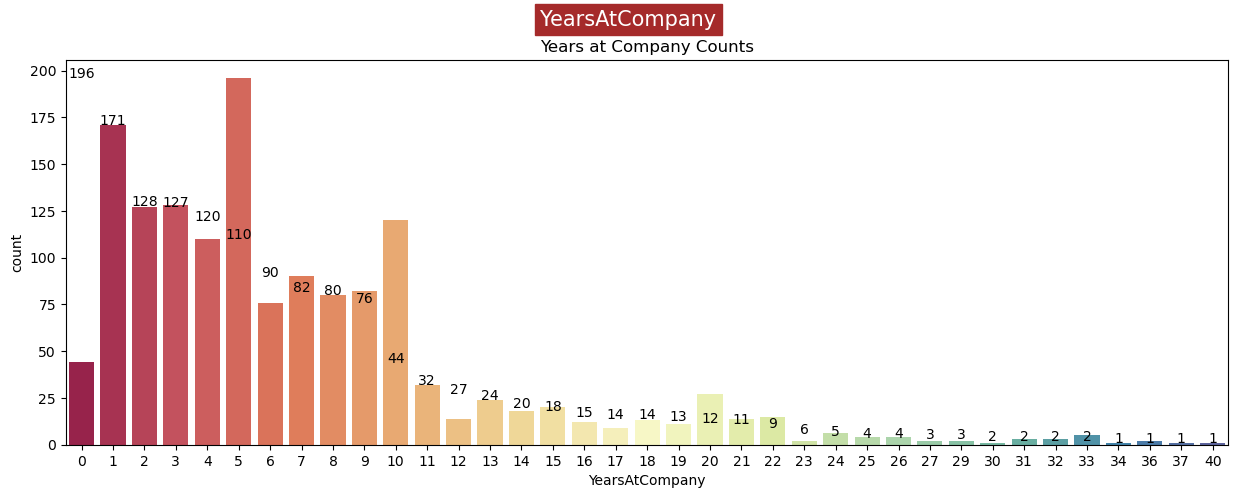

In [364]:
plt.figure(figsize=(15, 5))

sns.countplot(data=df, x='YearsAtCompany', palette='Spectral')
plt.title('Years at Company Counts')
plt.grid(False)
# Get the value counts and display them
years_at_company_counts = df['YearsAtCompany'].value_counts()
for i, count in enumerate(years_at_company_counts):
    plt.text(i, count, str(count), ha='center')
    
plt.suptitle('YearsAtCompany', fontsize=15, backgroundcolor='brown', color='white')
plt.show()

* Many employees have established several years of tenure with the company. The highest frequency, involving 196 employees, indicates that a significant number have been with the company for five years. However, there are 171 employees who have just one year of tenure, suggesting that fewer individuals have been with the company for an extended period.

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64


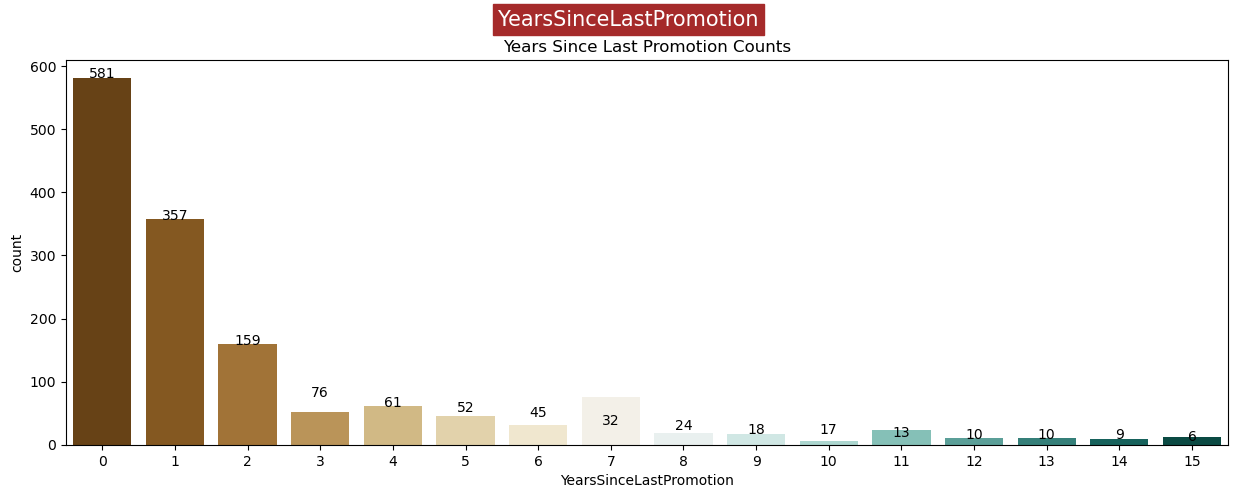

In [365]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x=df['YearsSinceLastPromotion'], palette='BrBG')
plt.title('Years Since Last Promotion Counts')
years_since_last_promotion = df['YearsSinceLastPromotion'].value_counts()
print(years_since_last_promotion)
plt.grid(False)
for i, count in enumerate(years_since_last_promotion):
    plt.text(i, count, str(count), ha='center')
plt.suptitle('YearsSinceLastPromotion', fontsize=15, backgroundcolor='brown', color='white')
plt.show()

* The largest count is observed among 581 employees who have not received a promotion within the past year.

2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: YearsInCurrentRole, dtype: int64


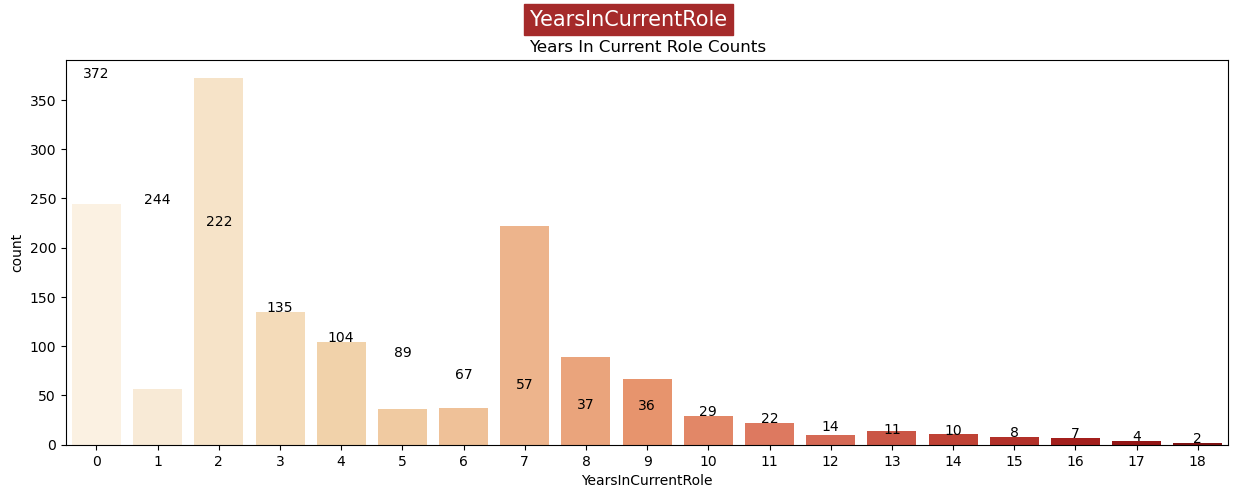

In [366]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x=df['YearsInCurrentRole'], palette='OrRd')
plt.title('Years In Current Role Counts')
years_in_current_role = df['YearsInCurrentRole'].value_counts()
print(years_in_current_role)
plt.grid(False)
for i, count in enumerate(years_in_current_role):
    plt.text(i, count, str(count), ha='center')
plt.suptitle('YearsInCurrentRole', fontsize=15, backgroundcolor='brown', color='white')
plt.show()

* The highest count, 372 employees, are currently in their roles for two years. Conversely, the lowest count consists of only two employees who have been in their roles for 18 years.

2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: YearsInCurrentRole, dtype: int64


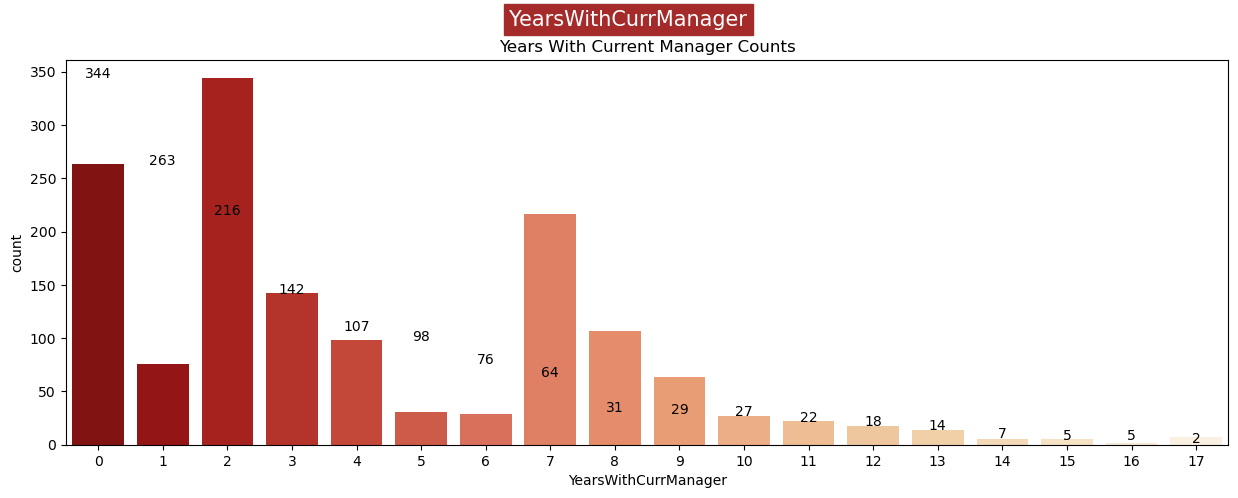

In [367]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x=df['YearsWithCurrManager'], palette='OrRd_r')
plt.title('Years With Current Manager Counts')
years_withcurr_manager = df['YearsWithCurrManager'].value_counts()
plt.grid(False)
print(years_in_current_role)
for i, count in enumerate(years_withcurr_manager):
    plt.text(i, count, str(count), ha='center')
plt.suptitle('YearsWithCurrManager', fontsize=15, backgroundcolor='brown', color='white')
plt.show()

* The largest count of employees, 344 in total, has been working with their current manager for a duration of 2 years.

Minimum: 18
Maximum: 60


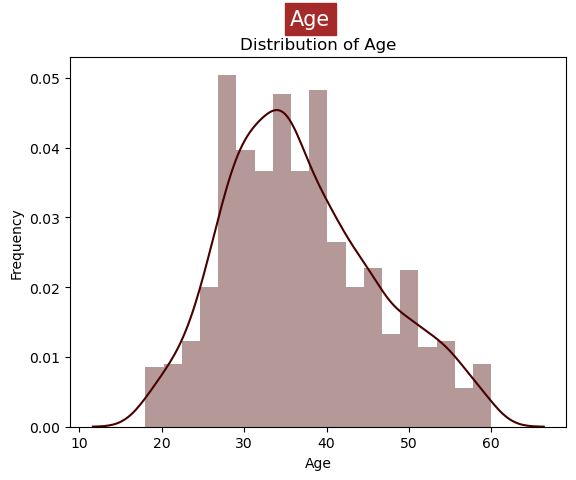

In [368]:
sns.set_palette("afmhot")
sns.distplot(df['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.grid(False)
# Calculate and display the minimum and maximum values
min_age = df['Age'].min()
max_age = df['Age'].max()
print('Minimum:', min_age)
print('Maximum:', max_age)
plt.suptitle('Age', fontsize=15, backgroundcolor='brown', color='white')
plt.show()

* The age range of employees at the company spans from a minimum of 18 years to a maximum of 60 years, with the average age falling within the range of 30 to 40 years.

Minimum: 11
Maximum: 25


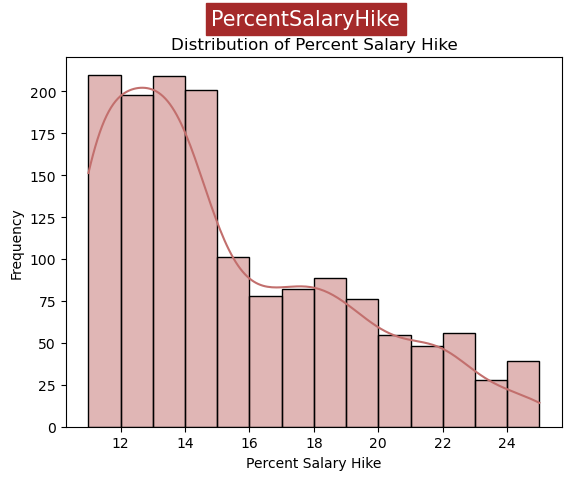

In [369]:
sns.set_palette("vlag_r")
percent_salary_hike = df['PercentSalaryHike']
sns.histplot(percent_salary_hike, kde=True)
plt.xlabel('Percent Salary Hike')
plt.ylabel('Frequency')
plt.title('Distribution of Percent Salary Hike')
plt.grid(False)
min_salary_hike = np.min(percent_salary_hike)
max_salary_hike = np.max(percent_salary_hike)
print('Minimum:', min_salary_hike)
print('Maximum:', max_salary_hike)
plt.suptitle('PercentSalaryHike', fontsize=15, backgroundcolor='brown', color='white')
plt.show()

* The salary hike percentages range from a minimum of 11% to a maximum of 25%. The data exhibits a slight right skew, and we will address this during the data cleaning process.

Minimum: 1009
Maximum: 19999


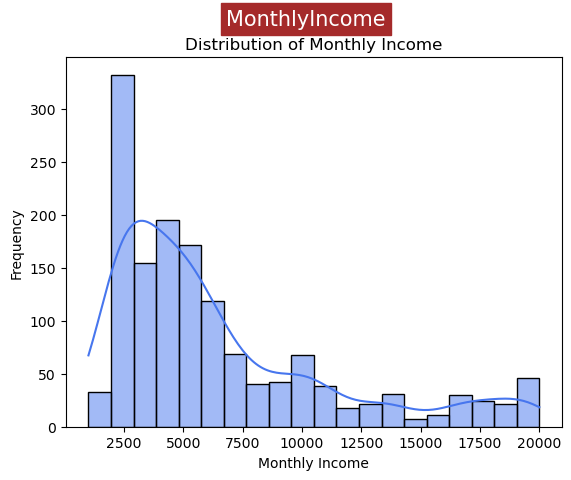

In [370]:
sns.set_palette("turbo")
sns.histplot(df['MonthlyIncome'], kde=True)
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Income')
plt.grid(False)
min_monthly_income = df['MonthlyIncome'].min()
max_monthly_income = df['MonthlyIncome'].max()
print('Minimum:', min_monthly_income)
print('Maximum:', max_monthly_income)
plt.suptitle('MonthlyIncome', fontsize=15, backgroundcolor='brown', color='white')
plt.show()

* The monthly income ranges from a minimum of 1009 to a maximum of 19999, with the data displaying a right-skewed distribution.

Minimum: 30
Maximum: 100


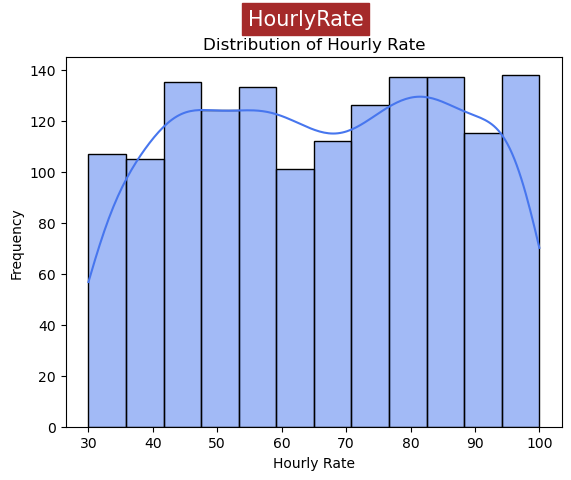

In [371]:
sns.histplot(df['HourlyRate'], kde=True, palette="tab20c_r")
plt.xlabel('Hourly Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Hourly Rate')
plt.grid(False)
min_hourly_rate = df['HourlyRate'].min()
max_hourly_rate = df['HourlyRate'].max()
print('Minimum:', min_hourly_rate)
print('Maximum:', max_hourly_rate)
plt.suptitle('HourlyRate', fontsize=15, backgroundcolor='brown', color='white')
plt.show()

* The lowest hourly rate is 30, while the highest hourly rate is 100.

Minimum: 2094
Maximum: 26999


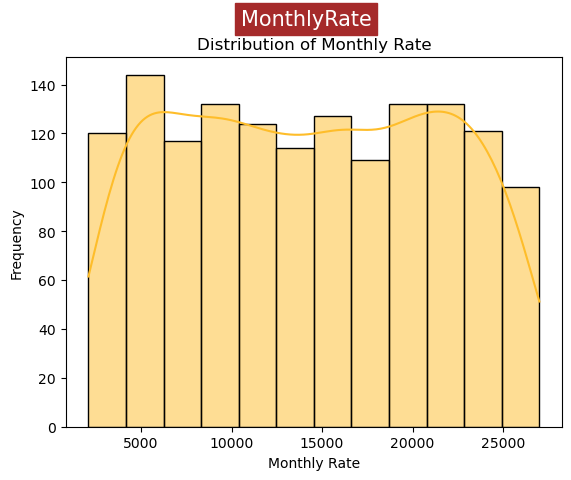

In [372]:
sns.set_palette("plasma_r")
sns.histplot(df['MonthlyRate'], kde=True)
plt.xlabel('Monthly Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Rate')
plt.grid(False)
# Calculate and display the minimum and maximum values
min_monthly_rate = df['MonthlyRate'].min()
max_monthly_rate = df['MonthlyRate'].max()
print('Minimum:', min_monthly_rate)
print('Maximum:', max_monthly_rate)
plt.suptitle('MonthlyRate', fontsize=15, backgroundcolor='brown', color='white')
plt.show()

Minimum: 0
Maximum: 40


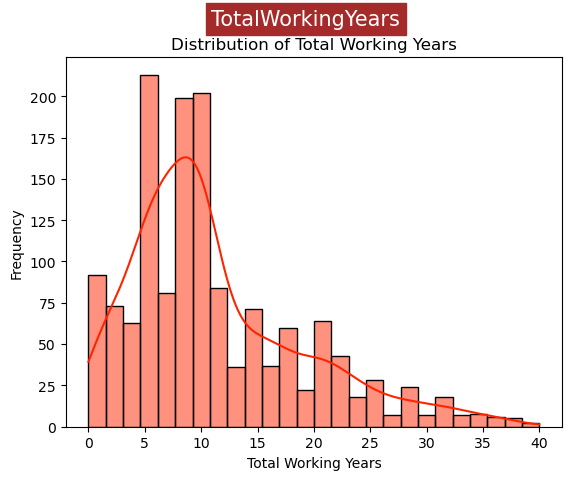

In [373]:
sns.set_palette("autumn")
sns.histplot(df['TotalWorkingYears'], kde=True)
plt.xlabel('Total Working Years')
plt.ylabel('Frequency')
plt.title('Distribution of Total Working Years')
plt.grid(False)
min_working_years = df['TotalWorkingYears'].min()
max_working_years = df['TotalWorkingYears'].max()
print('Minimum:', min_working_years)
print('Maximum:', max_working_years)
plt.suptitle('TotalWorkingYears', fontsize=15, backgroundcolor='brown', color='white')
plt.show()

* The highest total working years in the company is 40, while the minimum is 0, indicating the presence of freshers. The data shows a slight right skew.

<div style="background-color: #F6FDC3; padding: 10px; text-align: center; font-size: 20px;">
    <b style="text-align: center;">Bivariant Analysis</b>
</div>

In [374]:
for category in categorical_cols[1:]:
    # Group by the current categorical column and 'Attrition'
    counts_by_category = df.groupby([category, 'Attrition'])['Attrition'].count().unstack(fill_value=0)

    # Calculate the percentage of 'Attrition' for each category in the current column
    percentages_by_category = (counts_by_category.div(counts_by_category.sum(axis=1), axis=0) * 100).round(2)

    # Create a DataFrame to display the counts and percentages
    result_df = pd.concat([counts_by_category, percentages_by_category], axis=1, keys=['Count', 'Percentage'])

    # Print the results
    print(result_df)
    print('*' * 60)

                  Count      Percentage       
Attrition            No  Yes         No    Yes
BusinessTravel                                
Non-Travel          138   12      92.00   8.00
Travel_Frequently   208   69      75.09  24.91
Travel_Rarely       887  156      85.04  14.96
************************************************************
                       Count      Percentage       
Attrition                 No  Yes         No    Yes
Department                                         
Human Resources           51   12      80.95  19.05
Research & Development   828  133      86.16  13.84
Sales                    354   92      79.37  20.63
************************************************************
                 Count     Percentage       
Attrition           No Yes         No    Yes
EducationField                              
Human Resources     20   7      74.07  25.93
Life Sciences      517  89      85.31  14.69
Marketing          124  35      77.99  22.01
Medical       

In [375]:
for category in numerical_cols[:]:
    # Group by the current categorical column and 'Attrition'
    counts_by_category = df.groupby([category, 'Attrition'])['Attrition'].count().unstack(fill_value=0)

    # Calculate the percentage of 'Attrition' for each category in the current column
    percentages_by_category = (counts_by_category.div(counts_by_category.sum(axis=1), axis=0) * 100).round(2)

    # Create a DataFrame to display the counts and percentages
    result_df = pd.concat([counts_by_category, percentages_by_category], axis=1, keys=['Count', 'Percentage'])

    # Print the results
    print(result_df)
    print('*' * 60)

          Count     Percentage       
Attrition    No Yes         No    Yes
Age                                  
18            4   4      50.00  50.00
19            3   6      33.33  66.67
20            5   6      45.45  54.55
21            7   6      53.85  46.15
22           11   5      68.75  31.25
23           10   4      71.43  28.57
24           19   7      73.08  26.92
25           20   6      76.92  23.08
26           27  12      69.23  30.77
27           45   3      93.75   6.25
28           34  14      70.83  29.17
29           50  18      73.53  26.47
30           51   9      85.00  15.00
31           51  18      73.91  26.09
32           50  11      81.97  18.03
33           46  12      79.31  20.69
34           68   9      88.31  11.69
35           68  10      87.18  12.82
36           63   6      91.30   8.70
37           44   6      88.00  12.00
38           56   2      96.55   3.45
39           36   6      85.71  14.29
40           52   5      91.23   8.77
41          

**The above data details gives the overview of attrition distribution across categorical and numerical columns, presenting counts and percentages, aiding in workforce insights**

<div style="background-color: #F6FDC3; padding: 10px; text-align: center; font-size: 15px;">
    <b style="text-align: center;">To perform bivariate analysis, I made a copy of the DataFrame (df) and applied the map function to the 'Attrition' column</b>
</div>

In [376]:
#For doing the Bivariat analysis: I have used the map function in 'Attrition' column
import copy

# Create a deep copy of the original DataFrame
df_copy = copy.deepcopy(df)

In [377]:
df_copy['Attrition'] = df_copy['Attrition'].map({'Yes': 0, 'No': 1})
df_copy.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          0      Travel_Rarely       1102                   Sales   
1   49          1  Travel_Frequently        279  Research & Development   
2   37          0      Travel_Rarely       1373  Research & Development   
3   33          1  Travel_Frequently       1392  Research & Development   
4   27          1      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

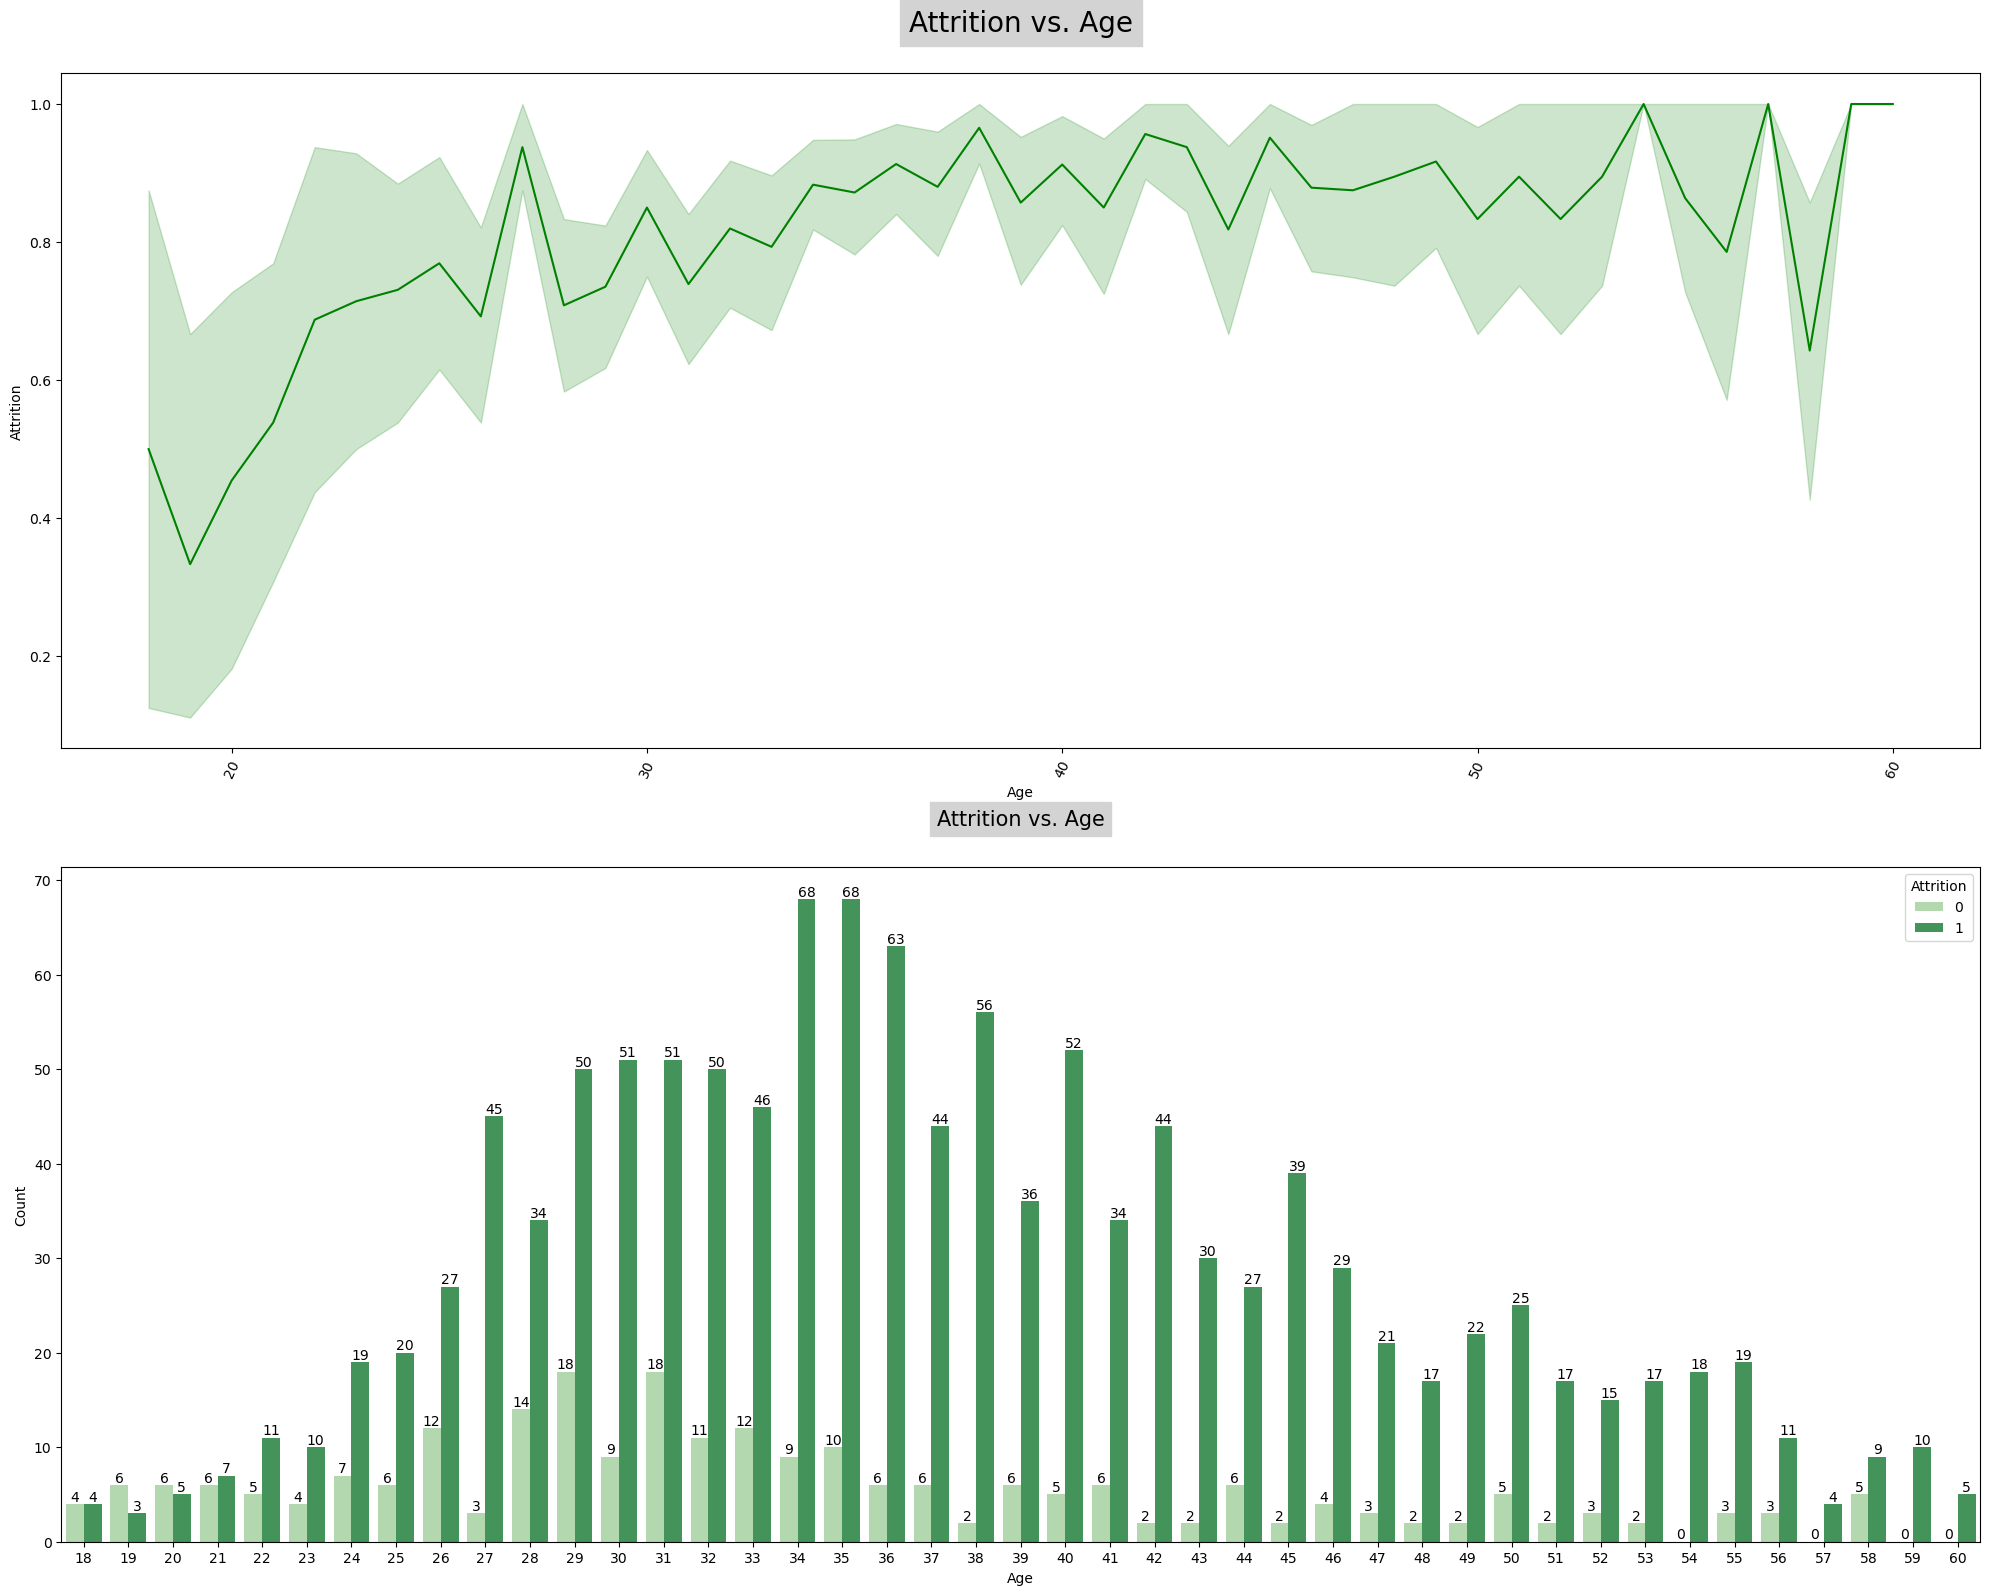

In [378]:
plt.figure(figsize=(20, 16))
plt.subplot(2, 1, 1)
sns.lineplot(x='Age', y='Attrition', data=df_copy, color='g')
plt.xlabel('Age')
plt.ylabel('Attrition')  # This line has been corrected
plt.xticks(rotation=65)
plt.title('Attrition vs. Age', backgroundcolor='lightgray', y=1.05, fontsize=20)
plt.grid(False)

plt.subplot(2, 1, 2)
ax = sns.countplot(x='Age', hue='Attrition', data=df_copy, palette='Greens')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Attrition vs. Age', backgroundcolor='lightgray', y=1.05, fontsize=15)
plt.grid(False)

for i in ax.patches:
    ax.annotate(f'{i.get_height():.0f}', (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**The graph above depicts the attrition of employees across different age groups, with the highest frequency observed within the 18-33 age range.**

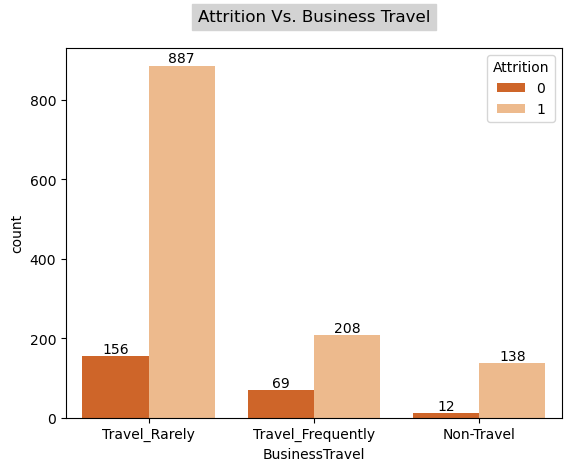

In [379]:
# Attrition Count by Bussiness Travelling
ax=sns.countplot(x=df_copy['BusinessTravel'], hue=df_copy.Attrition, data=df_copy, palette="Oranges_r")
plt.grid(False)

for i in ax.containers:
    ax.bar_label(i)
plt.title('Attrition Vs. Business Travel', backgroundcolor='lightgray', y=1.05)
plt.show()

* Most employees in the company do not travel much, with 1043 in this group. But it is important to mention that attrition is higher in this category, with 156 employees leaving the company.

* Employees who travel frequently exhibit a higher tendency for attrition compared to employees who travel rarely or those who do not travel.

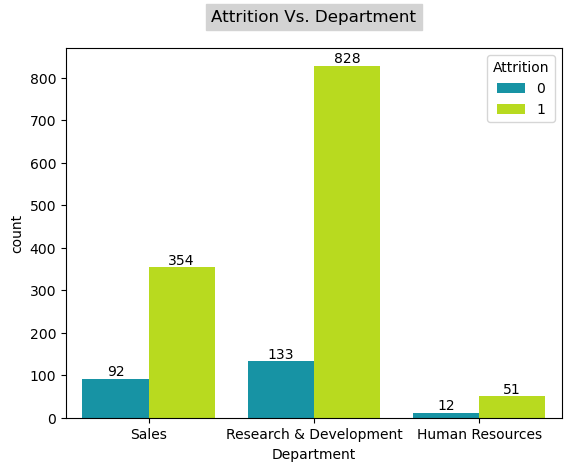

In [380]:
# Attrition count by Department
ax = sns.countplot(data=df_copy, x='Department', hue='Attrition', palette="nipy_spectral" )
ax.set_xlabel("Department")
plt.grid(False)

ax.set_title("Attrition Vs. Department", backgroundcolor='lightgray', y=1.05)
for i in ax.containers:
    ax.bar_label(i)

* The Research and Development department holds the largest number of employees in the organization, with a total of 961 staff members. In comparison, the Sales department employs 446 individuals, while the HR department has a smaller workforce with just 63 employees. Additionally, it's essential to highlight that the Research & Development department has the highest attrition count, with 133 employees departing from the company.

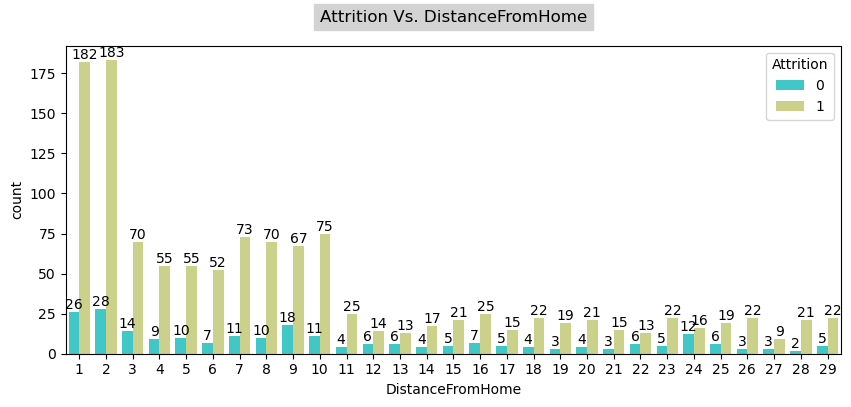

In [381]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(x='DistanceFromHome', hue='Attrition', data=df_copy, palette="rainbow" )
plt.title('Attrition Vs. DistanceFromHome', backgroundcolor='lightgray', y=1.05)
plt.grid(False)

for i in ax.containers:
    ax.bar_label(i)
plt.show()

* The relationship between distance from home and attrition appears to be somewhat mixed.

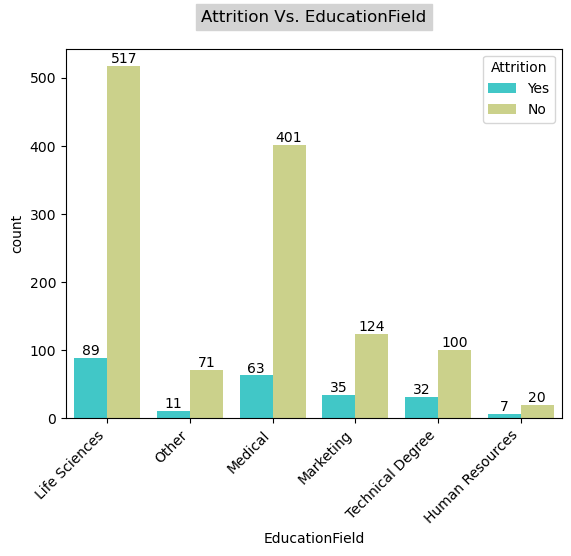

In [382]:
# Attrition count by Edducation field
ax = sns.countplot(x=df['EducationField'], hue=df.Attrition, data=df, palette="rainbow")
plt.xticks(rotation=45, ha='right')  
plt.grid(False)

for i in ax.containers:
    ax.bar_label(i)
plt.title('Attrition Vs. EducationField', backgroundcolor='lightgray', y=1.05)
plt.show()

* The maximum attrition has happend in Life Sciences and followed by Medical fields.

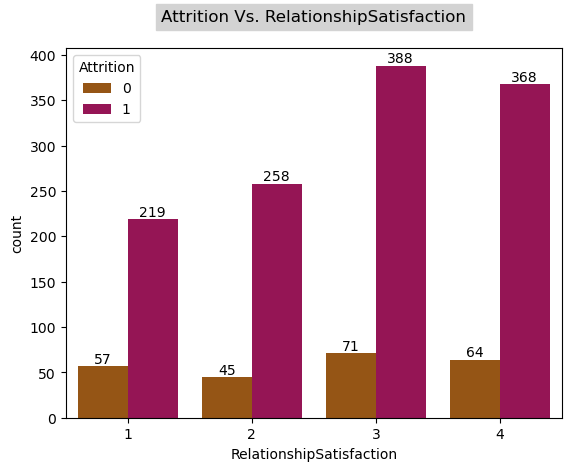

In [383]:
# Attrition by RelationshipSatisfaction
ax = sns.countplot(x=df_copy['RelationshipSatisfaction'], hue=df_copy.Attrition, data=df_copy, palette="brg_r")  
plt.grid(False)

for i in ax.containers:
    ax.bar_label(i)
plt.title('Attrition Vs. RelationshipSatisfaction', backgroundcolor='lightgray', y=1.05)
plt.show()

* Employee attrition does not seem to be significantly influenced by the level of relationship satisfaction in the organization.

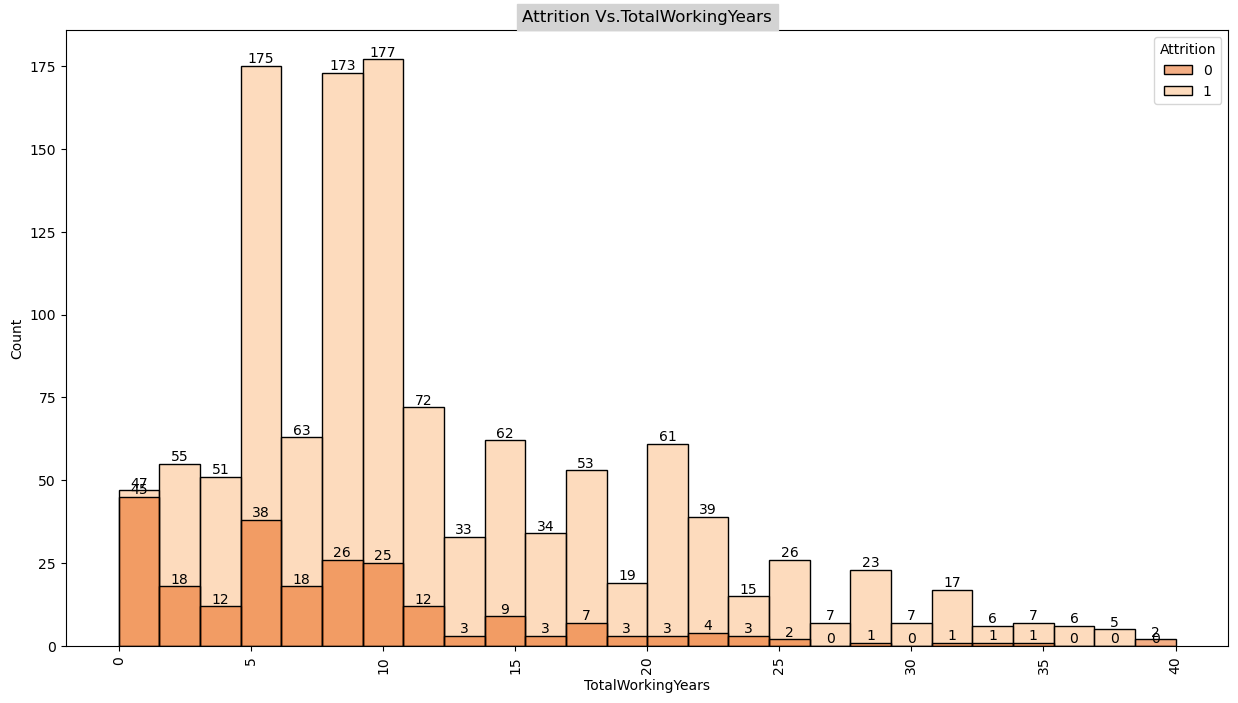

In [384]:
# Attrition by TotalWorkingYears
plt.figure(figsize=(15,8))
ax=sns.histplot(x=df_copy['TotalWorkingYears'],hue=df_copy.Attrition,data=df_copy, palette='Oranges_r')
plt.xticks(rotation='vertical')
plt.grid(False)

for i in ax.containers:
    ax.bar_label(i)
plt.title('Attrition Vs.TotalWorkingYears', backgroundcolor='lightgray')

plt.show()

* Employees with 1 to 10 years of experience tend to have a higher attrition rate.

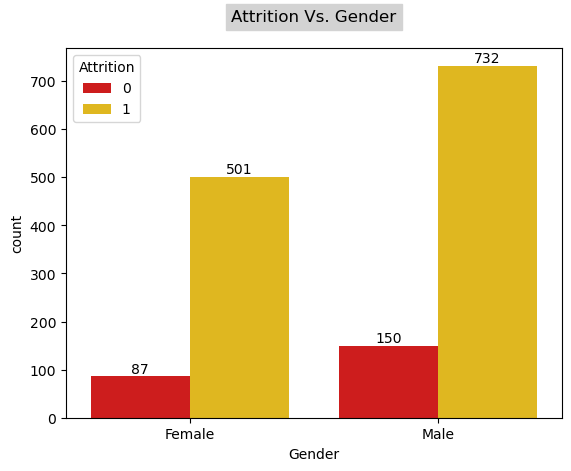

In [385]:
# Attrition by Gender
ax=sns.countplot(x='Gender', hue='Attrition', data=df_copy, palette='hot')
plt.title('Attrition Vs. Gender', backgroundcolor='lightgray', y=1.05)
plt.grid(False)

for i in ax.containers:
    ax.bar_label(i)
plt.show()

* Male employees are little more likely to do Attrition than Female employees.

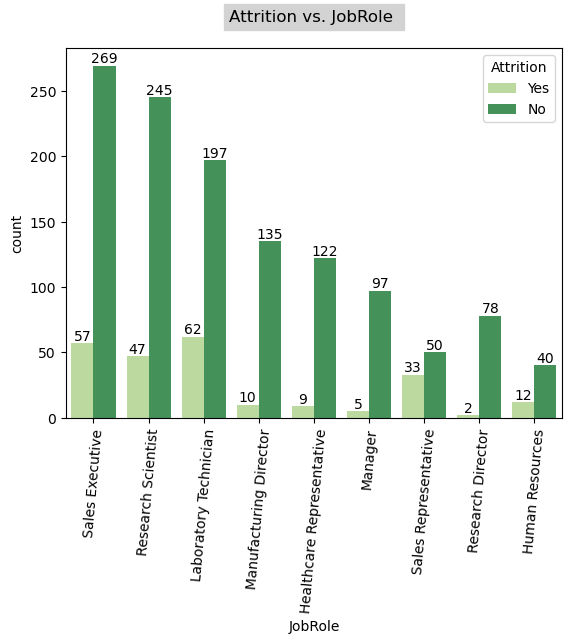

In [386]:
# Attrition by JobRole
ax=sns.countplot(x='JobRole', hue='Attrition', data=df, palette='YlGn')
plt.title('Attrition vs. JobRole ', backgroundcolor='lightgray', y=1.05)
plt.grid(False)

plt.xticks(rotation=85)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

* Laboraratory and Sales Executive are more likely to change or quit the job than other employees with other jobrole .

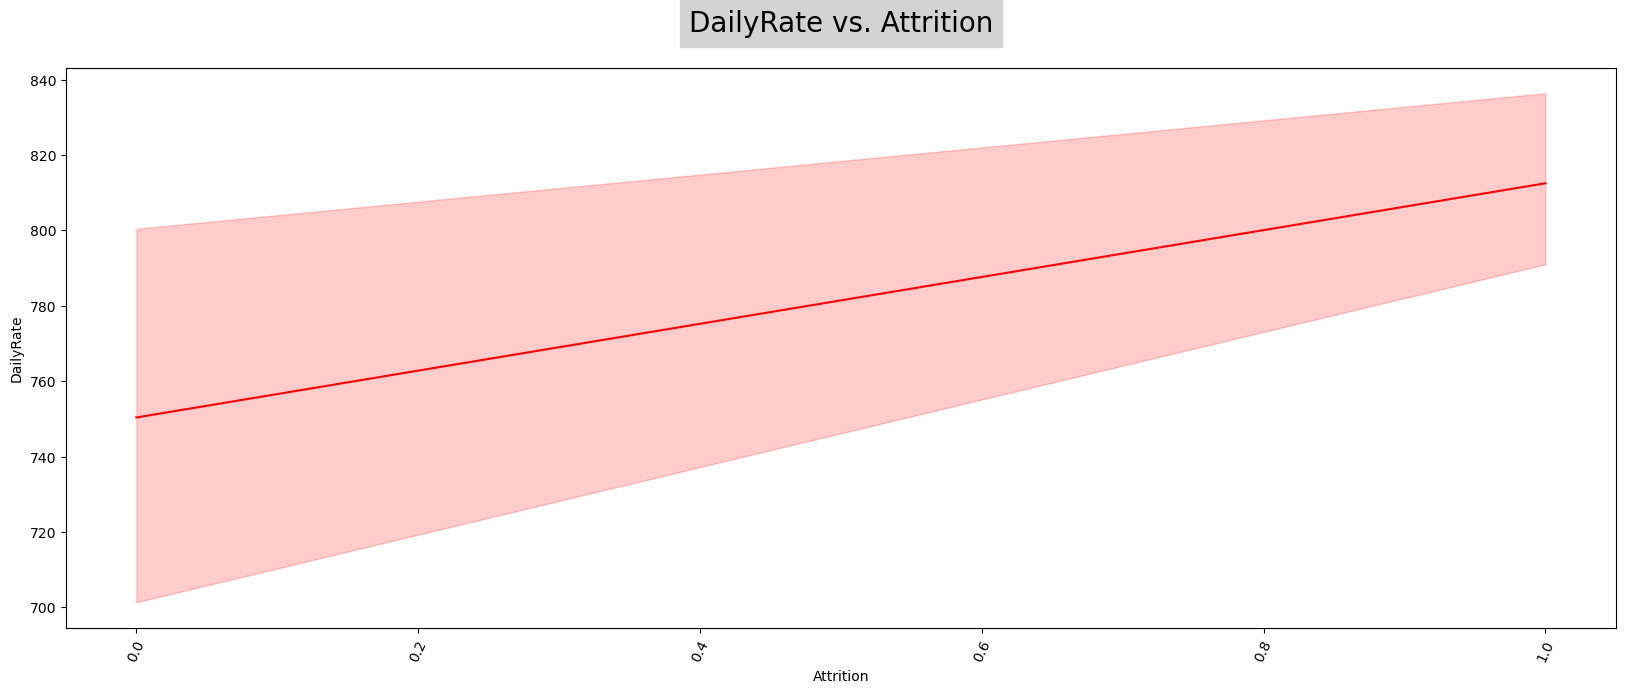

In [387]:
plt.figure(figsize=(20, 16))
plt.subplot(2, 1, 1)
sns.lineplot(x='Attrition', y='DailyRate', data=df_copy, color='r')
plt.xlabel('Attrition')
plt.ylabel('DailyRate')  # This line has been corrected
plt.xticks(rotation=65)
plt.title('DailyRate vs. Attrition', backgroundcolor='lightgray', y=1.05, fontsize=20)
plt.grid(False)


* DailyRate increase then impact on attrition are vice versa.

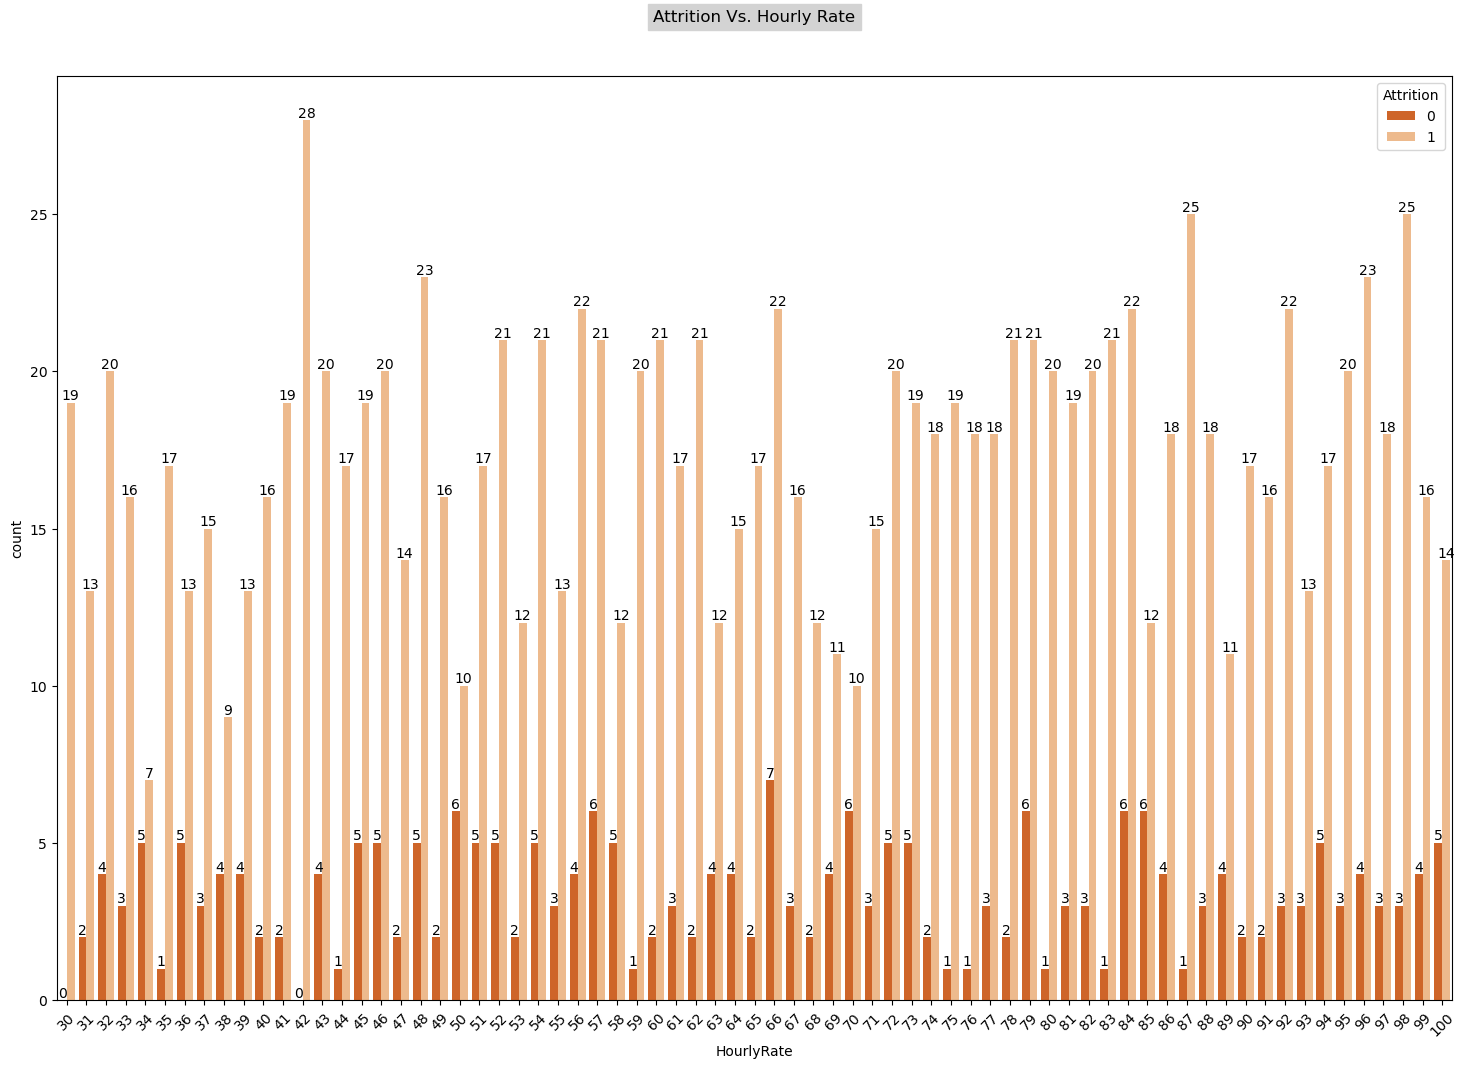

In [388]:
plt.figure(figsize=(18,12))
ax = sns.countplot(x='HourlyRate', hue='Attrition', data=df_copy, palette='Oranges_r')
plt.grid(False)
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Attrition Vs. Hourly Rate', backgroundcolor='lightgray', y=1.05)
plt.show()

* Hourly rate has no significant impact on attrition.

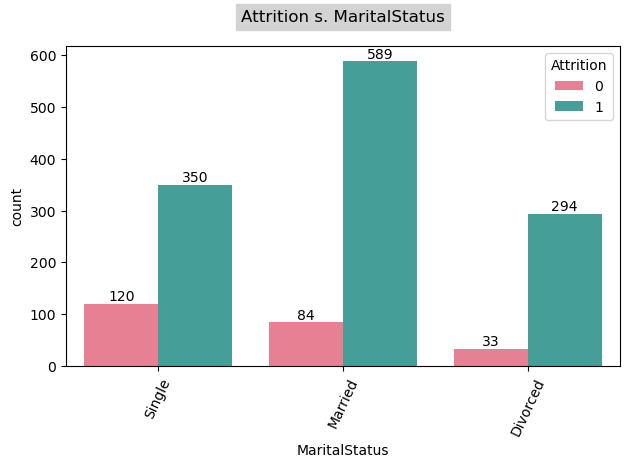

In [389]:
# Attrition by MaritalStatus
ax=sns.countplot(x='MaritalStatus', hue='Attrition', data=df_copy, palette='husl')
plt.title('Attrition s. MaritalStatus', backgroundcolor='lightgray', y=1.05)
plt.xticks(rotation=65)
plt.grid(False)

for i in ax.containers:
    ax.bar_label(i)
plt.tight_layout()
plt.show()

* Single people are more likely to leave a job than married or divorced people.

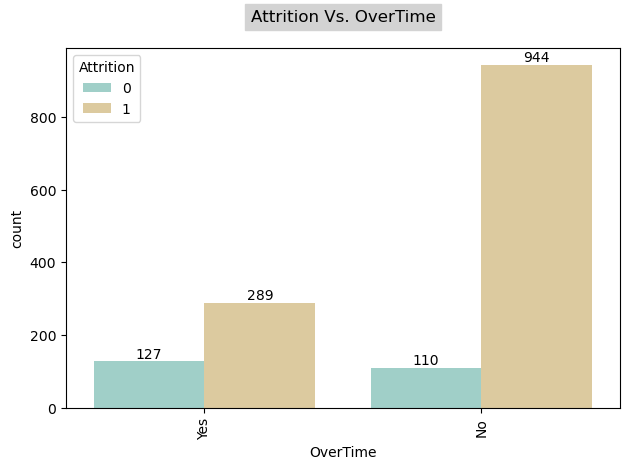

In [390]:
# Attrition by OverTime
ax= sns.countplot(x='OverTime', hue='Attrition', data=df_copy, palette='BrBG_r')
ax.set_title('Attrition Vs. OverTime', backgroundcolor='lightgray', y=1.05)
plt.xticks(rotation=90)
plt.grid(False)

for i in ax.containers:
    ax.bar_label(i)
plt.tight_layout()
plt.show()

* Employees who do frequent overtimes are more likely to leave the company.

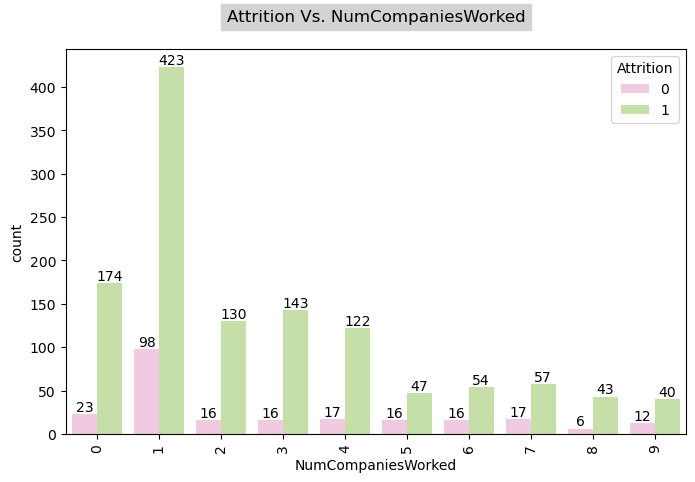

In [391]:
# Attrition by NumCompaniesWorked
plt.figure(figsize=(8, 5))
ax=sns.countplot(x='NumCompaniesWorked', hue='Attrition', data=df_copy, palette='PiYG')
plt.title('Attrition Vs. NumCompaniesWorked', backgroundcolor='lightgray', y=1.05)
plt.xticks(rotation=90)
plt.grid(False)

for i in ax.containers:
    ax.bar_label(i)
plt.show()

* People who have worked for more companies are more likely to leave the current company as well.

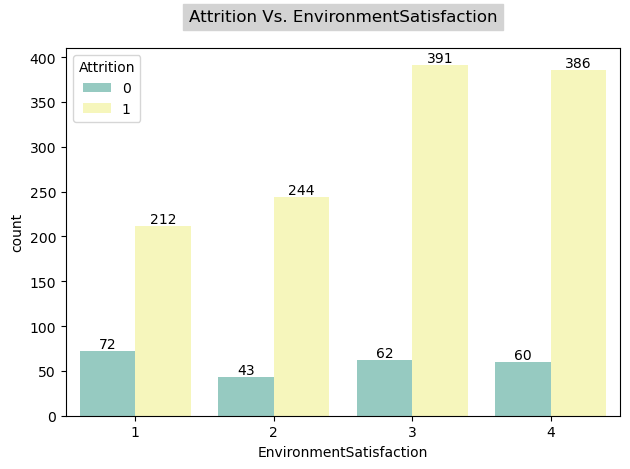

In [392]:
# Attrition by EnvironmentSatisfaction
ax=sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df_copy, palette='Set3')
plt.title('Attrition Vs. EnvironmentSatisfaction', backgroundcolor='lightgray', y=1.05)
plt.grid(False)

for i in ax.containers:
    ax.bar_label(i)
plt.tight_layout()
plt.show()

* People who have least Environment Satisfaction (category 1, 2 and 3) more likely to leave the job.

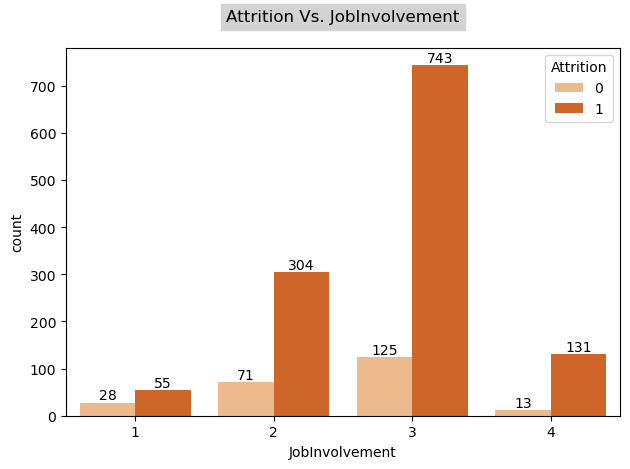

In [393]:
# Attrition by JobInvolvement
ax=sns.countplot(x='JobInvolvement', hue='Attrition', data=df_copy, palette='Oranges')
plt.title('Attrition Vs. JobInvolvement', backgroundcolor='lightgray', y=1.05)
plt.grid(False)

for i in ax.containers:
    ax.bar_label(i)
plt.tight_layout()
plt.show()

* People who have least Job level (category 1) more likely to leave the company.

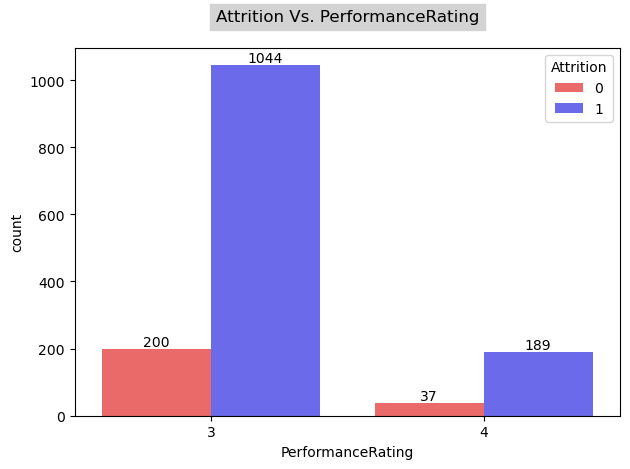

In [394]:
# Attrition by JobInvolvement
ax=sns.countplot(x='PerformanceRating', hue='Attrition', data=df_copy, palette='seismic_r')
plt.title('Attrition Vs. PerformanceRating', backgroundcolor='lightgray', y=1.05)
plt.grid(False)

for i in ax.containers:
    ax.bar_label(i)
plt.tight_layout()
plt.show()

* People maybe do not leave job for Performance rating.

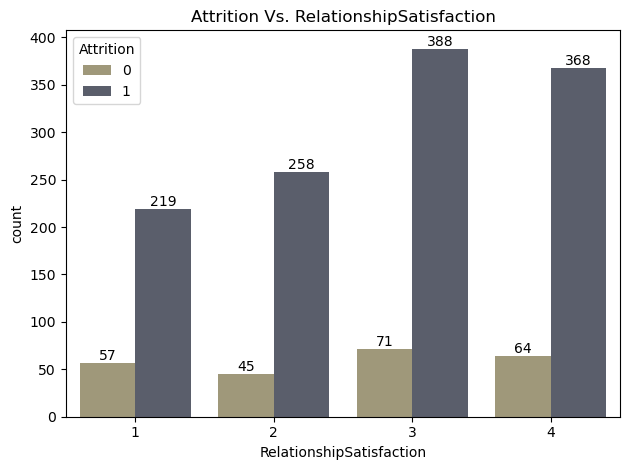

In [395]:
# Attrition by RelationshipSatisfaction
ax=sns.countplot(x='RelationshipSatisfaction', hue='Attrition', data=df_copy, palette='cividis_r')
plt.title('Attrition Vs. RelationshipSatisfaction' )
plt.grid(False)

for i in ax.containers:
    ax.bar_label(i)
plt.tight_layout()
plt.show()

* People who have least Relationship Satisfaction (category 1) more likely to leave the company.

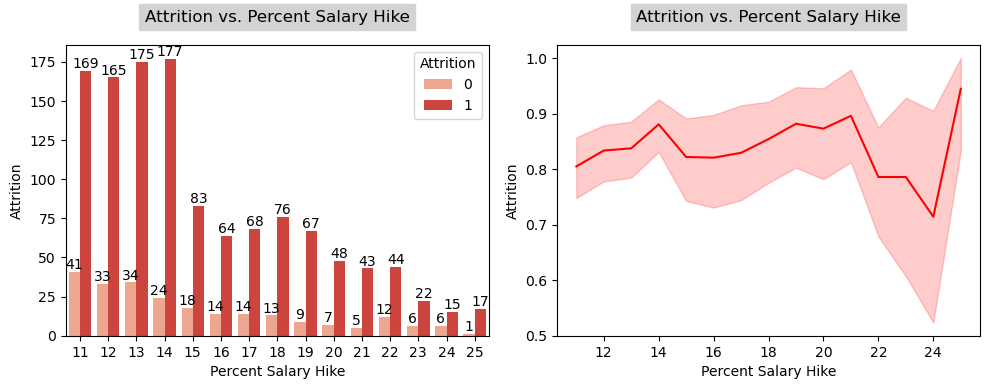

In [396]:
# Attrition by PercentSalaryHike
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
ax = sns.countplot(x='PercentSalaryHike', hue='Attrition', data=df_copy, palette='Reds')
plt.xlabel('Percent Salary Hike')
plt.ylabel('Attrition')
plt.title('Attrition vs. Percent Salary Hike', backgroundcolor='lightgray', y=1.05)
plt.grid(False)

for i in ax.containers:
    ax.bar_label(i)

# Create the line plot
plt.subplot(1, 2, 2)
sns.lineplot(x='PercentSalaryHike', y='Attrition', data=df_copy, color='r')
plt.xlabel('Percent Salary Hike')
plt.ylabel('Attrition')
plt.title('Attrition vs. Percent Salary Hike', backgroundcolor='lightgray', y=1.05)
plt.grid(False)


plt.tight_layout()
plt.show()

* People with 24% Percent Salary Hike is more likely to leave the Company.

<div style="background-color: #F6FDC3; padding: 10px; text-align: center; font-size: 20px;">
    <b style="text-align: center;">Multivariate Analysis</b>
</div>

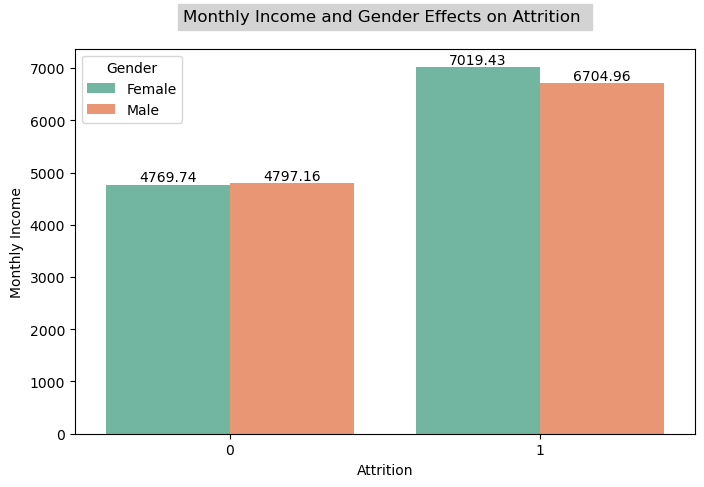

In [397]:
plt.figure(figsize=(8, 5))
ax=sns.barplot(x='Attrition', y='MonthlyIncome', hue='Gender', data=df_copy, palette='Set2', errorbar=None)
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.title('Monthly Income and Gender Effects on Attrition ', backgroundcolor='lightgray', y=1.05)
plt.grid(False)

for i in ax.containers:
    ax.bar_label(i)
plt.show()

* Female employees of Human Resources Department are more likely to leave the company than other employees of other departments and than male employees of same department.

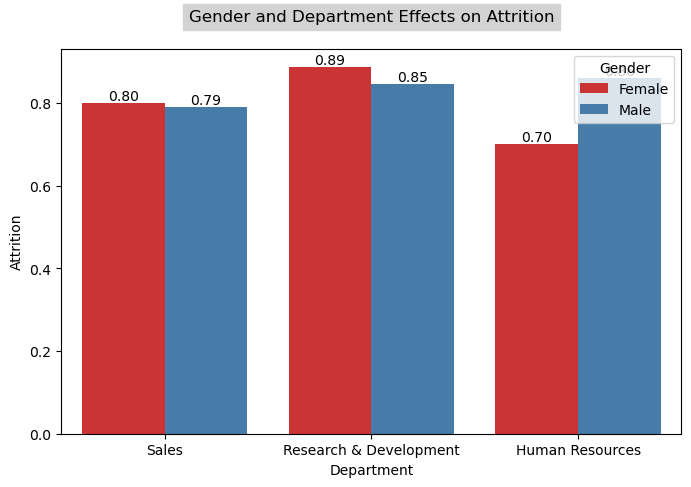

In [398]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Department', y='Attrition', hue='Gender', data=df_copy, palette='Set1', ci=None)
plt.title('Gender and Department Effects on Attrition', backgroundcolor='lightgray', y=1.05)
plt.grid(False)

for i in ax.patches:
    ax.annotate(f'{i.get_height():.2f}', (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')
plt.show()

* Female employees of Human Resources Department are more likely to leave the company than other employees of other departments and than male employees of same department.

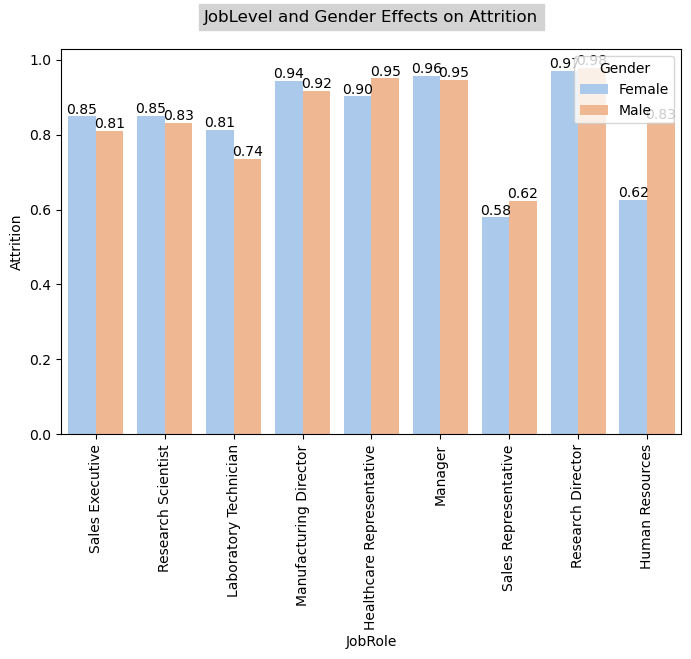

In [399]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='JobRole', y='Attrition', hue='Gender', data=df_copy, palette='pastel', ci=None)
plt.title('JobLevel and Gender Effects on Attrition', backgroundcolor='lightgray', y=1.05)
plt.grid(False)
plt.xticks(rotation=90)
for i in ax.patches:
    ax.annotate(f'{i.get_height():.2f}', (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')
plt.show()

* Female employees of HSales Representataive Positions are more likely to leave the company than other employees of other Positions and than male employees of same department.

<div style="background-color: #F6FDC3; padding: 10px; text-align: center; font-size: 20px;">
    <b style="text-align: center;">Outlier Detection</b>
</div>

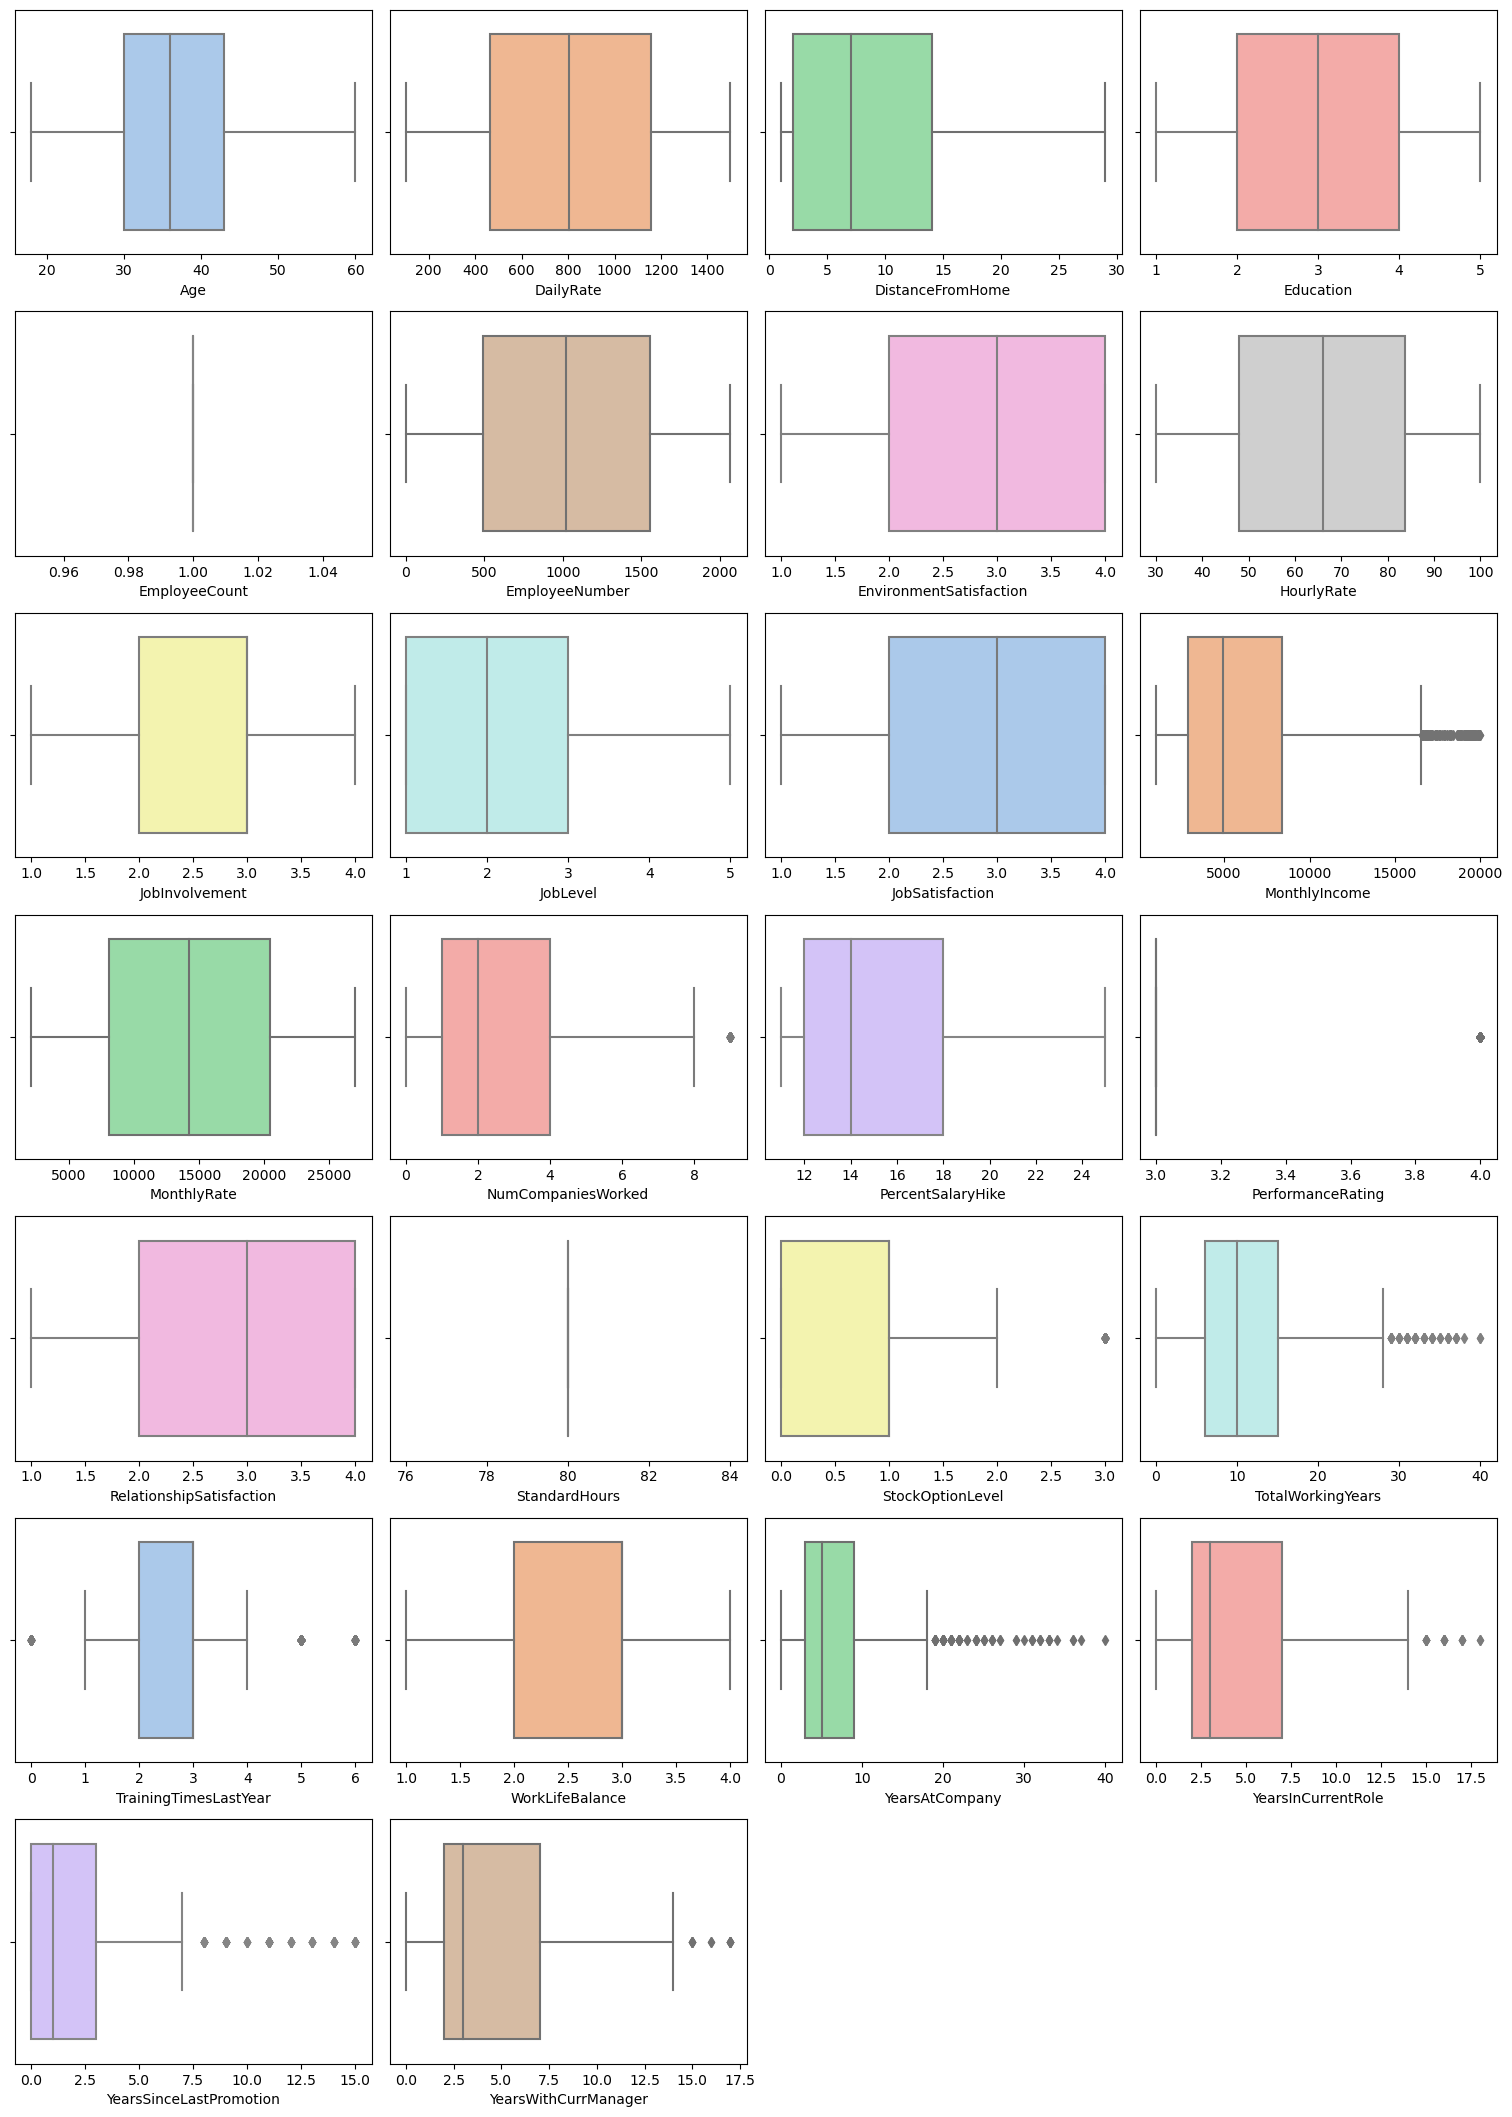

In [400]:
num_cols = len(numerical_cols)
num_rows = (num_cols // 4) + (num_cols % 4 > 0)

fig, ax = plt.subplots(ncols=4, nrows=num_rows, figsize=(15, 3 * num_rows))
ax = ax.flatten()

pastel_palette = sns.color_palette('pastel')

for i, col in enumerate(numerical_cols):
    color_idx = i % len(pastel_palette)  # Ensure we don't go out of bounds
    sns.boxplot(x=df[col], ax=ax[i], palette=[pastel_palette[color_idx]])

# If there are remaining subplots, remove them
for j in range(num_cols, 4 * num_rows):
    fig.delaxes(ax[j])

plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

**While reviewing the graphs, we have observed that specific features may potentially include outliers. To conclusively confirm the existence of outliers, we will proceed with a more thorough and exhaustive analysis**

* There are no outliers observed in the graphs from Age to JobSatisfaction. Therefore, we will skip those columns and proceed with an in-depth analysis, beginning with MonthlyIncome.

**MonthlyIncome:** It is important to note that certain roles with higher ranks may naturally command significantly higher incomes, which could explain why these data points do not appear as outliers.

**NumCompaniesWorked:** When an individual initiates their career with less prominent positions at a young age, it is reasonable to anticipate frequent job changes.

**NumCompaniesWorked** , **PerformanceRating** and **StockOptionLevel** Max values are consider as outliers. Also in **TrainingTimesLastYear** Minmum amd maximums value has consider as outlier and these are not potential outliers.

**TotalWorkingYears:** If an individual commenced their professional journey at 18 and has maintained a consistent work history until the age of 58, accruing 18 years of experience, such a scenario would not be indicative of an outlier.

**YearsAtCompany**, **YearsInCurrentRole**, **YearsSinceLastPromotion** and **YearsWithCurrManager** : These columns display values that align with realistic career data. Consequently, they can vary significantly from person to person, making them unsuitable candidates for potential outliers.



<div style="background-color: #F6FDC3; padding: 10px; text-align: center; font-size: 20px;">
    <b style="text-align: center;">Summary of Outliers in the Dataset</b>
</div>

**Upon thorough analysis, it is apparent that there are no substantial outliers to be found in the dataset. The data points for the examined features fall within expected ranges, signifying a lack of significant anomalies.**

<div style="background-color: #F6FDC3; padding: 10px; text-align: center; font-size: 20px;">
    <b style="text-align: center;">Optimizing Data: Removing Unnecessary Columns</b>
</div>

In [401]:
#Checking teh correlationwith target variables using copy dataframe
correlations=df_copy.corr()['Attrition'].sort_values(ascending=False)
correlations

Attrition                   1.000000
TotalWorkingYears           0.171063
JobLevel                    0.169105
YearsInCurrentRole          0.160545
MonthlyIncome               0.159840
Age                         0.159205
YearsWithCurrManager        0.156199
StockOptionLevel            0.137145
YearsAtCompany              0.134392
JobInvolvement              0.130016
JobSatisfaction             0.103481
EnvironmentSatisfaction     0.103369
WorkLifeBalance             0.063939
TrainingTimesLastYear       0.059478
DailyRate                   0.056652
RelationshipSatisfaction    0.045872
YearsSinceLastPromotion     0.033019
Education                   0.031373
PercentSalaryHike           0.013478
EmployeeNumber              0.010577
HourlyRate                  0.006846
PerformanceRating          -0.002889
MonthlyRate                -0.015170
NumCompaniesWorked         -0.043494
DistanceFromHome           -0.077924
EmployeeCount                    NaN
StandardHours                    NaN
N

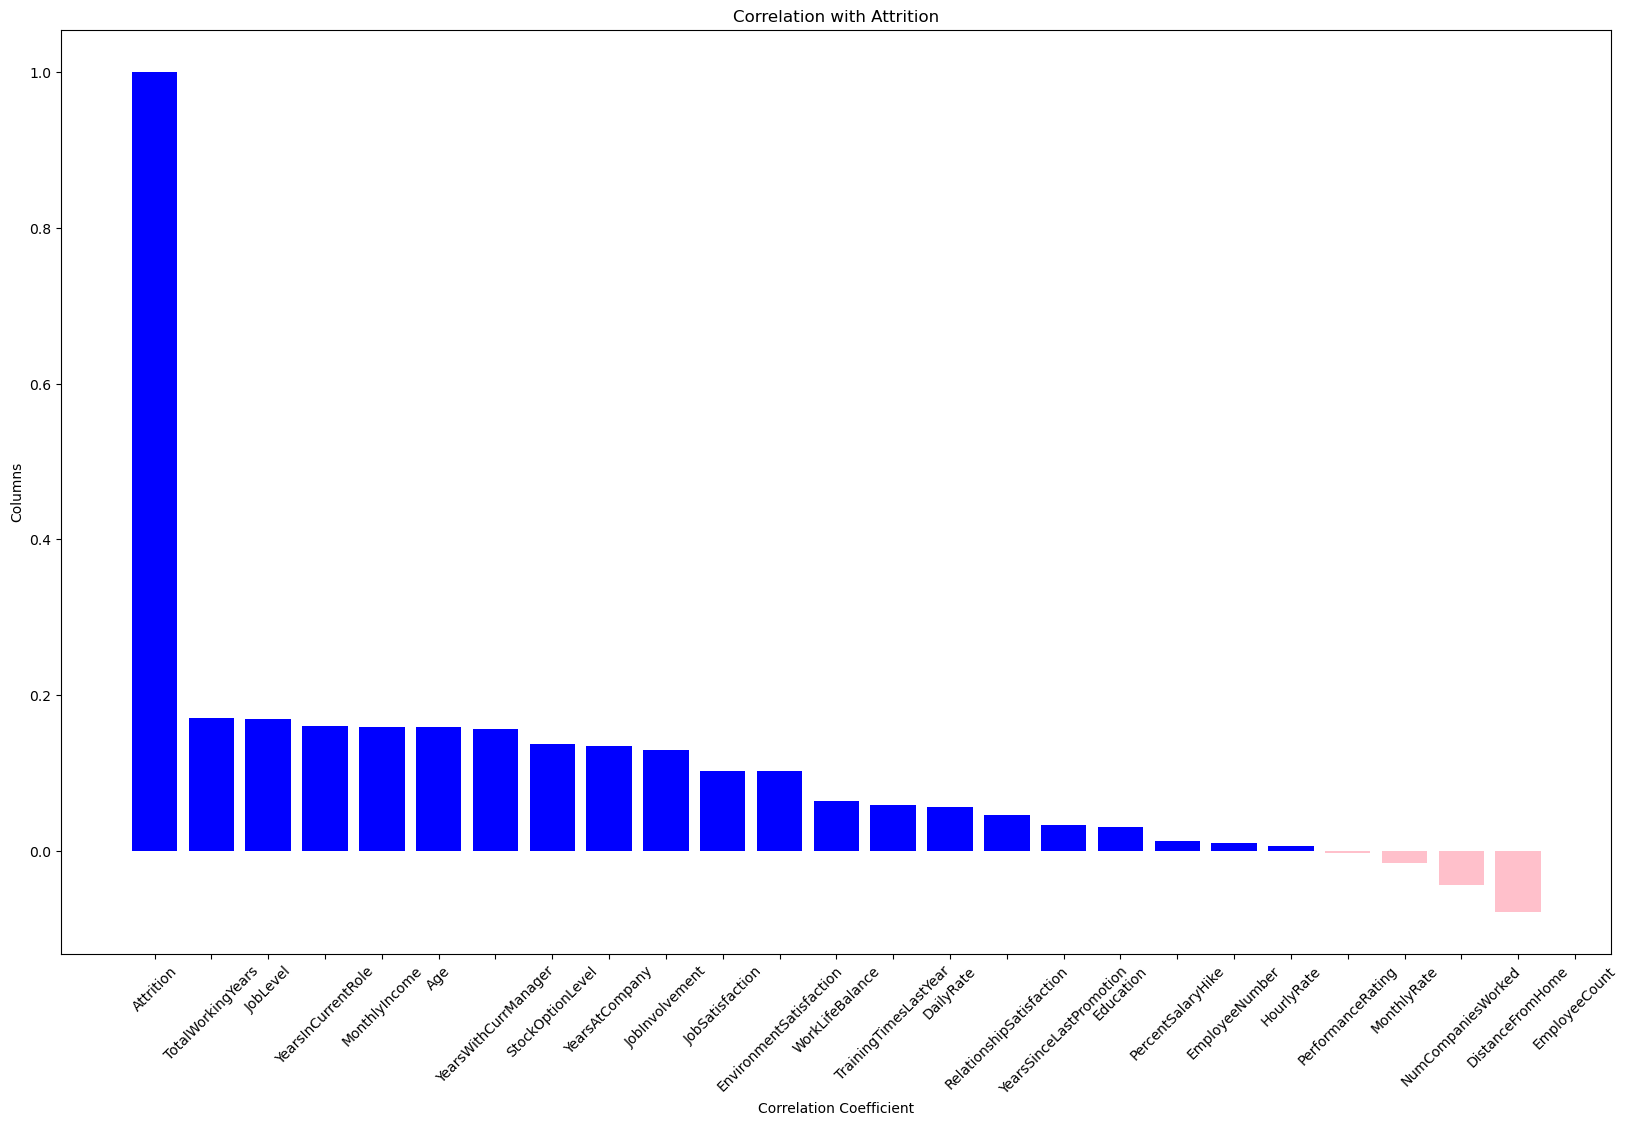

In [402]:
colors = ['pink' if c < 0 else 'blue' for c in correlations]
plt.figure(figsize=(20,12))
plt.bar(correlations.index, correlations, color=colors)
plt.title('Correlation with Attrition')
plt.grid(False)
plt.ylabel('Columns')
plt.xlabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

When solving a classification problem, identifying which features have the weakest connections or correlations with the target variable (in this case, "Attrition") is important. Weakly correlated features may not provide much information for making accurate predictions and can potentially be omitted from the analysis to simplify the model and improve its performance. Identifying the strength and direction of these correlations can help in feature selection and feature engineering, which are crucial steps in building effective classification models.

**Explanantion**

**"EmployeeCount", "Over18" and "Standard Hours" are a constant feature in the dataset, and it's correlation with other variables cannot be calculated as there is no variability in its values.**

**'EmployeeNumber', Employee number lacks HR-related insights or correlations with other columns.**

**'HourlyRate', 'PerformanceRating',  and 'BusinessTravel' exhibit lower correlations with attrition, as evidenced  per bivariate analysis.

I am going to remove columns that do not contribute to predicting attrition. Specifically, I have identified 'EmployeeCount,' 'Over18,' and 'StandardHours' as having only one unique value. These features do not provide useful information for our prediction, so we will drop them from the dataset.

In [403]:
columns_to_remove = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber', 'PerformanceRating', 'HourlyRate', 'BusinessTravel']
df.drop(columns=columns_to_remove, inplace=True)

In [404]:
df.shape

(1470, 28)

In [405]:
df.head(3)

Age Attrition  DailyRate              Department  DistanceFromHome  \
0   41       Yes       1102                   Sales                 1   
1   49        No        279  Research & Development                 8   
2   37       Yes       1373  Research & Development                 2   

   Education EducationField  EnvironmentSatisfaction  Gender  JobInvolvement  \
0          2  Life Sciences                        2  Female               3   
1          1  Life Sciences                        3    Male               2   
2          2          Other                        4    Male               2   

   ...  PercentSalaryHike RelationshipSatisfaction  StockOptionLevel  \
0  ...                 11                        1                 0   
1  ...                 23                        4                 1   
2  ...                 15                        2                 0   

  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                 8                      0                1               6   
1                10                      3                3              10   
2                 7                      3                3               0   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  

[3 rows x 28 columns]

<div style="background-color: #F6FDC3; padding: 10px; text-align: center; font-size: 28px;">
    <b style="text-align: center;">Correlation Matrix</b>
</div>

In [406]:
df_cor=df.corr()
df_cor

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EnvironmentSatisfaction  JobInvolvement  JobLevel  \
Age                                      0.010146        0.029820  0.509604   
DailyRate                                0.018355        0.046135  0.002966   
DistanceFromHome                        -0.016075        0.008783  0.005303   
Education                               -0.027128        0.042438  0.101589   
EnvironmentSatisfaction                  1.000000       -0.008278  0.001212   
JobInvolvement                          -0.008278        1.000000 -0.012630   
JobLevel                                 0.001212       -0.012630  1.000000   
JobSatisfaction                         -0.006784       -0.021476 -0.001944   
MonthlyIncome                           -0.006259       -0.015271  0.950300   
MonthlyRate                              0.037600       -0.016322  0.039563   
NumCompaniesWorked                       0.012594        0.015012  0.142501   
PercentSalaryHike                       -0.031701       -0.017205 -0.034730   
RelationshipSatisfaction                 0.007665        0.034297  0.021642   
StockOptionLevel                         0.003432        0.021523  0.013984   
TotalWorkingYears                       -0.002693       -0.005533  0.782208   
TrainingTimesLastYear                   -0.019359       -0.015338 -0.018191   
WorkLifeBalance                          0.027627       -0.014617  0.037818   
YearsAtCompany                           0.001458       -0.021355  0.534739   
YearsInCurrentRole                       0.018007        0.008717  0.389447   
YearsSinceLastPromotion                  0.016194       -0.024184  0.353885   
YearsWithCurrManager                    -0.004999        0.025976  0.375281   

                          JobSatisfaction  MonthlyIncome  MonthlyRate  ...  \
Age                             -0.004892       0.497855     0.028051  ...   
DailyRate                        0.030571       0.007707    -0.032182  ...   
DistanceFromHome                -0.003669      -0.017014     0.027473  ...   
Education                       -0.011296       0.094961    -0.026084  ...   
EnvironmentSatisfaction         -0.006784      -0.006259     0.037600  ...   
JobInvolvement                  -0.021476      -0.015271    -0.016322  ...   
JobLevel                     

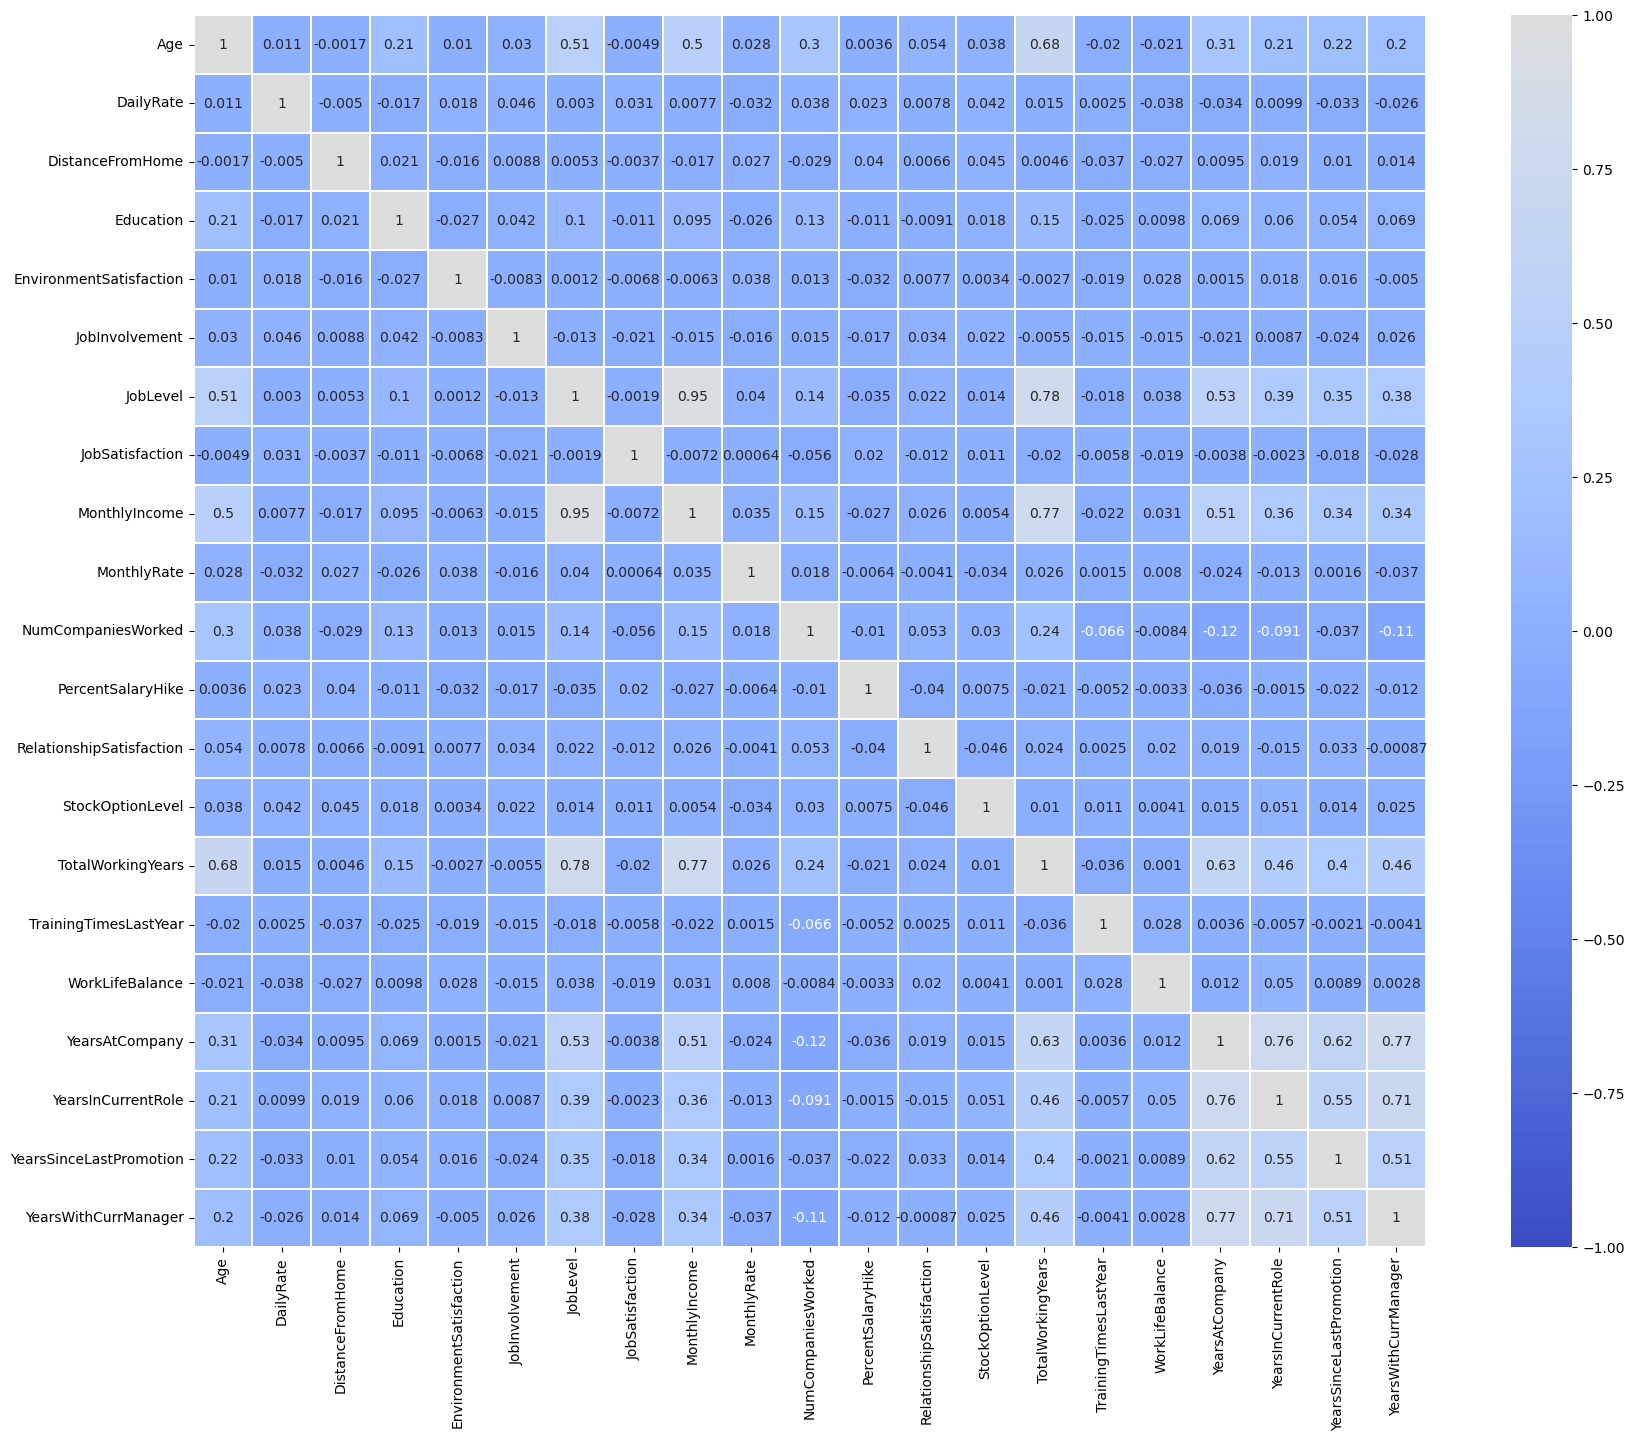

In [407]:
plt.figure(figsize=(22, 16))
sns.heatmap(df.corr(), cbar=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, fmt='.2g', annot=True,
            center=True, annot_kws={'size': 10}, linewidths=0.1, linecolor='white')
plt.show()

**Important Correlations**

* Attrition is weakly negatively correlated with Age (-0.16), indicating older employees are less likely to leave.
* Job Level and Monthly Income have a strong positive relationship (0.95), as higher job levels are associated with higher incomes.
* Job Level and Total Working Years also have a strong positive correlation (0.78).
* Monthly Income and Total Working Years are highly positively correlated (0.77).
* Years in Current Role and Years at the Company show a substantial positive relationship (0.76).
* Years at the Company and Years with Current Manager are also highly positively correlated (0.71).
* Years in Current Role and Years with Current Manager exhibit a significant positive correlation (0.55).
* Total Working Years and Years with Current Manager have a strong positive correlation (0.51).
* Age and Total Working Years are positively linked.

<div style="background-color: #F6FDC3; padding: 10px; text-align: center; font-size: 20px;">
    <b style="text-align: center;">Checking of SKewness value</b>
</div>

In [408]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

* Observing the presence of skewness in the dataset, we will address this aspect as a preliminary step before proceeding with model development


**Positive Skewness (greater than 0):**

DistanceFromHome: 0.958118
Education: 1.025401
MonthlyIncome: 1.369817
NumCompaniesWorked: 1.026471
PercentSalaryHike: 0.821128
PerformanceRating: 1.921883
TotalWorkingYears: 1.117172
TrainingTimesLastYear: 0.553124
YearsAtCompany: 1.764529
YearsInCurrentRole: 0.917363
YearsSinceLastPromotion: 1.984290
YearsWithCurrManager: 0.833451

**Negative Skewness (less than 0):**
Age: 0.413286
Education: -0.289681
EnvironmentSatisfaction: -0.321654
JobInvolvement: -0.498419
JobSatisfaction: -0.329672
RelationshipSatisfaction: -0.302828
WorkLifeBalance: -0.552480

**Perfectly Symmetric (equal to 0):**
DailyRate: -0.003519
EmployeeCount: 0.000000
EmployeeNumber: 0.016574
HourlyRate: -0.032311
MonthlyRate: 0.018578
StandardHours: 0.000000

<div style="background-color: #F6FDC3; padding: 10px; text-align: center; font-size: 20px;">
    <b style="text-align: center;">Employing Power Transformation to address skewness in numerical columns</b>
</div>

In [409]:
numerical_cols = [i for i in df.dtypes.index if df.dtypes[i] != "object"]

# Initialize the PowerTransformer with 'yeo-johnson' method
pt = PowerTransformer(method='yeo-johnson')

# Fit and transform the numerical data
numerical_data_transformed = pt.fit_transform(df[numerical_cols])

# Create a new DataFrame with the transformed numerical data
numerical_data_transformed_df = pd.DataFrame(numerical_data_transformed, columns=numerical_cols )

# Update the original DataFrame with the transformed numerical columns
df[numerical_cols] = numerical_data_transformed_df
df.shape

(1470, 28)

In [410]:
df.head()

Age Attrition  DailyRate              Department  DistanceFromHome  \
0  0.522140       Yes   0.759289                   Sales         -1.494085   
1  1.276411        No  -1.334597  Research & Development          0.243416   
2  0.102091       Yes   1.340365  Research & Development         -1.031215   
3 -0.353971        No   1.379936  Research & Development         -0.700347   
4 -1.123755        No  -0.453941  Research & Development         -1.031215   

   Education EducationField  EnvironmentSatisfaction  Gender  JobInvolvement  \
0  -0.916940  Life Sciences                -0.706596  Female        0.326033   
1  -1.771185  Life Sciences                 0.208597    Male       -1.058710   
2  -0.916940          Other                 1.209516    Male       -1.058710   
3   1.082871  Life Sciences                 1.209516  Female        0.326033   
4  -1.771185        Medical                -1.518118    Male        0.326033   

   ...  PercentSalaryHike RelationshipSatisfaction  StockOptionLevel  \
0  ...          -1.488918                -1.529513         -1.087933   
1  ...           1.679689                 1.229016          0.548969   
2  ...           0.201133                -0.700130         -1.087933   
3  ...          -1.488918                 0.225164         -1.087933   
4  ...          -0.948760                 1.229016          0.548969   

  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0         -0.244305              -2.579073        -2.144446        0.139692   
1          0.052495               0.217384         0.276821        0.762660   
2         -0.410500               0.217384         0.276821       -2.229592   
3         -0.244305               0.217384         0.276821        0.482432   
4         -0.592063               0.217384         0.276821       -0.951540   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0           0.205562                -1.094862              0.490147  
1           0.883888                 0.096854              0.909635  
2          -1.596434                -1.094862             -1.550156  
3           0.883888                 0.905592             -1.550156  
4          -0.446645                 0.607464             -0.406881  

[5 rows x 28 columns]

In [411]:
# After removing skewness checking the data
df.skew().to_frame('Skewness_Value_after_transformation')

Skewness_Value_after_transformation
Age                                                 -0.007603
DailyRate                                           -0.196160
DistanceFromHome                                    -0.007468
Education                                           -0.099881
EnvironmentSatisfaction                             -0.205395
JobInvolvement                                      -0.020365
JobLevel                                             0.103624
JobSatisfaction                                     -0.212815
MonthlyIncome                                        0.032831
MonthlyRate                                         -0.184087
NumCompaniesWorked                                   0.014814
PercentSalaryHike                                    0.116250
RelationshipSatisfaction                            -0.193634
StockOptionLevel                                     0.087019
TotalWorkingYears                                   -0.010653
TrainingTimesLastYear                                0.058058
WorkLifeBalance                                     -0.012286
YearsAtCompany                                      -0.008683
YearsInCurrentRole                                  -0.060849
YearsSinceLastPromotion                              0.212129
YearsWithCurrManager                                -0.067565

Our dataset shows reduced skewness following the application of the PowerTransformer technique, indicating successful skewness reduction. It's crucial to emphasize that columns like NumCompaniesWorked, JobLevel, and PerformanceRating were excluded from this process. This is because they contain categorical values, not continuous numerical data. Skewness reduction techniques are typically designed for continuous numerical variables, while categorical variables necessitate distinct preprocessing methods.

<div style="background-color: #F6FDC3; padding: 10px; text-align: center; font-size: 20px;">
    <b style="text-align: center;">Feature Engineering</b>
</div>

In [412]:
categorical_cols = [i for i in df.dtypes.index if df.dtypes[i] == "object"]
print("\033[1mLength of Categorical Columns:\033[0m",len(categorical_cols),"\033[1mCategorical Columns:\033[0m", categorical_cols)
print("\n")

Length of Categorical Columns: 7 Categorical Columns: ['Attrition', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']




In [413]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df[['Attrition', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']]

le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [414]:
df.shape

(1470, 28)

In [415]:
df.head()

Age  Attrition  DailyRate  Department  DistanceFromHome  Education  \
0  0.522140          1   0.759289           2         -1.494085  -0.916940   
1  1.276411          0  -1.334597           1          0.243416  -1.771185   
2  0.102091          1   1.340365           1         -1.031215  -0.916940   
3 -0.353971          0   1.379936           1         -0.700347   1.082871   
4 -1.123755          0  -0.453941           1         -1.031215  -1.771185   

   EducationField  EnvironmentSatisfaction  Gender  JobInvolvement  ...  \
0               1                -0.706596       0        0.326033  ...   
1               1                 0.208597       1       -1.058710  ...   
2               4                 1.209516       1       -1.058710  ...   
3               1                 1.209516       0        0.326033  ...   
4               3                -1.518118       1        0.326033  ...   

   PercentSalaryHike  RelationshipSatisfaction  StockOptionLevel  \
0          -1.488918                 -1.529513         -1.087933   
1           1.679689                  1.229016          0.548969   
2           0.201133                 -0.700130         -1.087933   
3          -1.488918                  0.225164         -1.087933   
4          -0.948760                  1.229016          0.548969   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0          -0.244305              -2.579073        -2.144446        0.139692   
1           0.052495               0.217384         0.276821        0.762660   
2          -0.410500               0.217384         0.276821       -2.229592   
3          -0.244305               0.217384         0.276821        0.482432   
4          -0.592063               0.217384         0.276821       -0.951540   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0            0.205562                -1.094862              0.490147  
1            0.883888                 0.096854              0.909635  
2           -1.596434                -1.094862             -1.550156  
3            0.883888                 0.905592             -1.550156  
4           -0.446645                 0.607464             -0.406881  

[5 rows x 28 columns]

**Now that the data appears to be in better shape, let's perform one final check for correlation before proceeding with model training.**

In [416]:
correlation_with_target = df.corr()['Attrition'].abs().sort_values(ascending=False)
print(correlation_with_target)

Attrition                   1.000000
OverTime                    0.246118
TotalWorkingYears           0.214827
MonthlyIncome               0.205608
JobLevel                    0.195593
YearsAtCompany              0.193406
YearsWithCurrManager        0.182957
YearsInCurrentRole          0.182921
Age                         0.175766
StockOptionLevel            0.174368
MaritalStatus               0.162070
JobInvolvement              0.125068
JobSatisfaction             0.103241
EnvironmentSatisfaction     0.100234
DistanceFromHome            0.078213
JobRole                     0.067151
Department                  0.063991
TrainingTimesLastYear       0.061284
DailyRate                   0.055923
YearsSinceLastPromotion     0.054479
WorkLifeBalance             0.053285
RelationshipSatisfaction    0.044479
NumCompaniesWorked          0.037554
Education                   0.032267
Gender                      0.029453
EducationField              0.026846
PercentSalaryHike           0.022524
M

In [417]:
#columns which are highly correlated with each other
df_cor=df.corr()
correlation_threshold = 0.8
mask = df_cor.abs() >= correlation_threshold

features_to_drop = set()

for i in range(len(df_cor.columns)):
    for j in range(i+1, len(df_cor.columns)):
        if mask.iloc[i, j]:
            colname_i = df_cor.columns[i]
            colname_j = df_cor.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)

In [418]:
features_to_drop

{'MonthlyIncome', 'YearsInCurrentRole', 'YearsWithCurrManager'}

**Identifies strongly correlated columns and recommends eliminating one to reduce redundancy and improve the dataset's efficiency.**

In [419]:
df.drop(columns=['MonthlyIncome', 'YearsInCurrentRole', 'YearsWithCurrManager'],axis=1, inplace=True)

**As we can observe, most of the previously skewed data has been improved. It's now time to split the dataset into features and the target variable.**

<div style="background-color: #F6FDC3; padding: 10px; text-align: center; font-size: 20px;">
    <b style="text-align: center;">Feature Transformation</b>
</div>

In [420]:
y=df['Attrition']
x=df.drop(columns=['Attrition'])
x.shape, y.shape

((1470, 24), (1470,))

We have efficiently divided the dataset into two parts: features and labels. Initially, our training dataset had dimensions of (1470, 27). However, after assigning all features to 'X,' its shape became (1470, 26), while 'y' now contains our target variable, resulting in a shape of (1470,).

In [421]:
df.isnull().sum()

Age                         0
Attrition                   0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsSinceLastPromotion     0
dtype: int64

<div style="background-color: #F6FDC3; padding: 10px; text-align: center; font-size: 20px;">
    <b style="text-align: center;">Feature Scaling</b>
</div>

In [422]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

Age  DailyRate  Department  DistanceFromHome  Education  \
0     0.522140   0.759289    1.401512         -1.494085  -0.916940   
1     1.276411  -1.334597   -0.493817          0.243416  -1.771185   
2     0.102091   1.340365   -0.493817         -1.031215  -0.916940   
3    -0.353971   1.379936   -0.493817         -0.700347   1.082871   
4    -1.123755  -0.453941   -0.493817         -1.031215  -1.771185   
...        ...        ...         ...               ...        ...   
1465 -0.008279   0.264672   -0.493817          1.407126  -0.916940   
1466  0.316210  -0.397219   -0.493817         -0.050827  -1.771185   
1467 -1.123755  -1.751713   -0.493817         -0.442291   0.040522   
1468  1.276411   0.583235    1.401512         -1.031215   0.040522   
1469 -0.236188  -0.358845   -0.493817          0.243416   0.040522   

      EducationField  EnvironmentSatisfaction    Gender  JobInvolvement  \
0          -0.937414                -0.706596 -1.224745        0.326033   
1          -0.937414                 0.208597  0.816497       -1.058710   
2           1.316673                 1.209516  0.816497       -1.058710   
3          -0.937414                 1.209516 -1.224745        0.326033   
4           0.565311                -1.518118  0.816497        0.326033   
...              ...                      ...       ...             ...   
1465        0.565311                 0.208597  0.816497        2.014107   
1466        0.565311                 1.209516  0.816497       -1.058710   
1467       -0.937414                -0.706596  0.816497        2.014107   
1468        0.565311                 1.209516  0.816497       -1.058710   
1469        0.565311                -0.706596  0.816497        2.014107   

      JobLevel  ...  NumCompaniesWorked  OverTime  PercentSalaryHike  \
0     0.241622  ...            1.621331  1.591746          -1.488918   
1     0.241622  ...           -0.571302 -0.628241           1.679689   
2    -1.170135  ...            1.271339  1.591746           0.201133   
3    -1.170135  ...           -0.571302  1.591746          -1.488918   
4    -1.170135  ...            1.766182 -0.628241          -0.948760   
...        ...  ...                 ...       ...                ...   
1465  0.241622  ...            0.792695 -0.628241           0.719724   
1466  1.009822  ...            0.792695 -0.628241           0.201133   
1467  0.241622  ...           -0.571302  1.591746           1.281630   
1468  0.241622  ...            0.043423 -0.628241          -0.121307   
1469  0.241622  ...            0.043423 -0.628241          -0.948760   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                    -1.529513         -1.087933          -0.244305   
1                     1.229016          0.548969           0.052495   
2                    -0.700130         -1.087933          -0.410500   
3                     0.225164         -1.087933          -0.244305   
4                     1.229016          0.548969          -0.592063   
...                        ...               ...                ...   
1465                  0.225164          0.548969           0.859893   
1466                 -1.529513          0.548969          -0.090665   
1467                 -0.700130          0.548969          -0.592063   
1468                  1.229016         -1.087933           0.859893   
1469                 -1.529513         -1.087933          -0.592063   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                 -2.579073        -2.144446        0.139692   
1                  0.217384         0.276821        0.762660   
2                  0.217384         0.276821       -2.229592   
3                  0.217384         0.276821        0.482432   
4                  0.217384         0.276821       -0.951540   
...                     ...              ...             ...   
1465               0.217384         0.276821       -0.066114   
1466               1.615639         0.2

<div style="background-color: #F6FDC3; padding: 10px; text-align: center; font-size: 20px;">
    <b style="text-align: center;">Examine the presence of multicollinearity by Variance Inflation Factor(VIF)</b>
</div>

In [423]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF= pd.DataFrame()
VIF['features']= x.columns
VIF['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
VIF

features       vif
0                        Age  2.085575
1                  DailyRate  1.018709
2                 Department  2.011689
3           DistanceFromHome  1.011011
4                  Education  1.067159
5             EducationField  1.016888
6    EnvironmentSatisfaction  1.016702
7                     Gender  1.019578
8             JobInvolvement  1.012407
9                   JobLevel  2.470447
10                   JobRole  1.911346
11           JobSatisfaction  1.012464
12             MaritalStatus  2.294006
13               MonthlyRate  1.017714
14        NumCompaniesWorked  1.413041
15                  OverTime  1.027207
16         PercentSalaryHike  1.013525
17  RelationshipSatisfaction  1.019070
18          StockOptionLevel  2.260367
19         TotalWorkingYears  4.669538
20     TrainingTimesLastYear  1.018571
21           WorkLifeBalance  1.013631
22            YearsAtCompany  2.474772
23   YearsSinceLastPromotion  1.418528

<div style="background-color: #F6FDC3; padding: 10px; text-align: center; font-size: 20px;">
    <b style="text-align: center;">Addressing Data Imbalance</b>
</div>

**Following the separation of the target variable from the features, we will proceed to balance the target variable before creating the model.**

In [424]:
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [425]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y = sm.fit_resample(x,y)

In [427]:
y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

* I have addressed the issue of imbalanced data, resulting in an equal distribution of attrition counts."

<div style="background-color: #F6FDC3; padding: 10px; text-align: center; font-size: 20px;">
    <b style="text-align: center;">Model Development</b>
</div>

###### Exploring the optimal random state to achieve higher accuracy:

In [429]:
#Choosing the Best Random State:
maxaccu=0
maxRS=0

for i in range(0,50):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.805668016194332 on Random State = 14


###### Partitioning the data into training and testing sets.

In [430]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=maxRS)

In [432]:
# Initialize all the models
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
XGB_model= XGBClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

# Create a list of models for iteration
models = [
    (LR_model, "Logistic Regression"),
    (RD_model, "Ridge Classifier"),
    (DT_model, "Decision Tree Classifier"),
    (SV_model, "Support Vector Classifier"),
    (KNR_model, "K-Neighbors Classifier"),
    (RFR_model, "Random Forest Classifier"),
    (XGB_model, "XGBoost Classifier"),
    (SGH_model, "SGD Classifier"),
    (Bag_model, "Bagging Classifier"),
    (ADA_model, "AdaBoost Classifier"),
    (GB_model, "Gradient Boosting Classifier")
]

In [433]:
# List to store model performance dictionaries
model_performances = []

# Iterate over the models and evaluate them using cross-validation
for model, model_name in models:
    cross_val_scores = cross_val_score(model, x, y, cv=5)  # Adjust the number of folds as needed
    mean_accuracy = np.mean(cross_val_scores)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)

    # Add precision, recall, F1-score, and support as separate columns
    precision = classification_rep['weighted avg']['precision']
    recall = classification_rep['weighted avg']['recall']
    f1_score = classification_rep['weighted avg']['f1-score']
    support = classification_rep['weighted avg']['support']
    
    model_performance = {
        "Model": model_name,
        "Cross-Validation Mean Accuracy": mean_accuracy,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "Support": support,
        "Confusion Matrix": [conf_matrix.tolist()]
    }
    model_performances.append(model_performance)

# Create a DataFrame from the model performance list
model_performance_df = pd.DataFrame(model_performances)

# Sort the models by accuracy in descending order
model_performance_df = model_performance_df.sort_values(by="Accuracy", ascending=False)
model_performance_df

Model  Cross-Validation Mean Accuracy  Accuracy  \
5       Random Forest Classifier                        0.936797  0.941296   
10  Gradient Boosting Classifier                        0.888607  0.927126   
3      Support Vector Classifier                        0.907958  0.923077   
6             XGBoost Classifier                        0.901576  0.914980   
8             Bagging Classifier                        0.903150  0.908907   
9            AdaBoost Classifier                        0.862227  0.902834   
2       Decision Tree Classifier                        0.858925  0.856275   
4         K-Neighbors Classifier                        0.824414  0.825911   
0            Logistic Regression                        0.785480  0.805668   
1               Ridge Classifier                        0.782237  0.801619   
7                 SGD Classifier                        0.737632  0.777328   

    Precision    Recall  F1-Score  Support          Confusion Matrix  
5    0.941882  0.941296  0.941276    494.0  [[[237, 10], [19, 228]]]  
10   0.929406  0.927126  0.927029    494.0   [[[238, 9], [27, 220]]]  
3    0.923772  0.923077  0.923045    494.0  [[[223, 24], [14, 233]]]  
6    0.915962  0.914980  0.914930    494.0  [[[232, 15], [27, 220]]]  
8    0.909450  0.908907  0.908877    494.0  [[[229, 18], [27, 220]]]  
9    0.902834  0.902834  0.902834    494.0  [[[223, 24], [24, 223]]]  
2    0.856749  0.856275  0.856228    494.0  [[[207, 40], [31, 216]]]  
4    0.864107  0.825911  0.821222    494.0   [[[164, 83], [3, 244]]]  
0    0.806170  0.805668  0.805588    494.0  [[[204, 43], [53, 194]]]  
1    0.801699  0.801619  0.801606    494.0  [[[200, 47], [51, 196]]]  
7    0.777328  0.777328  0.777328    494.0  [[[192, 55], [55, 192]]]

In [ ]:
Support Vector Classifier
Accuracy: 0.907958
F1 Score: 0.941276

<div style="background-color: #F6FDC3; padding: 10px; text-align: center; font-size: 20px;">
    <b style="text-align: center;">Hyperparameter Tuning</b>
</div>

###### HyperParameter Tuning for Random Forest Classifier

In [436]:
# Define the hyperparameters to search
param_grid = {
    'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Initialize GridSearchCV with the classifier and hyperparameter grid
grid_search = GridSearchCV(estimator=RFR_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to find the best parameters
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a classifier with the best parameters
best_rf = RandomForestClassifier(**best_params)

# Fit the best classifier on the training data
best_rf.fit(x_train, y_train)

# Make predictions on the test data
y_pred_rf = best_rf.predict(x_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred_rf)
print("Best Accuracy:", accuracy)

Best Accuracy: 0.937246963562753


###### HyperParameter Tunning for XGBoost Classifier

In [438]:
# Define the hyperparameters to search
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'min_child_weight': [1, 5],
    'gamma': [0, 0.5],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8],
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
    'reg_alpha': [0, 1],
    'reg_lambda': [1, 1.5]
}

# Reduce the number of cross-validation folds
grid_search = GridSearchCV(estimator=XGB_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to find the best parameters
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a classifier with the best parameters
best_xgb = XGBClassifier(**best_params)

# Fit the best classifier on the training data
best_xgb.fit(x_train, y_train)

# Make predictions on the test data
y_pred_xg = best_xgb.predict(x_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred_xg)
print("Best Accuracy:", accuracy)

Best Accuracy: 0.9210526315789473


###### HyperParameter Tunning For Gradient Boosting Classifier

In [439]:
# Define the hyperparameters to search
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Initialize GridSearchCV with the classifier and hyperparameter grid
grid_search = GridSearchCV(estimator=GB_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to find the best parameters
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a classifier with the best parameters
best_gb = GradientBoostingClassifier(**best_params)

# Fit the best classifier on the training data
best_gb.fit(x_train, y_train)

# Make predictions on the test data
y_pred_gb = best_gb.predict(x_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred_gb)
print("Best Accuracy:", accuracy)

Best Accuracy: 0.9271255060728745


##### Plotting Confusion Matrix

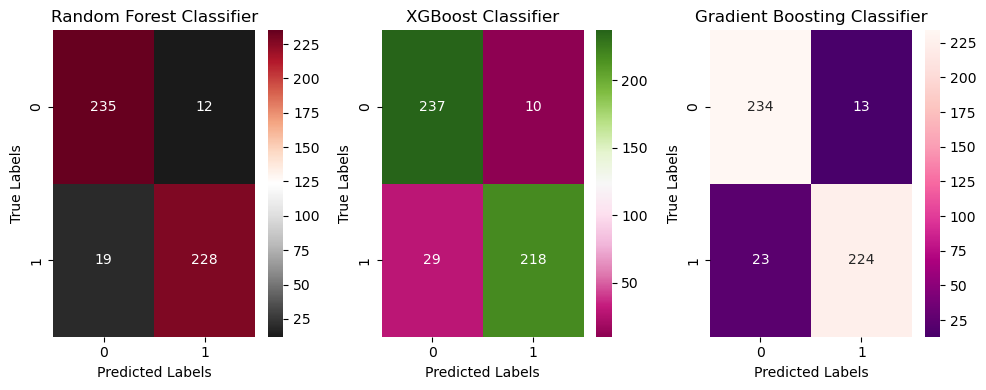

In [443]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xg = confusion_matrix(y_test, y_pred_xg)
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Create subplots for the confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

# Plot Random Forest Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="RdGy_r", ax=axes[0])
axes[0].set_title('Random Forest Classifier')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Plot XGBoost Classifier Confusion Matrix
sns.heatmap(cm_xg, annot=True, fmt="d", cmap="PiYG", ax=axes[1])
axes[1].set_title('XGBoost Classifier')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

# Plot Gradient Boosting Classifier Confusion Matrix
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="RdPu_r", ax=axes[2])
axes[2].set_title('Gradient Boosting Classifier')
axes[2].set_xlabel('Predicted Labels')
axes[2].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

##### ROC-AUC Curve

In [444]:
# Get predicted probabilities for the positive class
y_prob = best_rf.predict_proba(x_test)[:, 1]
# Calculate ROC AUC score
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score Of Random Forest Classifier:", auc_score)

# Get predicted probabilities for the positive class
y_prob = best_xgb.predict_proba(x_test)[:, 1]
# Calculate ROC AUC score
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score Of XGBoost Classifier:", auc_score)

# Get predicted probabilities for the positive class
y_prob = best_gb.predict_proba(x_test)[:, 1]
# Calculate ROC AUC score
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score Of Gradient Boosting Classifier:", auc_score)

ROC AUC Score Of Random Forest Classifier: 0.986362667803111
ROC AUC Score Of XGBoost Classifier: 0.9703486370863315
ROC AUC Score Of Gradient Boosting Classifier: 0.9678244193479651


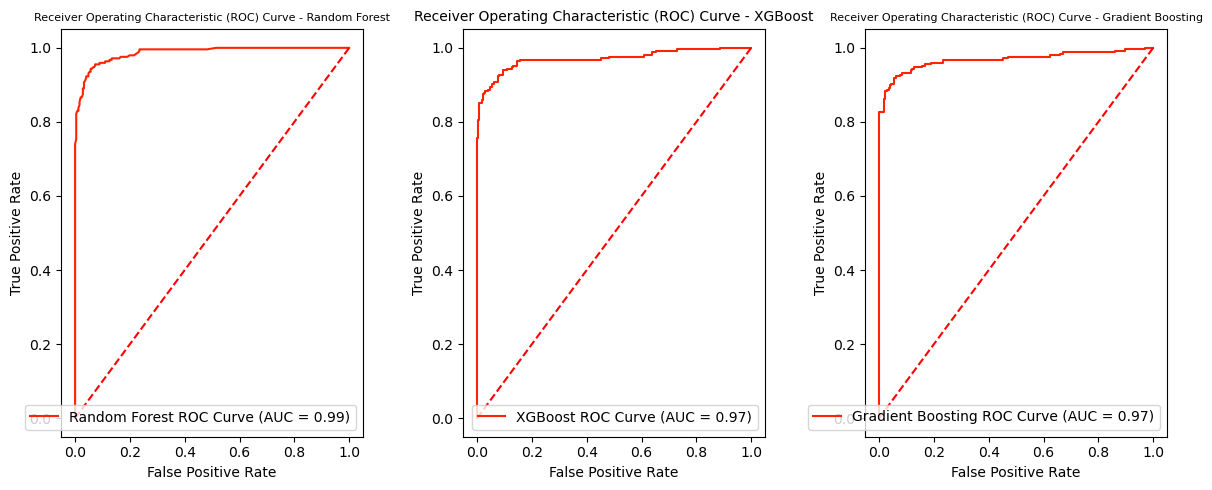

In [445]:
# Get predicted probabilities for the positive class for the classifiers
y_prob_rf = best_rf.predict_proba(x_test)[:, 1]
y_prob_xg = best_xgb.predict_proba(x_test)[:, 1]
y_prob_gb = best_gb.predict_proba(x_test)[:, 1]

# Calculate ROC AUC scores for both classifiers
auc_score_rf = roc_auc_score(y_test, y_prob_rf)
auc_score_xg = roc_auc_score(y_test, y_prob_xg)
auc_score_gb = roc_auc_score(y_test, y_prob_gb)

# Calculate ROC curves for both classifiers
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf, pos_label=1)
fpr_xg, tpr_xg, _ = roc_curve(y_test, y_prob_xg, pos_label=1)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb, pos_label=1)

# Create subplots
plt.figure(figsize=(12, 5))

# Plot ROC curve for Random Forest Classifier
plt.subplot(1, 3, 1)
plt.plot(fpr_rf, tpr_rf, label='Random Forest ROC Curve (AUC = {:.2f})'.format(auc_score_rf))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest', fontsize=8)
plt.legend(loc='lower right')

# Plot ROC curve for XGBoost Classifier
plt.subplot(1, 3, 2)
plt.plot(fpr_xg, tpr_xg, label='XGBoost ROC Curve (AUC = {:.2f})'.format(auc_score_xg))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost', fontsize=10)
plt.legend(loc='lower right')

# Plot ROC curve for Gradient Boosting Classifier
plt.subplot(1, 3, 3)
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting ROC Curve (AUC = {:.2f})'.format(auc_score_gb))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting', fontsize=8)
plt.legend(loc='lower right')

# Adjust layout and show plots
plt.tight_layout()
plt.show()


In [448]:
# model prediction using RF
x_predict = list(best_rf.predict(x_test))
rfc_hr = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(rfc_hr))

      predicted_values  orignal_values
1795                 1               1
1145                 0               0
1837                 1               1
1784                 1               1
2221                 1               1
...                ...             ...
9                    0               0
2053                 1               1
1223                 1               1
2343                 1               1
1496                 1               1

[494 rows x 2 columns]


In [449]:
joblib.dump(best_rf,'rfc_hr_file.obj')

['rfc_hr_file.obj']

In [450]:
#Testing the save model
rf_from_joblib=joblib.load('rfc_hr_file.obj')
rf_from_joblib.predict(x_test)

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,

**Conclusion:**

A mutual and symbiotic relationship should exist between an organization and its employees, as these individuals form the core of the company. Both parties should actively contribute to one another's success in order to achieve the best outcomes. An employee's personal growth is inherently tied to the organization's progress. Companies often invest in the training and development of their employees, benefiting both the workforce and the company itself, even though this can be a costly endeavor. However, over time, companies may face the challenge of attrition.

In this particular dataset, we conducted a thorough analysis of all the provided features that might lead to attrition. It is evident that single individuals are more inclined to change jobs, possibly in pursuit of better opportunities. Additionally, employees with higher salaries tend to exhibit greater loyalty to the company. Each feature in this dataset plays a crucial role in understanding attrition, including factors like gender, where female employees tend to demonstrate higher retention rates compared to their male counterparts.

Following our comprehensive analysis, we developed five different models, with the Random Forest Regressor standing out with the highest accuracy rate of 92%. As a result of this achievement, we have saved the Random Forest Classifier model, which can be a valuable tool for gaining insights into HR attrition.